In [ ]:
## URGENT:: TODO before release
# Reverse the definition of Mental Health Binary, 1 -> good, 0 -> bad (in comparison with Average)

In [ ]:
import platform
print(platform.python_version())

3.11.11


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
# Utility functions

# todo titles, ext|test|train set associated titles

def draw_roc(model, x , y, set_title, model_name):
  predicted_probs = model.predict_proba(x)[:, 1]
  # Calculate ROC-AUC on the test set
  roc_auc_test = roc_auc_score(y, predicted_probs)
  print(f"{set_title} ROC-AUC: {roc_auc_test:.4f}")
  # Calculate ROC curve on the test set
  fpr_test, tpr_test, _ = roc_curve(y, predicted_probs)
  # Plot ROC curve for the test set
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_test, tpr_test, label=f'{set_title} ROC Curve (AUC = {roc_auc_test:.2f})')
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{set_title} Set - {model_name} - (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  return roc_auc_test, fpr_test, tpr_test


def performance_metrics(model, x, y, set_title, model_name):
  y_pred_test = model.predict(x)
  # Calculating metrics
  accuracy_test = accuracy_score(y, y_pred_test)
  precision_test = precision_score(y, y_pred_test)
  recall_test = recall_score(y, y_pred_test)
  f1_test = f1_score(y, y_pred_test)
  conf_matrix_test = confusion_matrix(y, y_pred_test)

  # Printing the evaluation metrics
  print(f"{model_name} Model - {set_title} Set- Confusion Matrix/Classification Report")
  print("Accuracy: {:.2f}".format(accuracy_test))
  print("Precision: {:.2f}".format(precision_test))
  print("Recall (Sensitivity): {:.2f}".format(recall_test))
  print("F1 Score: {:.2f}".format(f1_test))
  print("Confusion Matrix:")
  print(conf_matrix_test)

  return accuracy_test, precision_test, recall_test, f1_test

<a href="https://colab.research.google.com/github/IbrahimTGhanem/DiabetesPrediction/blob/main/Main_codebook_Toronto_CMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Designing a Contextual-Risk-Prediction Model for Type 2 Diabetes Using Machine Learning**

**Section 1: Introduction**

Over the past three decades, the prevalence of type 2 diabetes has increased in all countries; and currently, there are 422 million people around the world who are experiencing this chronic disease, according to the World Health Organization. This enormous number stresses the magnitude of this issue at a global level. At the local level of Canada, according to Statistics Canada, 3 million Canadians (9%) are diagnosed with diabetes. In addition to having 6% of adults in Canada identified as prediabetic, this disease is expected to have an increasing average rate of 3.3% every year. To reduce the potential future burden on healthcare systems, there is a need for developing predictive models that can identify potential areas that might have significant presence of diabetes; and require area-based interventions that would improve the well-being of residents. Thus, for this machine learning (ML) project, we aimed at developing a tool that can help urban and community planners identify potential neighbourhoods with higher risks of having significant levels of diabetes.

**1.1: Importing Libraries and exploring data**

In [ ]:
!pip install category-encoders
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from itertools import product

In [ ]:
import pandas as pd
data = pd.read_csv("./Toronto CMA.csv")
only_dataset_size = len(data)
# 1149 CMA
# 570 Only


# Total: 1149
# High: 230
# Low: 919

In [ ]:
print(len(data[data['Diabetes'] == 1]))
print(len(data[data['Diabetes'] == 0]))

230
919


In [ ]:
import pandas as pd
data = pd.read_csv("./Toronto CMA.csv")
cma_dataset_size = len(data)

In [ ]:
cma_dataset_size

1149

In [ ]:
len(data[data['Diabetes'] == 1])

230

In [ ]:
len(data[data['Diabetes'] == 0])

919

In [ ]:
# Viewing the first few rows of the dataset
data.head()

spatial_id  Mental Health Score  Mental Health Binary  Unemployment Rate  \
0   5350001.0             3.943070                     0                7.5   
1   5350002.0             3.772154                     0                5.2   
2   5350003.0             3.804840                     0               10.0   
3   5350004.0             3.473871                     1               11.5   
4   5350005.0             3.699146                     1                8.5   

   High Education Rate  Average Income  Median Age  Recent Immigrant Rate  \
0              57.9439     140470.9957        41.0                 1.9640   
1              61.1722     149880.7211        58.3                 0.3378   
2              62.5397     103790.1244        44.6                23.6495   
3              34.8887      68088.0300        38.2                 6.5911   
4              46.4921      83009.5819        36.0                 9.3404   

   Rented Rate  Visible Minority Rate  ...  Diabetes Type 2 rate  Diabetes  \
0      33.0677                35.0245  ...                6.5107         0   
1       7.8358                 0.0100  ...               11.9783         1   
2      38.1295                20.3100  ...                7.3599         0   
3      93.3799                52.3959  ...               13.3462         1   
4      71.3352                48.1815  ...                8.4192         0   

   Overweight    Obese  Residential Instability  Material Deprivation  \
0     31.9850  21.0068                 0.082319             -0.940159   
1     41.2641  15.5695                 0.161009              0.354992   
2     41.3378  15.4334                 2.388299             -1.523984   
3     29.3714  25.1835                 2.373135              1.345854   
4     32.2253  22.2522                 2.267341              0.527991   

   Ethnic Concentration  Residential Instability quintiles  \
0             -0.229802                                  3   
1             -1.339000                                  3   
2              1.279890                                  5   
3              0.804453                                  5   
4              0.655762                                  5   

   Material Deprivation quintiles  Ethnic Concentration quintiles  
0                               1                               2  
1                               4                               1  
2                               1                               4  
3                               5                               4  
4                               4                               4  

[5 rows x 30 columns]

In [ ]:
ext_val_spatial_ids_toronto_only = [
    5350001.0, 5350019.0, 5350020.0, 5350021.0, 5350022.0, 5350023.0, 5350024.0,
    5350025.0, 5350026.0, 5350027.0, 5350028.02, 5350072.01, 5350072.02,
    5350073.0, 5350074.0, 5350075.0, 5350076.0, 5350077.0, 5350078.0, 5350079.0,
    5350080.01, 5350080.02, 5350081.0, 5350082.0, 5350083.0, 5350180.0,
    5350181.01, 5350181.02, 5350182.0, 5350183.01, 5350183.02,
    5350184.01, 5350184.02, 5350187.0, 5350188.0, 5350189.0, 5350190.01,
    5350190.02, 5350191.0, 5350336.0, 5350337.01, 5350337.02, 5350338.0,
    5350339.0, 5350340.0, 5350341.02, 5350341.03, 5350341.04, 5350342.0,
    5350343.0, 5350344.01, 5350344.02, 5350345.0, 5350346.01, 5350346.02,
    5350347.0, 5350348.0
]

ext_val_spatial_ids_toronto_only = [str(spatial_id) for spatial_id in ext_val_spatial_ids_toronto_only]

ext_val_spatial_ids_toronto_cma = [
    5350562.02, 5350562.03, 5350562.04, 5350562.05, 5350562.06,
    5350562.07, 5350562.08, 5350562.09, 5350562.11, 5350562.12,
    5350576.04, 5350576.05, 5350576.06, 5350576.07, 5350576.09,
    5350576.1, 5350576.16, 5350576.17, 5350576.2, 5350576.22,
    5350576.24, 5350576.29, 5350576.31, 5350576.32, 5350576.33,
    5350576.34, 5350576.4, 5350576.41, 5350576.42, 5350576.43,
    5350576.44, 5350576.45, 5350576.46, 5350576.47, 5350576.49,
    5350576.5, 5350576.52, 5350576.53, 5350576.54, 5350576.55,
    5350576.56, 5350576.57, 5350576.58, 5350576.59, 5350576.6,
    5350576.61, 5350576.62, 5350576.63, 5350576.64, 5350576.65,
    5350576.66, 5350576.67, 5350576.68, 5350576.69, 5350576.7,
    5350576.71, 5350576.72
]

ext_val_spatial_ids_toronto_cma = [str(spatial_id) for spatial_id in ext_val_spatial_ids_toronto_cma]


ext_ids_cma = ext_val_spatial_ids_toronto_only + ext_val_spatial_ids_toronto_cma
data['spatial_id'] = data['spatial_id'].astype(str)
ext_cma_df = data[data['spatial_id'].isin(ext_ids_cma)]
ext_cma_df.head()

spatial_id  Mental Health Score  Mental Health Binary  Unemployment Rate  \
0   5350001.0             3.943070                     0                7.5   
23  5350019.0             3.599990                     1                7.0   
24  5350020.0             3.939106                     0                2.2   
25  5350021.0             3.855776                     0                8.8   
26  5350022.0             3.891777                     0                4.5   

    High Education Rate  Average Income  Median Age  Recent Immigrant Rate  \
0               57.9439     140470.9957        41.0                 1.9640   
23              40.9441     111643.6265        41.5                 3.4851   
24              70.3297     289303.6559        47.2                 2.8130   
25              58.9525     169933.7340        44.5                 2.4602   
26              65.6472     239233.4938        41.0                 1.1991   

    Rented Rate  Visible Minority Rate  ...  Diabetes Type 2 rate  Diabetes  \
0       33.0677                35.0245  ...                6.5107         0   
23      52.1368                43.1610  ...               10.0167         0   
24      15.2174                23.0983  ...                7.8633         0   
25      57.5448                16.2597  ...                9.5269         0   
26      24.6914                11.8745  ...                9.0052         0   

    Overweight    Obese  Residential Instability  Material Deprivation  \
0      31.9850  21.0068                 0.082319             -0.940159   
23     29.8588  22.5498                 0.868418              0.582082   
24     34.7998  15.5061                 0.192181             -1.162586   
25     31.9068  23.0164                 1.335897             -0.480456   
26     27.1905  20.1354                -0.091895             -0.858112   

    Ethnic Concentration  Residential Instability quintiles  \
0              -0.229802                                  3   
23              0.055072                                  4   
24             -0.182563                                  4   
25             -0.531161                                  5   
26             -0.434249                                  3   

    Material Deprivation quintiles  Ethnic Concentration quintiles  
0                                1                               2  
23                               4                               3  
24                               1                               2  
25                               2                               1  
26                               1                               2  

[5 rows x 30 columns]

In [ ]:
ext_cma_indexes = ext_cma_df.index.tolist()
print(len(ext_cma_indexes))

114


In [ ]:
description = data.describe()
description

Mental Health Score  Mental Health Binary  Unemployment Rate  \
count          1149.000000           1149.000000        1149.000000   
mean              3.708185              0.456919           8.882446   
std               0.180842              0.498357           2.988478   
min               3.044088              0.000000           0.010000   
25%               3.590828              0.000000           7.100000   
50%               3.728502              0.000000           8.600000   
75%               3.838962              1.000000          10.400000   
max               4.114386              1.000000          37.900000   

       High Education Rate  Average Income   Median Age  \
count          1149.000000    1.149000e+03  1149.000000   
mean             43.660143    1.404743e+05    41.131506   
std              15.268003    8.693268e+04     5.289810   
min               8.145900    4.506773e+04    28.200000   
25%              32.324900    9.830399e+04    37.400000   
50%              41.694100    1.230081e+05    40.500000   
75%              55.082500    1.510459e+05    44.300000   
max              81.938000    1.127636e+06    84.900000   

       Recent Immigrant Rate  Rented Rate  Visible Minority Rate  \
count            1149.000000  1149.000000            1149.000000   
mean                8.175071    30.716517              52.062515   
std                 5.322161    22.775151              26.214372   
min                 0.337800     0.010000               0.010000   
25%                 4.420000    11.640900              29.080100   
50%                 6.909500    23.831600              52.253500   
75%                10.700400    46.742000              74.989800   
max                35.849100   100.000000              98.758200   

       Visible Minority Binary  ...  Diabetes Type 2 rate     Diabetes  \
count              1149.000000  ...           1149.000000  1149.000000   
mean                  0.797215  ...              7.341533     0.200174   
std                   0.402249  ...              3.776123     0.400305   
min                   0.000000  ...              0.000000     0.000000   
25%                   1.000000  ...              4.415800     0.000000   
50%                   1.000000  ...              7.448100     0.000000   
75%                   1.000000  ...              9.984600     0.000000   
max                   1.000000  ...             23.839600     1.000000   

        Overweight        Obese  Residential Instability  \
count  1149.000000  1149.000000              1149.000000   
mean     31.421496    17.407454                 0.089070   
std       6.047741     4.355703                 0.966249   
min      13.242700     5.422700                -1.716538   
25%      27.972000    14.323800                -0.619886   
50%      31.539000    17.385600                -0.023471   
75%      34.952700    20.353100                 0.615760   
max      51.869500    39.633600                 3.398448   

       Material Deprivation  Ethnic Concentration  \
count           1149.000000           1149.000000   
mean               0.035727              0.850820   
std                0.848042              0.801010   
min               -1.961844             -1.339000   
25%               -0.548663              0.187175   
50%               -0.119926              0.850800   
75%                0.436542              1.456866   
max                4.197645              3.158430   

       Residential Instability quintiles  Material Deprivation quintiles  \
count                        1149.000000                     1149.000000   
mean                            2.961706                        3.134030   
std                             1.412462                        1.355515   
min                             1.000000                        1.000000   
25%                             2.000000                        2.000000   
50%                             3.000000                        3.000000   
75% 

In [ ]:
# Checking for missing values
print(data.isnull().sum())

spatial_id                           0
Mental Health Score                  0
Mental Health Binary                 0
Unemployment Rate                    0
High Education Rate                  0
Average Income                       0
Median Age                           0
Recent Immigrant Rate                0
Rented Rate                          0
Visible Minority Rate                0
Visible Minority Binary              0
Work Stress Score                    0
Work Stress binary                   0
Rate of Regular alcohol              0
Active transportation                0
Rate of Active population            0
Rate of Daily Smokers                0
Total Population                     0
Food Insecurity score                0
Food Insecurity binary               0
Diabetes Type 2 rate                 0
Diabetes                             0
Overweight                           0
Obese                                0
Residential Instability              0
Material Deprivation     

**1.2: Process of omitting irrelevant columns (ensuring high data quality)**

In [ ]:
identifiers_to_drop = ['spatial_id']
data = data.drop(columns=identifiers_to_drop)

In [ ]:
population = ['Total Population']
data = data.drop(columns=population)


**Section 2: Data Engineering Process**

In [ ]:
# Listing of different types variables
binary_variables = [
    "Visible Minority Binary",
    "Food Insecurity binary",
    "Work Stress binary",
    "Mental Health Binary"
]

In [ ]:
categorical_variables = [
    'Residential Instability quintiles',
    'Material Deprivation quintiles',
    'Ethnic Concentration quintiles'
]

In [ ]:
Numeric_variables = [
    'Ethnic Concentration',
    'Material Deprivation',
    'Residential Instability',
    'Unemployment Rate',
    'Obese',
    'Mental Health Score',
    'Overweight',
    'Food Insecurity score',
    'Rate of Daily Smokers',
    'Rate of Active population',
    'Active transportation',
    'Rate of Regular alcohol',
    'Recent Immigrant Rate',
    'Work Stress Score',
    'Visible Minority Rate',
    'Rented Rate',
    'Median Age',
    'Average Income',
    'High Education Rate']

In [ ]:
data['Diabetes Label'] = np.where(data['Diabetes'] == 1, 'High', 'Low')

**2.1: checking potential class imbalance**

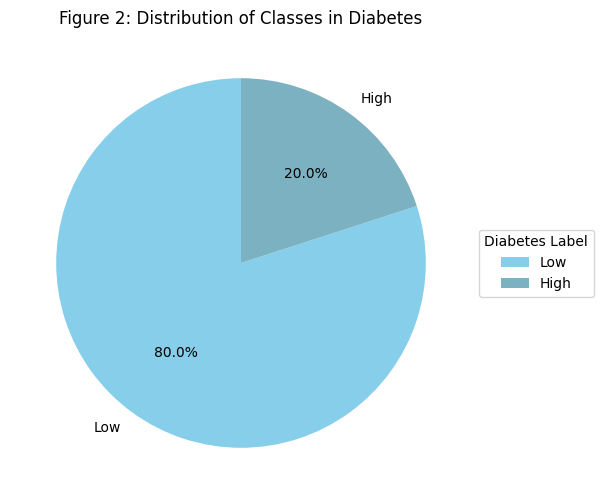

In [ ]:
# Calculating counts
counts = data['Diabetes Label'].value_counts()

# Defining colors
colors = ['#87CEEB', '#7cb1c2']

# Ploting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Figure 2: Distribution of Classes in Diabetes')
plt.legend(title='Diabetes Label', loc='center left', bbox_to_anchor=(1, 0.5))

# Showing the plot
plt.show()


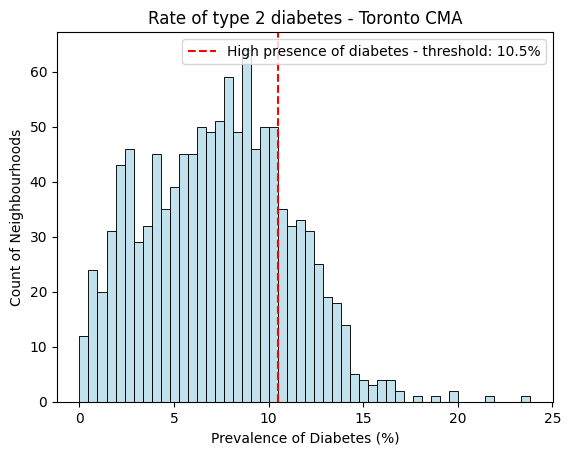

In [ ]:
sns.histplot(data['Diabetes Type 2 rate'], bins=50, kde=False, color='lightblue')
plt.title('Rate of type 2 diabetes - Toronto CMA')
plt.xlabel('Prevalence of Diabetes (%)')
plt.ylabel('Count of Neighbourhoods')

plt.axvline(x=10.5, color='red', linestyle='--', label='High presence of diabetes - threshold: 10.5%')

plt.legend()  # Add a legend to label the dashed line

plt.show()

In [ ]:
Continous_label = ['Diabetes Type 2 rate']
data = data.drop(columns=Continous_label)

While there are no missing values in the label class, there is a clear class imbalance in the label/target variable where only 20% of the observations belong to the category of 'High Diabetes'. This issue entails the need for either upsampling or downsampling, which will be tackled before running classification models.


**2.2 Visualization variables, correlation, and understanding outliers**

**2.2.1 Visualizing Variables**

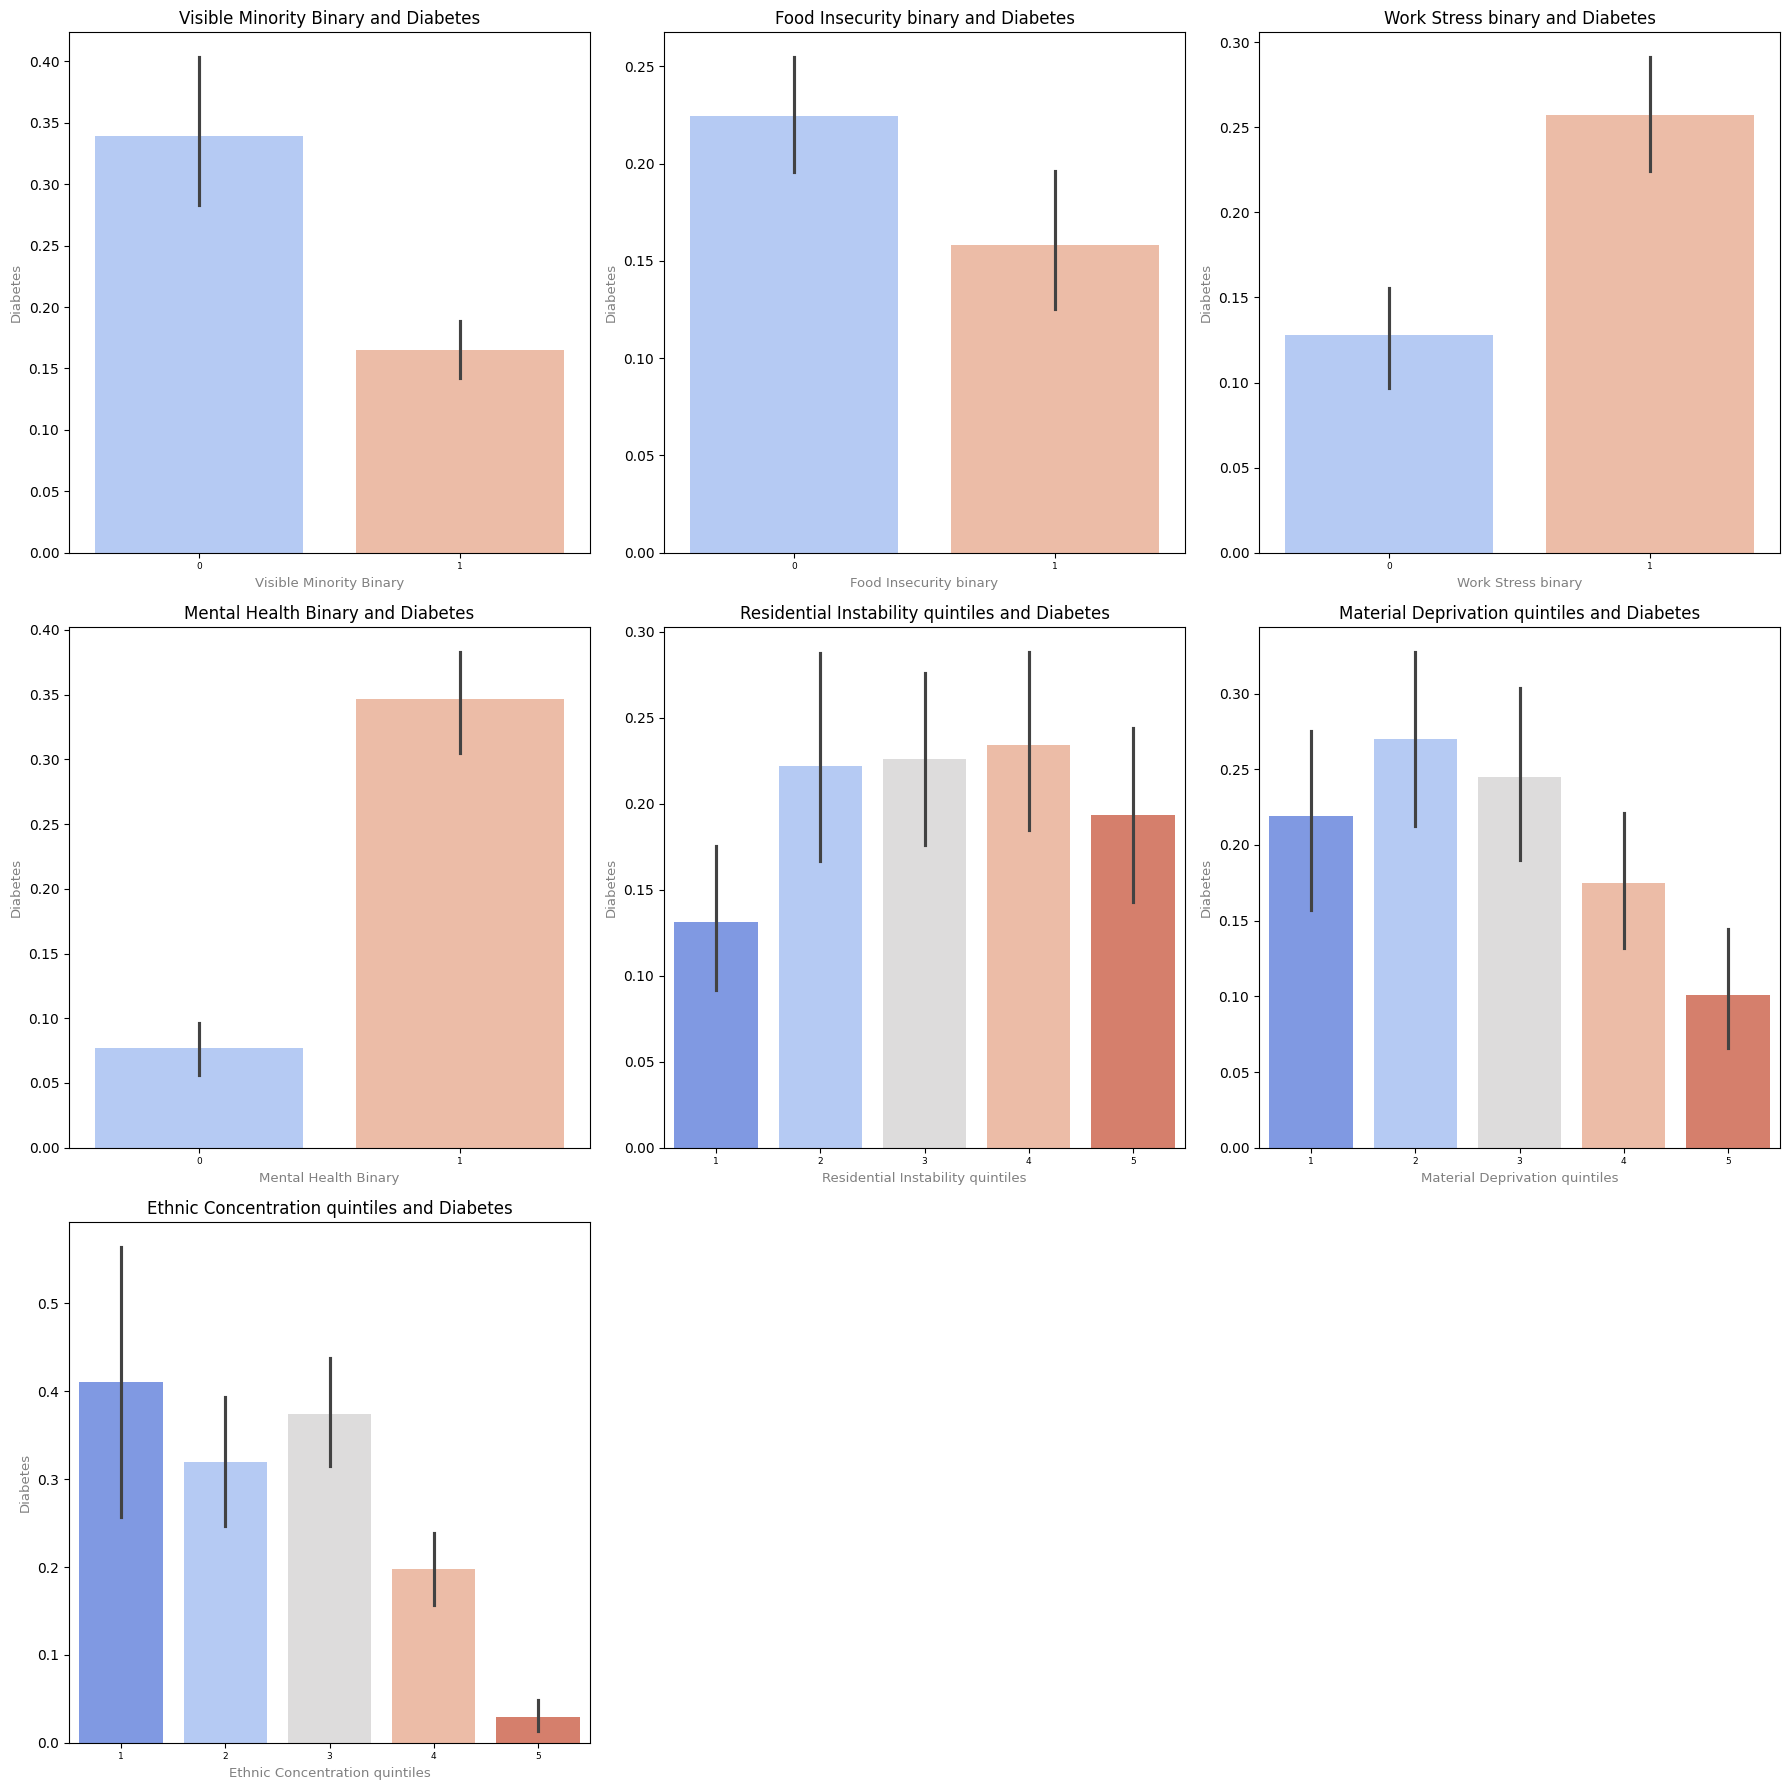

In [ ]:
# Grouping variables into binary, ordinal, and categorical
binary_categorical = binary_variables + categorical_variables

#Setting Y/class

Class= 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(binary_categorical) // subplots_per_row + 1

# Creating bar plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(binary_categorical):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.barplot(data=data, x=variable_name, y=Class, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adjusting the font size for unit names
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), fontsize=6.5)

# Adding and adjusting lables for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing  empty subplots
for i in range(len(binary_categorical), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

In [ ]:
toronto_only_extreme = (data['Material Deprivation quintiles'] == 3) & (data['Residential Instability quintiles'] == 1)
cma_extreme = (data['Material Deprivation quintiles'] == 2) & (data['Residential Instability quintiles'] == 4)

data['Instability_Deprivation'] = toronto_only_extreme | cma_extreme
data['Instability_Deprivation'] = data['Instability_Deprivation'].astype(int)

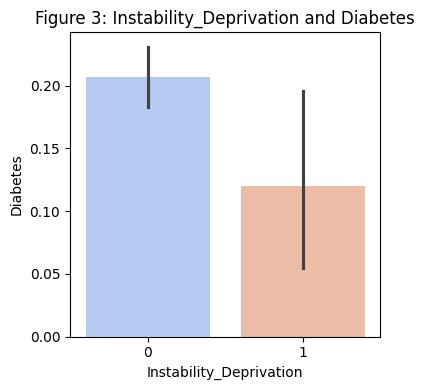

In [ ]:
#Visualizing the new interaction term
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

# Plot the subplot
sns.barplot(data=data, x="Instability_Deprivation", y="Diabetes", palette='coolwarm', ax=axes)
axes.set_title("Figure 3: Instability_Deprivation and Diabetes")

# Adjust the layout and display the plot
plt.tight_layout()

# Visualize the plot
plt.show()

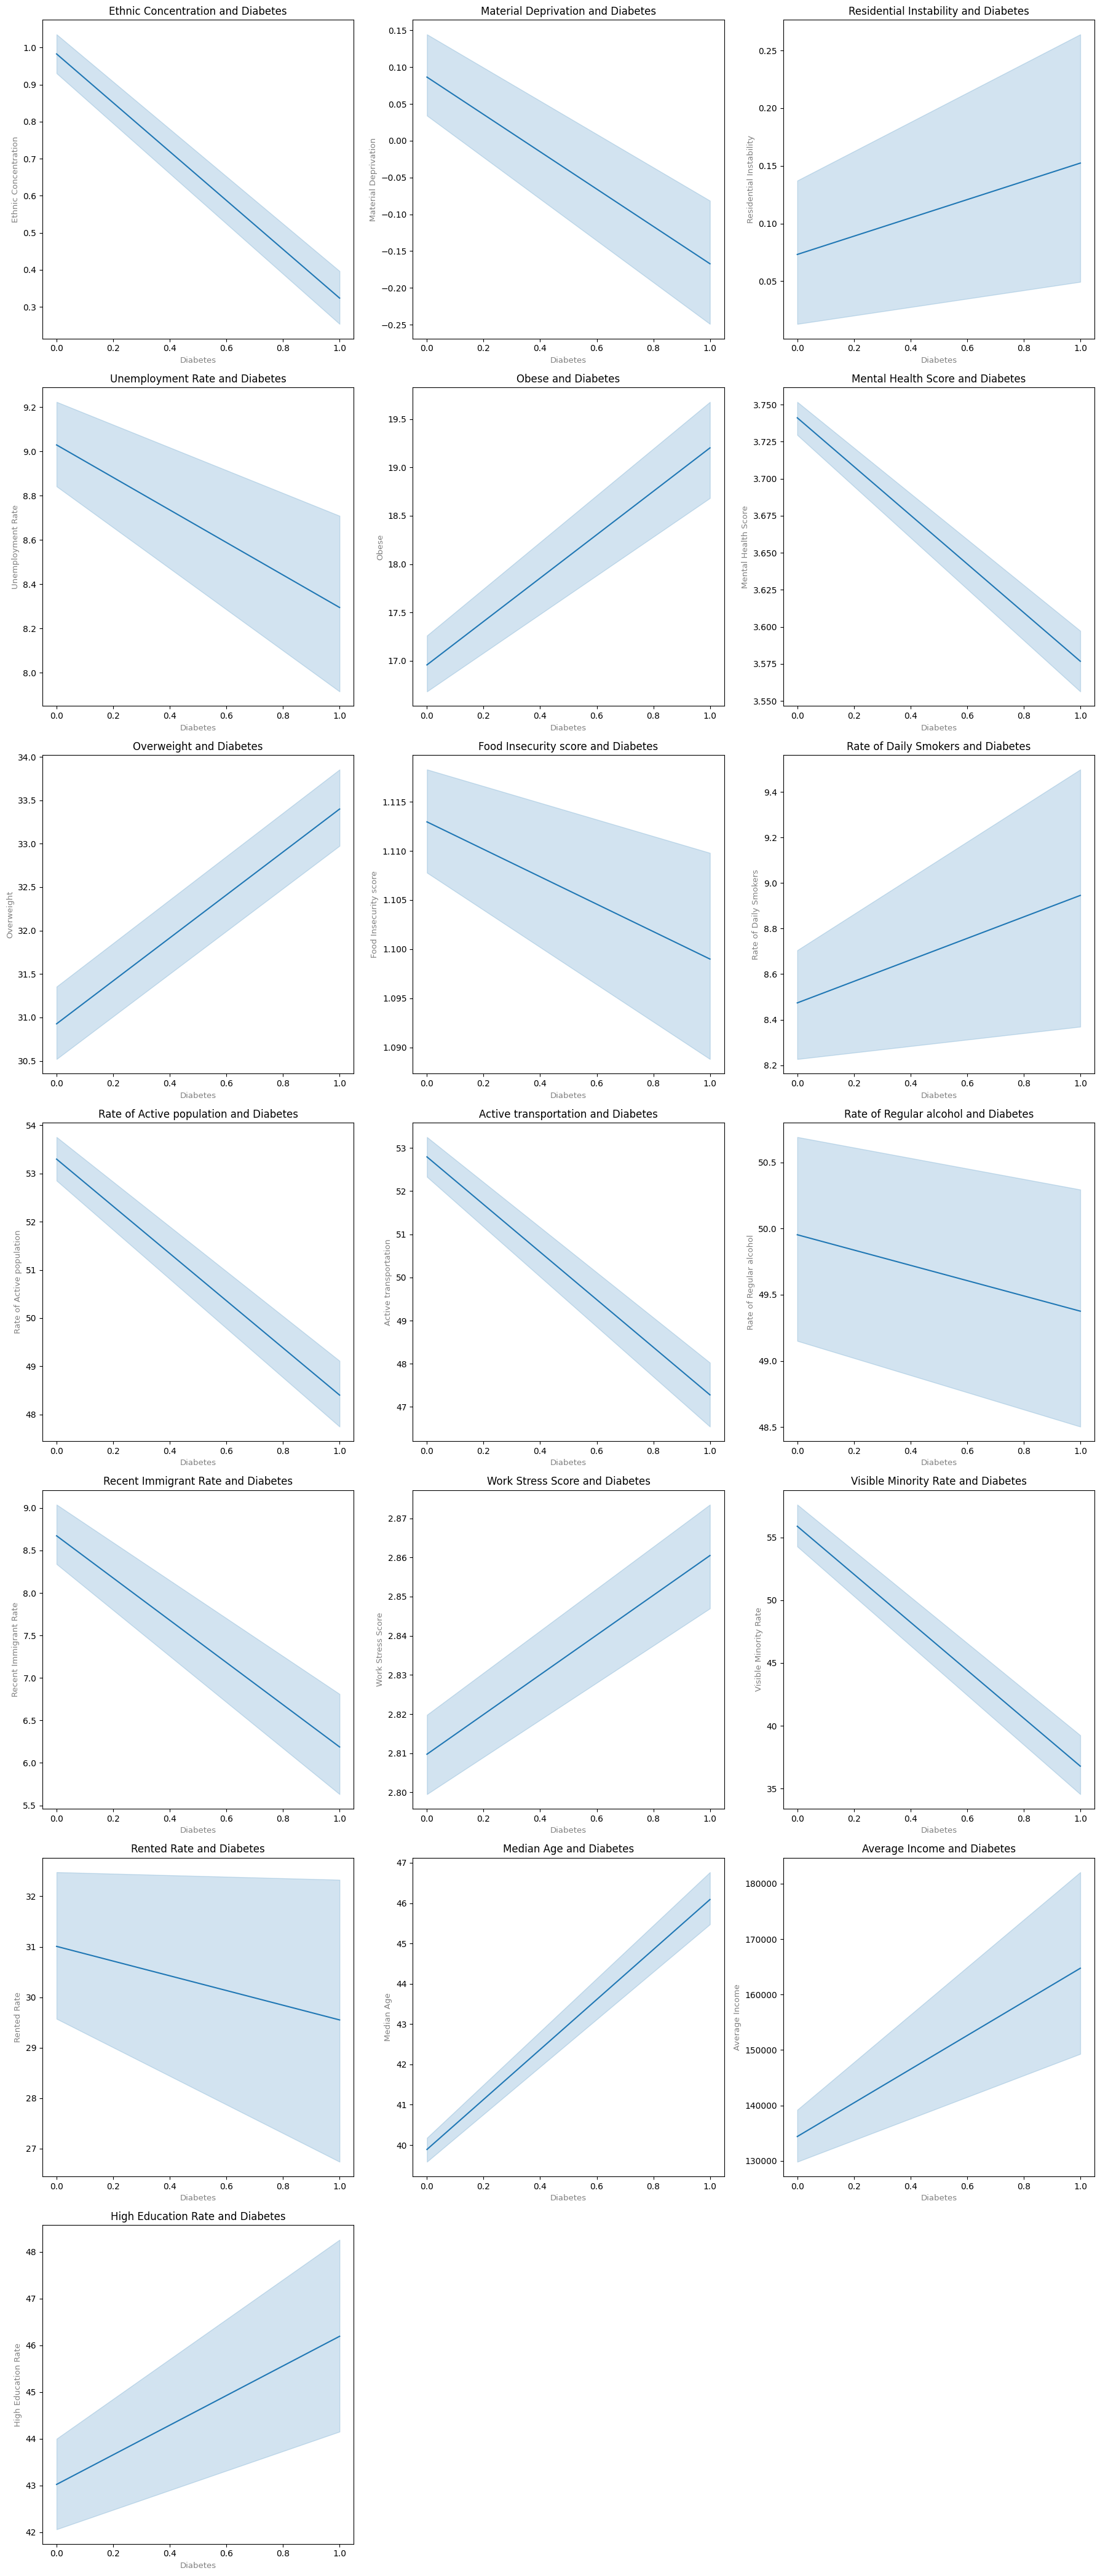

In [ ]:
Class = 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating line plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(Numeric_variables):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.lineplot(data=data, x=Class, y=variable_name, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adding and adjusting labels for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()


**Generating Combined figure for Visible Minority**

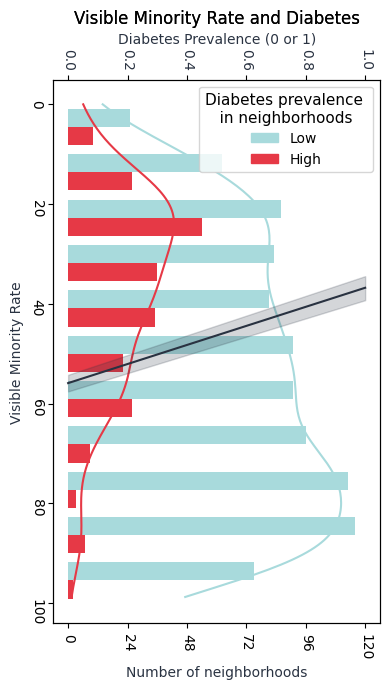

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Class = 'Diabetes'
column = 'Visible Minority Rate'
variable_name = column

ax_text_color = "#2a3342"
COLOR_TEMPERATURE = "#293241"
CLASS_COLORS = ["#a8dadc", "#e63946"]  # Custom colors for bars
LABELS = ["Low", "High"]  # Adjust based on your dataset

# Initialize the plot with a wider figsize
fig1, ax1 = plt.subplots(figsize=(4,7))  # Increase width here

# Define the bin edges
first_bin_start = 0
last_bin_end = 100
num_bins = 11
bins = np.linspace(first_bin_start, last_bin_end, num_bins + 1)

# Use 'dodge' mode to place bars next to each other with custom colors
sns.histplot(data=data, y=column, hue='Diabetes Label', kde=True,
             palette=CLASS_COLORS, multiple="dodge", ax=ax1, alpha=1,
             legend=False, bins=bins, shrink=0.8, edgecolor='none')

# **Manually create the legend**
from matplotlib.patches import Patch

legend_patches = [Patch(color=CLASS_COLORS[i], label=LABELS[i]) for i in range(len(LABELS))]
legend = ax1.legend(handles=legend_patches, title="Diabetes prevalence \n   in neighborhoods", fontsize=10, title_fontsize=11)

# Set the title and labels
ax1.set_title(f"{variable_name} and {Class}", fontsize=12)
ax1.set_xlabel("Number of neighborhoods", color=ax_text_color, fontsize=10)
ax1.set_ylabel(column, color=ax_text_color, fontsize=10)
y_s, y_e = ax1.get_ylim()
ax1.set_ylim(y_e, y_s)

hist_xlim = ax1.get_xlim()
ax2 = ax1.twiny()

# Create the line plot
sns.lineplot(data=data, x=Class, y=column, color=COLOR_TEMPERATURE, ax=ax2)

# Set the title and labels
ax2.set_title(f"{variable_name} and {Class}", fontsize=12)
ax2.set_xlabel("Diabetes Prevalence (0 or 1)", color=ax_text_color, fontsize=10)
ax2.set_ylabel(variable_name, color=ax_text_color, fontsize=10)

start = 0
end = 120
offset = 0.05
ran = end - start
ax1.set_xlim((start - ran * offset, end + ran * offset))
bins = np.linspace(start, end, 6)
ax1.set_xticks(bins)

ax1.tick_params(axis='x', rotation=-90)
ax1.tick_params(axis='y', rotation=-90)
ax2.tick_params(axis='x', rotation=-90, labelcolor=COLOR_TEMPERATURE)

# Adjust layout
plt.tight_layout()
plt.savefig('vmr_merged.png', dpi=1200, bbox_inches='tight')
# Show the plot
plt.show()



**Generating Combined figure for Mental Health Score**

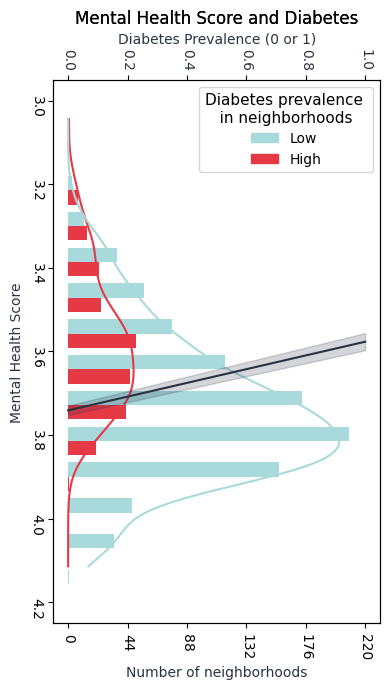

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Class = 'Diabetes'
column = 'Mental Health Score'
variable_name = column

ax_text_color = "#2a3342"
COLOR_TEMPERATURE = "#293241"
CLASS_COLORS = ["#a8dadc", "#e63946"]  # Custom colors for bars
LABELS = ["Low", "High"]  # Adjust based on your dataset

# Initialize the plot with a wider figsize
fig1, ax1 = plt.subplots(figsize=(4,7))  # Increase width here

# Define the bin edges
first_bin_start = 3
last_bin_end = 4.2
num_bins = 14
bins = np.linspace(first_bin_start, last_bin_end, num_bins + 1)

# Use 'dodge' mode to place bars next to each other with custom colors
sns.histplot(data=data, y=column, hue='Diabetes Label', kde=True,
             palette=CLASS_COLORS, multiple="dodge", ax=ax1, alpha=1,
             legend=False, bins=bins, shrink=0.8, edgecolor='none')

# **Manually create the legend**
from matplotlib.patches import Patch

legend_patches = [Patch(color=CLASS_COLORS[i], label=LABELS[i]) for i in range(len(LABELS))]
legend = ax1.legend(handles=legend_patches, title="Diabetes prevalence \n   in neighborhoods", fontsize=10, title_fontsize=11)

# Set the title and labels
ax1.set_title(f"{variable_name} and {Class}", fontsize=12)
ax1.set_xlabel("Number of neighborhoods", color=ax_text_color, fontsize=10)
ax1.set_ylabel(column, color=ax_text_color, fontsize=10)
y_s, y_e = ax1.get_ylim()
ax1.set_ylim(y_e, y_s)

hist_xlim = ax1.get_xlim()
ax2 = ax1.twiny()

# Create the line plot
sns.lineplot(data=data, x=Class, y=column, color=COLOR_TEMPERATURE, ax=ax2)

# Set the title and labels
ax2.set_title(f"{variable_name} and {Class}", fontsize=12)
ax2.set_xlabel("Diabetes Prevalence (0 or 1)", color=ax_text_color, fontsize=10)
ax2.set_ylabel(variable_name, color=ax_text_color, fontsize=10)

start = 0
end = 220
offset = 0.05
ran = end - start
ax1.set_xlim((start - ran * offset, end + ran * offset))
bins = np.linspace(start, end, 6)
ax1.set_xticks(bins)

ax1.tick_params(axis='x', rotation=-90)
ax1.tick_params(axis='y', rotation=-90)
ax2.tick_params(axis='x', rotation=-90, labelcolor=COLOR_TEMPERATURE)

# Adjust layout
plt.tight_layout()

plt.savefig('mhs_merged.png', dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()


['No Diabetes', 'Diabetes']



**2.2.1 Examining correlation patterns**

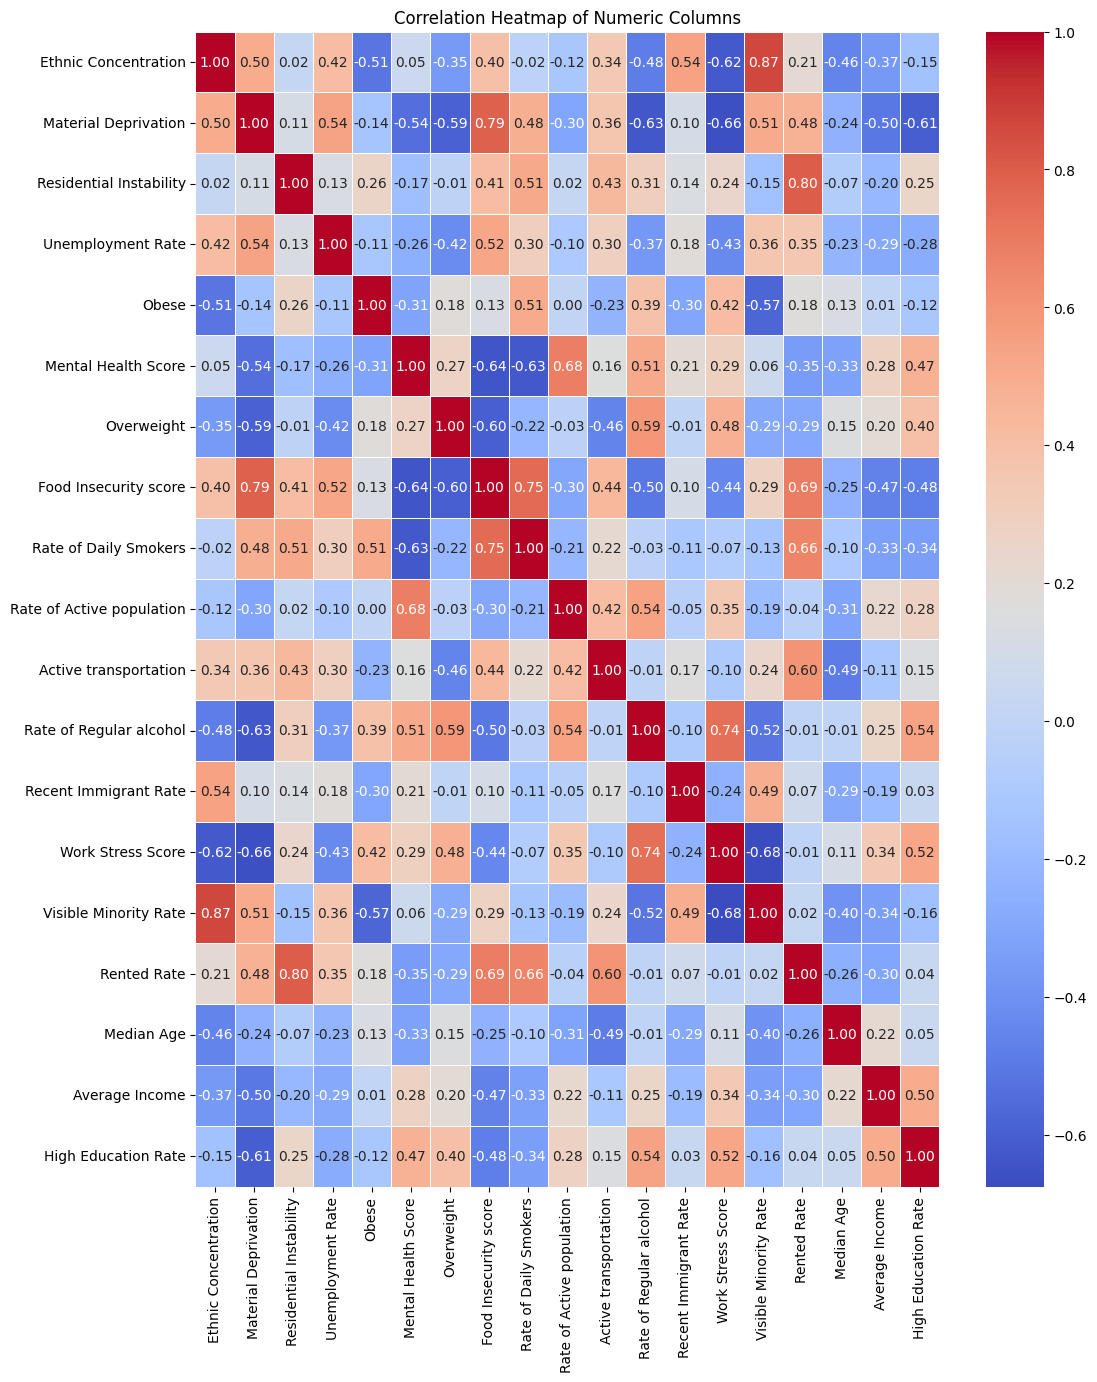

In [ ]:
# Creating a DataFrame with only the selected columns
numeric_data = data[Numeric_variables]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print("Pairs of variables with correlation > 0.7:")
for pair in high_correlation_pairs:
    print(pair)

Pairs of variables with correlation > 0.7:
('Ethnic Concentration', 'Visible Minority Rate')
('Material Deprivation', 'Food Insecurity score')
('Residential Instability', 'Rented Rate')
('Food Insecurity score', 'Rate of Daily Smokers')
('Rate of Regular alcohol', 'Work Stress Score')


As ethnic concentration, material deprivation, residenial instability, and food insecurity are presented inquintiles and binary, they will be ddropped.

In [ ]:
numeric_variables_to_drop = [
    'Ethnic Concentration',
    'Material Deprivation',
    'Residential Instability',
    'Food Insecurity score',
    'Rate of Regular alcohol',

    # below columns are correlated according to results from `toronto only.csv`
    # 'Mental Health Score',
    # 'Work Stress Score',
]

In [ ]:
data = data.drop(columns=numeric_variables_to_drop)

In [ ]:
Numeric_variables =[var for var in Numeric_variables if var not in numeric_variables_to_drop]

In [ ]:
Numeric_variables

['Unemployment Rate',
 'Obese',
 'Mental Health Score',
 'Overweight',
 'Rate of Daily Smokers',
 'Rate of Active population',
 'Active transportation',
 'Recent Immigrant Rate',
 'Work Stress Score',
 'Visible Minority Rate',
 'Rented Rate',
 'Median Age',
 'Average Income',
 'High Education Rate']

**2.2.3 Examining normal distibution and outliers**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

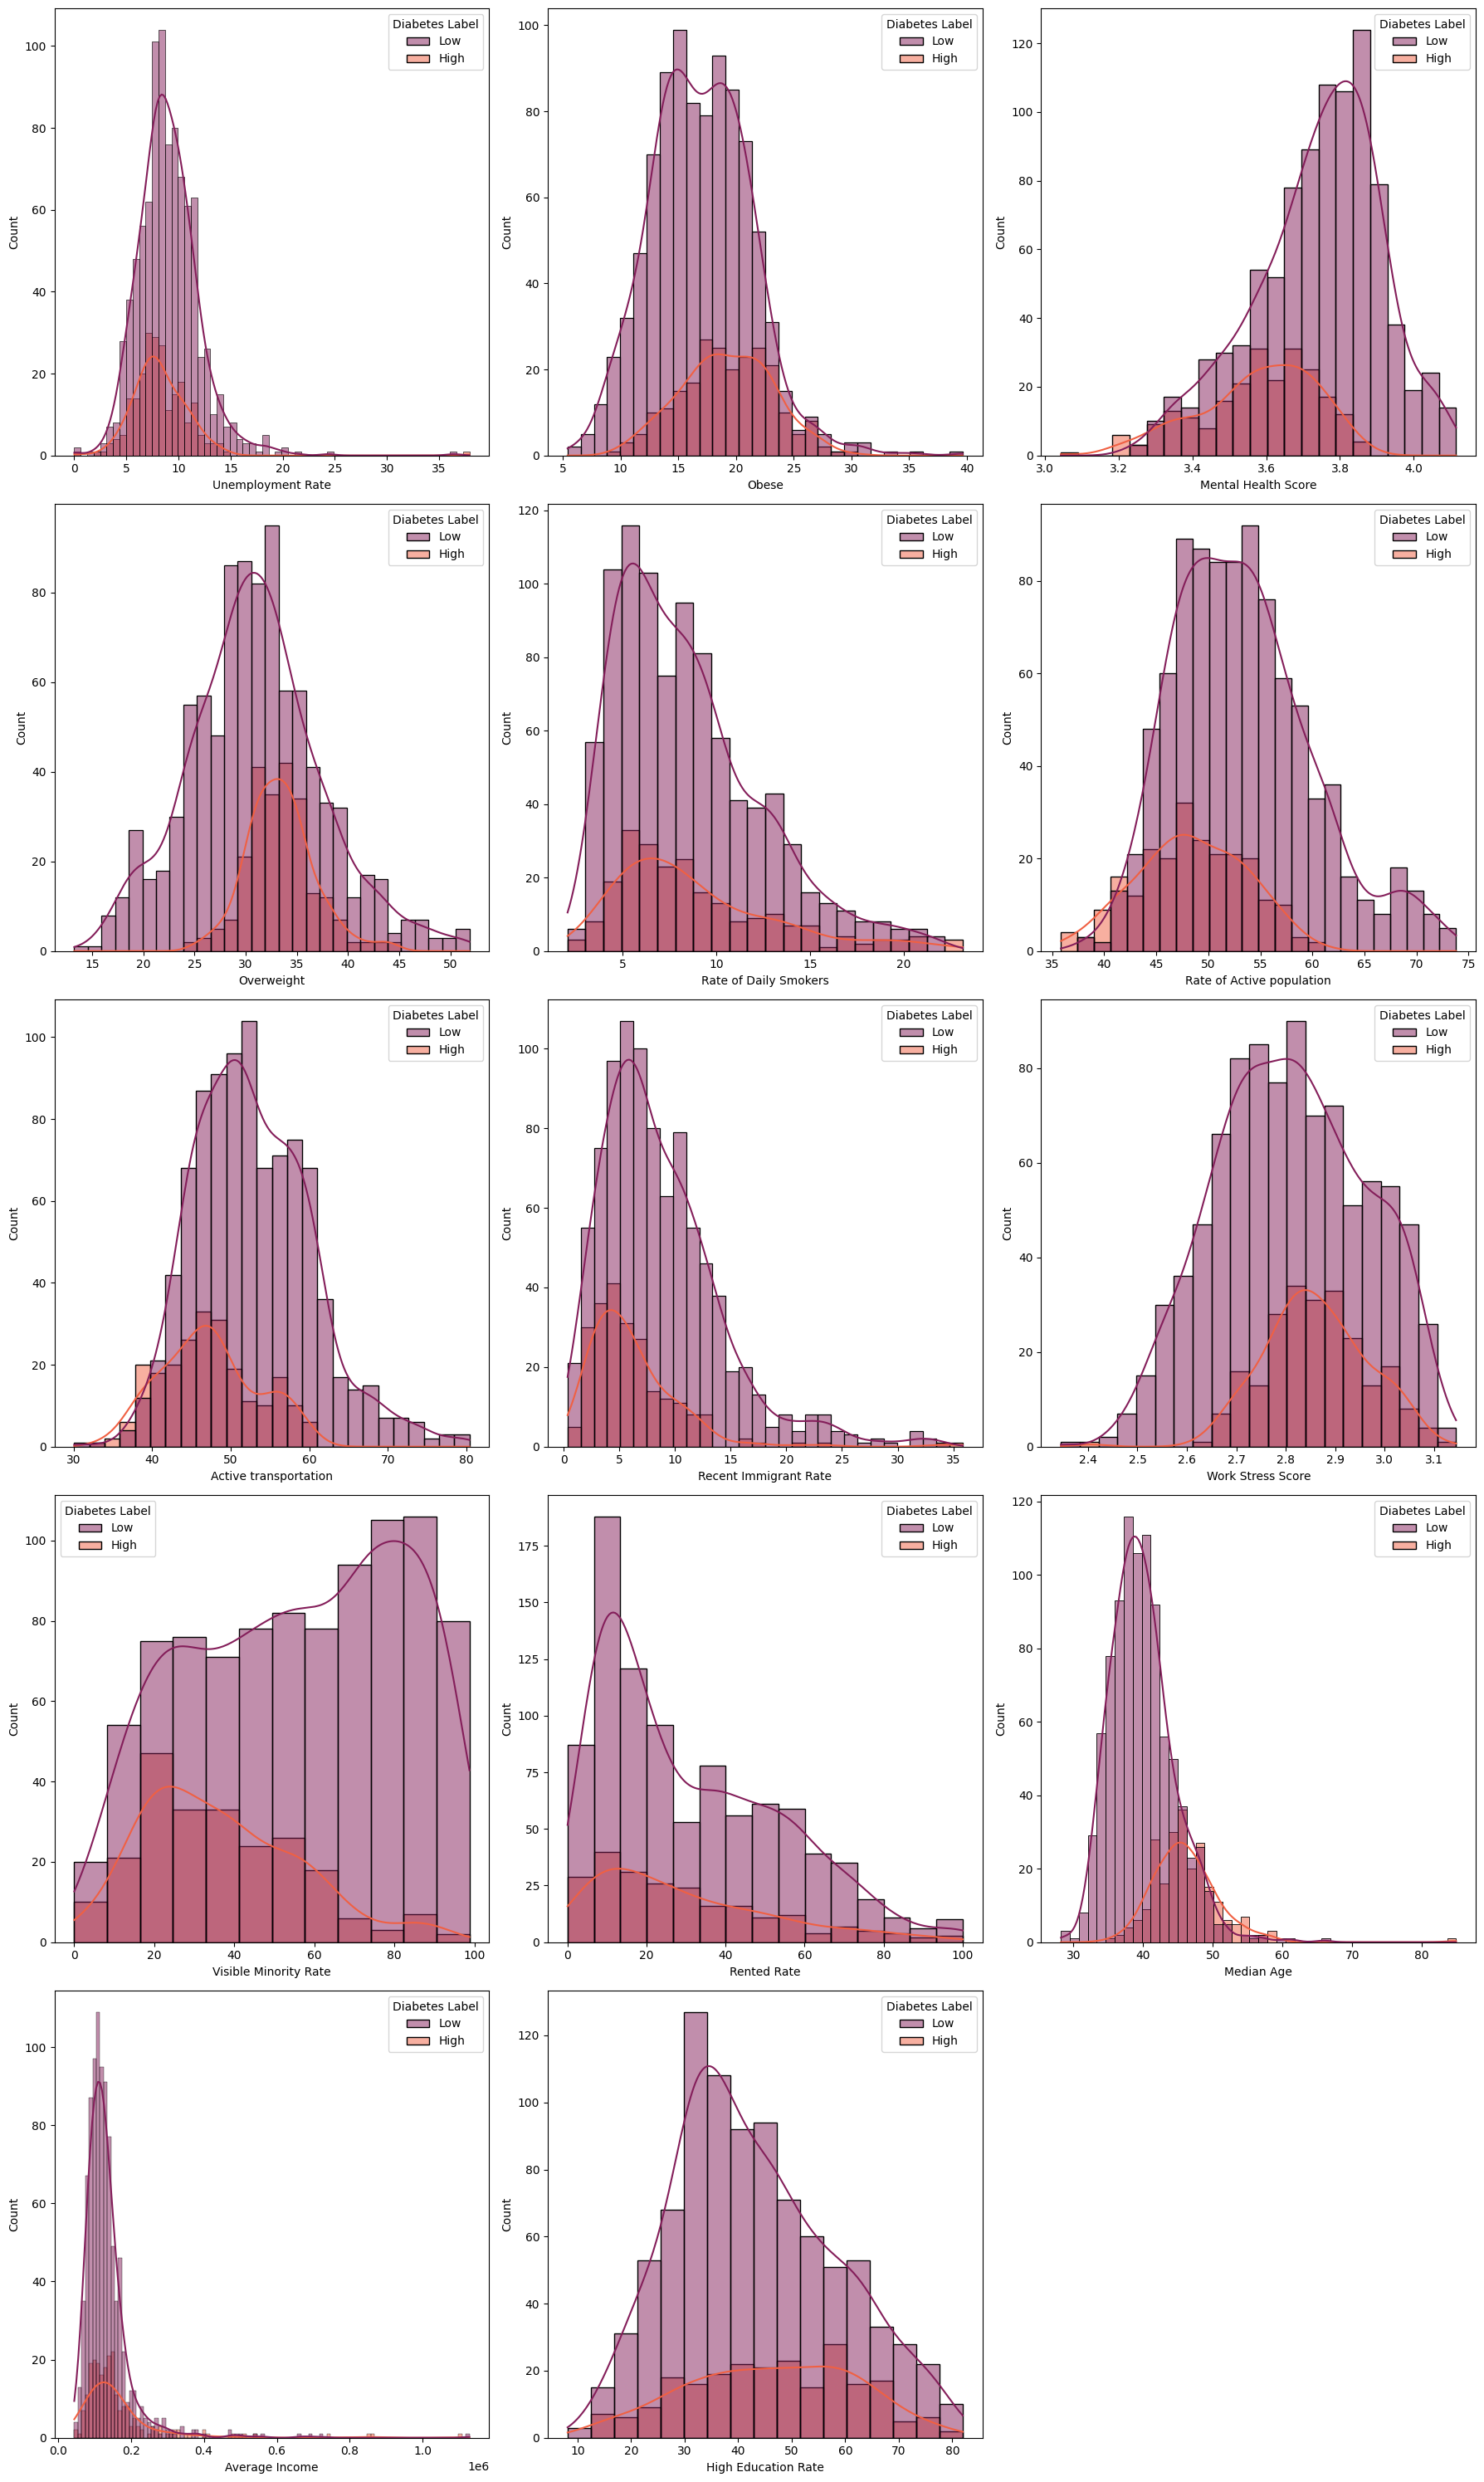

In [ ]:
# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating a grid of subplots
fig, axs = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

# Creating a copy of the original data
data_copy = data.copy()

# Looping through each feature in numeric variables
for i, column in enumerate(Numeric_variables):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // subplots_per_row
    y = i % subplots_per_row

    # Scaling the feature in the copied data using StandardScaler
    #data_copy[column] = scaler.fit_transform(data_copy[[column]])

    # Plot a histogram of the scaled feature split by the Diabetes class
    sns.histplot(data=data_copy, x=column, hue='Diabetes Label', kde=True, palette='rocket', ax=axs[x][y])

# Removing any empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axs[i // subplots_per_row, i % subplots_per_row])

# Display all the subplots
plt.tight_layout()
plt.show()

In [ ]:
#Removing visualization variable
data.drop(columns=['Diabetes Label'], inplace=True)

In [ ]:
# Defining a Z-score threshold
zscore_threshold = 4

# Initialize a dictionary to store variable names and their respective outlier counts
variables_with_outliers = {}

# Iterate through each continuous variable and identify variables with outliers
for variable_name in Numeric_variables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers_count = sum(abs(z_scores) > zscore_threshold)

    # Store the variable name and outlier count in the dictionary
    variables_with_outliers[variable_name] = outliers_count

# Printing the names of variables with their respective outlier counts
print("Variables with the number of outliers beyond 4 standard deviations:")
for variable_name, outliers_count in variables_with_outliers.items():
    print(f"{variable_name}: {outliers_count} observations")


Variables with the number of outliers beyond 4 standard deviations:
Ethnic Concentration: 0 observations
Material Deprivation: 5 observations
Residential Instability: 0 observations
Unemployment Rate: 4 observations
Obese: 2 observations
Mental Health Score: 0 observations
Overweight: 0 observations
Food Insecurity score: 0 observations
Rate of Daily Smokers: 0 observations
Rate of Active population: 0 observations
Active transportation: 0 observations
Rate of Regular alcohol: 0 observations
Recent Immigrant Rate: 10 observations
Work Stress Score: 0 observations
Visible Minority Rate: 0 observations
Rented Rate: 0 observations
Median Age: 2 observations
Average Income: 14 observations
High Education Rate: 0 observations


**Section 3: Data preperation fot simple models**

In [ ]:
DataSimple = data.copy()

In [ ]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Rate of Regular alcohol', 'Active transportation',
       'Rate of Active population', 'Rate of Daily Smokers',
       'Food Insecurity score', 'Food Insecurity binary', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability',
       'Material Deprivation', 'Ethnic Concentration',
       'Residential Instability quintiles', 'Material Deprivation quintiles',
       'Ethnic Concentration quintiles', 'Diabetes Label',
       'Instability_Deprivation'],
      dtype='object')

In [ ]:
# List of columns for log transformation
log_columns = [
 # 'Rate of Daily Smokers',
 'Unemployment Rate',
 'Recent Immigrant Rate',
 'Median Age',
 'Average Income']

# Apply log transformation without mean imputation
for column in log_columns:
    # Apply log transformation directly
    DataSimple[f'log_{column.lower().replace(" ", "_")}'] = np.log(DataSimple[column])

In [ ]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Active transportation', 'Rate of Active population',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability quintiles',
       'Material Deprivation quintiles', 'Ethnic Concentration quintiles',
       'Instability_Deprivation', 'log_unemployment_rate',
       'log_recent_immigrant_rate', 'log_median_age', 'log_average_income'],
      dtype='object')

In [ ]:
DataSimple = DataSimple.drop(columns=log_columns, axis=1)

In [ ]:
# Specifying binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Mental Health Binary']
DataSimple[binary_columns] = DataSimple[binary_columns].astype(int)

Label_column = ['Diabetes']
DataSimple[Label_column] = DataSimple[Label_column].astype(int)

# Specifying categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
DataSimple[categorical_columns] = DataSimple[categorical_columns].astype('category')

# Specifying the rest as floats
float_columns = [col for col in DataSimple.columns if col not in binary_columns + categorical_columns + Label_column]
DataSimple[float_columns] = DataSimple[float_columns].astype(float)


In [ ]:
ext_cma_indexes
X_ext = DataSimple.loc[ext_cma_indexes]
X_ext.head()

y_ext = X_ext['Diabetes']
X_ext = X_ext.drop('Diabetes', axis=1)

# apply transformations

# exclude external validation set from the whole
DataSimple = DataSimple.loc[~DataSimple.index.isin(ext_cma_indexes)]
_test_size = len(ext_cma_indexes)/len(DataSimple)
print("Test dataset percentage: ", _test_size * 100)

Test dataset percentage:  11.014492753623188


In [ ]:
X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=_test_size, random_state=42)

# Application of RUS for downsampling on the training data
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled, X_test, X_External
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)
X_ext_S = ct.transform(X_ext)

#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())
X_ext_S = pd.DataFrame(X_ext_S, columns=ct.get_feature_names_out())

In [ ]:
y_resampled_S.to_csv('y_train.csv')
y_test_S.to_csv('y_test.csv')
y_ext.to_csv('y_ext.csv')

X_resampled_S.to_csv('x_train.csv')
X_test_S.to_csv('x_test.csv')
X_ext_S.to_csv('x_ext.csv')
# load back and use!

**Section 4: Creating Simple models**

**4.1 LR model**

In [ ]:
X_resampled_scaled = scaler.fit_transform(X_resampled_S)
X_test_scaled = scaler.transform(X_test_S)

As we have 35 shortlisted variables, testing all combinations might be infeasible. Thus, the recursive feature elimination with cross validation (RFECV) will be applied to find the optimal subset of variables that maximizes the performance of the model while also avoiding overfitting. Removing less important variables will make the model more interpretable, and more generalizable to unseen data. The tool initiates optimization with all variables included; thereafter, it eliminates one variables at a time. The tool relies on the average performance score of the model on the test data through each iteration.

In [ ]:
accuracy_scoring = make_scorer(accuracy_score)

In [ ]:
Log_reg_model = LogisticRegression()

cv_LR = StratifiedKFold(5)
rfecv_LR = RFECV(
    estimator=Log_reg_model,
    step=1,
    cv=cv_LR,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)
rfecv_LR.fit(X_resampled_scaled, y_resampled_S)

# Print the optimal number of selected features
print(f"Optimal number of features -LR: {rfecv_LR.n_features_}")

Optimal number of features -LR: 13


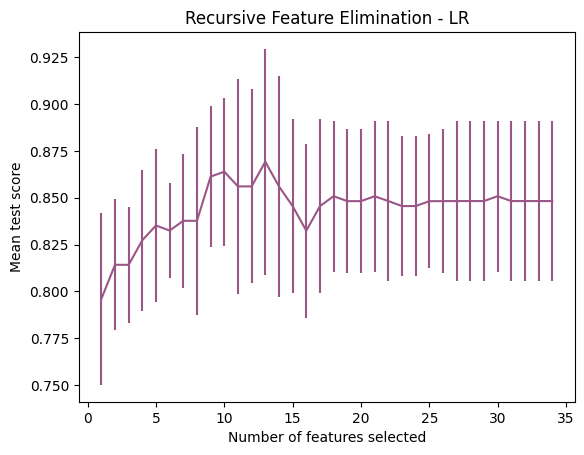

In [ ]:
# Calculate the number of different feature selections tested
n_scores_LR = len(rfecv_LR.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_LR + 1),
    rfecv_LR.cv_results_["mean_test_score"],
    yerr=rfecv_LR.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - LR")

# Show the plot
plt.show()

In [ ]:
selected_LR_features = X_resampled_S.columns[rfecv_LR.support_]
eliminated_LR_features = X_resampled_S.columns[~rfecv_LR.support_]

print("Selected Features for LR:")
print(selected_LR_features)
print("\nEliminated Features for LR:")
print(eliminated_LR_features)

Selected Features for LR:
Index(['one_hot_encoder__Residential Instability quintiles_4',
       'remainder__Mental Health Score', 'remainder__Mental Health Binary',
       'remainder__High Education Rate', 'remainder__Visible Minority Rate',
       'remainder__Work Stress Score', 'remainder__Rate of Active population',
       'remainder__Rate of Daily Smokers', 'remainder__Food Insecurity binary',
       'remainder__Overweight', 'remainder__Obese',
       'remainder__Instability_Deprivation', 'remainder__log_median_age'],
      dtype='object')

Eliminated Features for LR:
Index(['one_hot_encoder__Residential Instability quintiles_1',
       'one_hot_encoder__Residential Instability quintiles_2',
       'one_hot_encoder__Residential Instability quintiles_3',
       'one_hot_encoder__Residential Instability quintiles_5',
       'one_hot_encoder__Material Deprivation quintiles_1',
       'one_hot_encoder__Material Deprivation quintiles_2',
       'one_hot_encoder__Material Deprivation qui

In [ ]:
# Accessing the mean test scores
mean_test_scores_LR = rfecv_LR.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for i, score_LR in enumerate(mean_test_scores_LR):
    num_selected_features = i + 1  #start with one feature
    print(f"Number of Selected Features: {num_selected_features}, Mean Test Score: {score_LR}")

Number of Selected Features: 1, Mean Test Score: 0.7959671907040328
Number of Selected Features: 2, Mean Test Score: 0.8142515379357483
Number of Selected Features: 3, Mean Test Score: 0.8142173615857826
Number of Selected Features: 4, Mean Test Score: 0.8273410799726589
Number of Selected Features: 5, Mean Test Score: 0.8352016404647985
Number of Selected Features: 6, Mean Test Score: 0.8325017088174983
Number of Selected Features: 7, Mean Test Score: 0.8376965140123035
Number of Selected Features: 8, Mean Test Score: 0.8376965140123035
Number of Selected Features: 9, Mean Test Score: 0.8612781954887219
Number of Selected Features: 10, Mean Test Score: 0.8638755980861245
Number of Selected Features: 11, Mean Test Score: 0.8560492139439508
Number of Selected Features: 12, Mean Test Score: 0.8560492139439507
Number of Selected Features: 13, Mean Test Score: 0.8692071086807929
Number of Selected Features: 14, Mean Test Score: 0.8560492139439508
Number of Selected Features: 15, Mean Test 

In [ ]:
# after many runs, we concluded the most important features are as below:

LR_features = [
    'remainder__Active transportation', # from toronto only
    'remainder__Rate of Active population', # in toronto CMA
    'remainder__Overweight',
    'remainder__Obese',
    'remainder__log_median_age'
]
# selected_LR_features.tolist()

In [ ]:
#Fitting the data
X_train_scaled_LR = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_LR = scaler.transform(X_test_S[LR_features])
X_ext_scaled_LR = scaler.transform(X_ext_S[LR_features])

In [ ]:
# Initialize an LogisticRegression regressor
lr = LogisticRegression()

# Creating a pipeline that applies the LogisticRegression regressor
model_for_LogisticRegression = Pipeline([
    ('lr', lr)
])

# Fitting the model on the training data
model_for_LogisticRegression.fit(X_train_scaled_LR, y_resampled_S)
# Define a dictionary of hyperparameter values to search over.
param_dist_LogisticRegression = {
    'lr__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'lr__C': [i/10 for i in range(1,11)],
    'lr__penalty': ['l1', 'l2', 'elasticnet', None],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_LogisticRegression = GridSearchCV(
    model_for_LogisticRegression, param_grid=param_dist_LogisticRegression, cv=skf)

# Train Grid Search on the training data
random_search_LogisticRegression.fit(X_train_scaled_LR, y_resampled_S)

# Extract results into a DataFrame
results_LogisticRegression = pd.DataFrame(random_search_LogisticRegression.cv_results_)

# Display the set of parameters that achieved the best score
results_LogisticRegression[results_LogisticRegression['rank_test_score'] == 1]
random_search_LogisticRegression.best_params_

{'lr__C': 0.8, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}

In [ ]:
# usefull functions to check overfitting in hyper-parameter tuning.
def get_max_indexes(array):
    np_array = np.asarray(array)
    maximums = np.flatnonzero(np_array == np.max(np_array))
    return maximums

# decision_flow = [accuracies, precisions, recalls, f1s]
def pass_decision_flow(accuracies, precisions, recalls, f1s):
    accuracy_maximums = get_max_indexes(accuracies)
    if len(accuracy_maximums) == 1:
        return accuracy_maximums
    elif len(accuracy_maximums) > 1:
        precision_maximums = get_max_indexes(precisions)
        acc_prec = np.intersect1d(accuracy_maximums, precision_maximums)
        if len(acc_prec) == 0:
            return accuracy_maximums
        elif len(acc_prec) == 1:
            return acc_prec
        else:
            rec_maximums = get_max_indexes(recalls)
            acc_prec_rec =  np.intersect1d(acc_prec, rec_maximums)
            if len(acc_prec_rec) == 0:
                return acc_prec
            elif len(acc_prec_rec) == 1:
                return acc_prec_rec
            else:
                f1_maximums = get_max_indexes(f1s)
                acc_prec_rec_f1 = np.intersect1d(acc_prec_rec, f1_maximums)
                if len(acc_prec_rec_f1) == 0:
                    return acc_prec_rec
                else:
                    return acc_prec_rec_f1

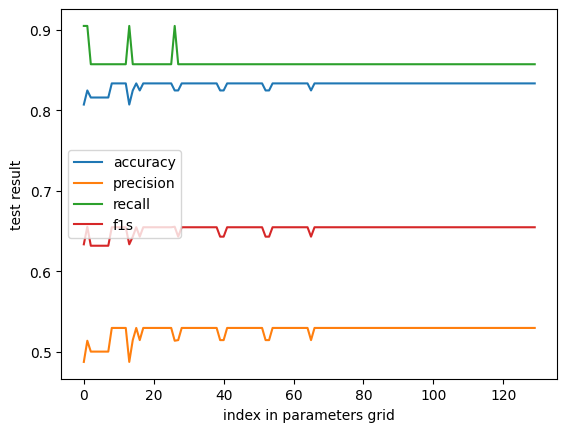

Best Configs: 
{'lr__C': 0.3, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                lr__C=param_config["lr__C"],
                lr__penalty=param_config["lr__penalty"],
                lr__solver=param_config["lr__solver"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_LogisticRegression
model = model_for_LogisticRegression

x_train = X_train_scaled_LR
y_train = y_resampled_S
x_test = X_test_scaled_LR
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        lr__C=param_config["lr__C"],
        lr__penalty=param_config["lr__penalty"],
        lr__solver=param_config["lr__solver"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]
print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [ ]:
best_config = the_bests[0]
model_for_LogisticRegression = model_for_LogisticRegression.set_params(
    lr__C=best_config["lr__C"],
    lr__penalty=best_config["lr__penalty"],
    lr__solver=best_config["lr__solver"],
)

# Refit the model using the training data
LR_model = model_for_LogisticRegression.fit(X_train_scaled_LR, y_resampled_S)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_LR_model = cross_val_predict(LR_model, X_train_scaled_LR, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_LR = confusion_matrix(y_resampled_S, predicted_labels_LR_model)

# Calculate the full classification report
class_report_LR = classification_report(y_resampled_S, predicted_labels_LR_model)

# Calculate accuracy
accuracy_LR = accuracy_score(y_resampled_S, predicted_labels_LR_model)

# Calculate precision
precision_LR = precision_score(y_resampled_S, predicted_labels_LR_model)

# Calculate recall
recall_LR = recall_score(y_resampled_S, predicted_labels_LR_model)

# Calculate F1 score
f1_LR = f1_score(y_resampled_S, predicted_labels_LR_model)


# Print the full confusion matrix and classification report
print("Logistic Regression Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_LR)
print("B. Classification Report:")
print(class_report_LR)
print("C. Accuracy: {:.2f}".format(accuracy_LR))
print("D. Precision: {:.2f}".format(precision_LR))
print("E. Recall (Sensitivity): {:.2f}".format(recall_LR))
print("F. F1 Score: {:.2f}".format(f1_LR))

Logistic Regression Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[145  46]
 [ 24 167]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       191
           1       0.78      0.87      0.83       191

    accuracy                           0.82       382
   macro avg       0.82      0.82      0.82       382
weighted avg       0.82      0.82      0.82       382

C. Accuracy: 0.82
D. Precision: 0.78
E. Recall (Sensitivity): 0.87
F. F1 Score: 0.83


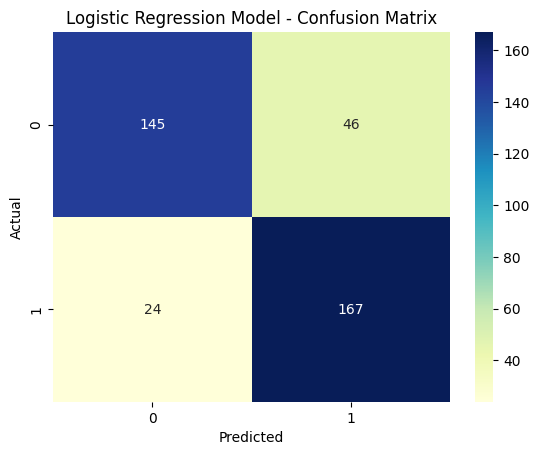

In [ ]:
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train ROC-AUC: 0.9021


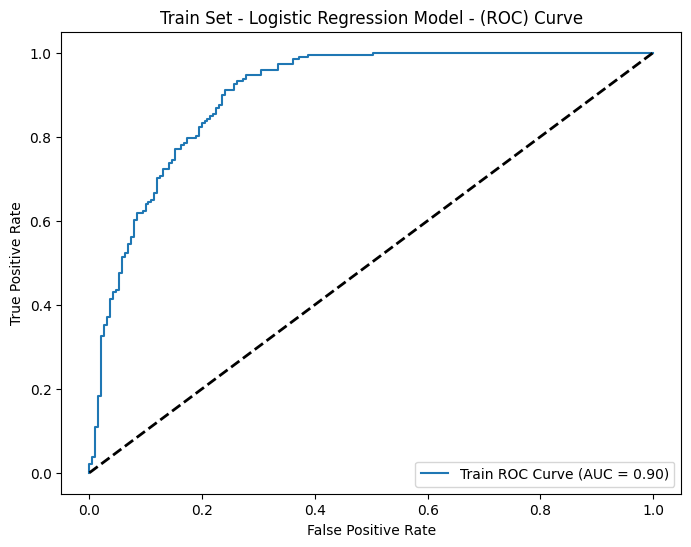

In [ ]:
roc_auc_train_LR, fpr_LR, tpr_LR = draw_roc(LR_model, X_train_scaled_LR, y_resampled_S, 'Train', 'Logistic Regression Model')

In [ ]:
# Making predictions on the test set of Logit Regression
accuracy_test_LR, precision_test_LR, recall_test_LR, f1_test_LR = performance_metrics(LR_model, X_test_scaled_LR, y_test_S, 'Test', 'Logistic Regression Model')

Logistic Regression Model Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.82
Precision: 0.51
Recall (Sensitivity): 0.90
F1 Score: 0.66
Confusion Matrix:
[[75 18]
 [ 2 19]]


Test ROC-AUC: 0.8950


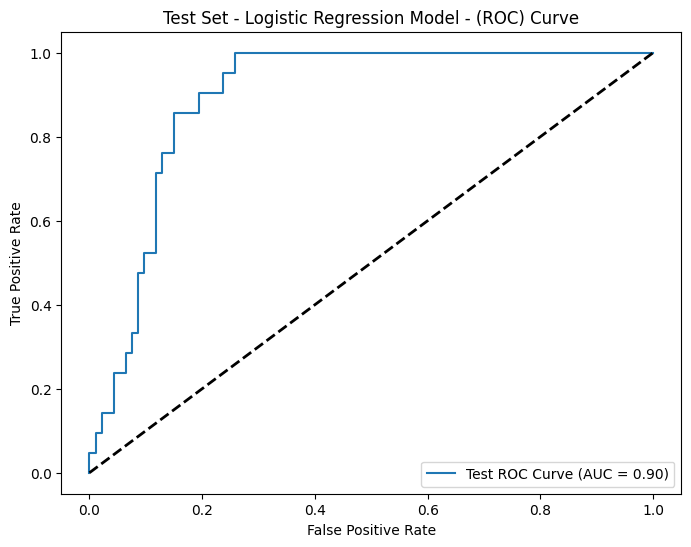

In [ ]:
# roc of test set
roc_auc_test_LR, fpr_test_LR, tpr_test_LR = draw_roc(LR_model, X_test_scaled_LR, y_test_S, 'Test', 'Logistic Regression Model')

In [ ]:
# Making predictions on the external set of Logit Regression
accuracy_ext_LR, precision_ext_LR, recall_ext_LR, f1_ext_LR = performance_metrics(LR_model, X_ext_scaled_LR, y_ext, 'External Validation', 'Logistic Regression Model')

Logistic Regression Model Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.82
Precision: 0.44
Recall (Sensitivity): 0.67
F1 Score: 0.53
Confusion Matrix:
[[81 15]
 [ 6 12]]


External Validation ROC-AUC: 0.8912


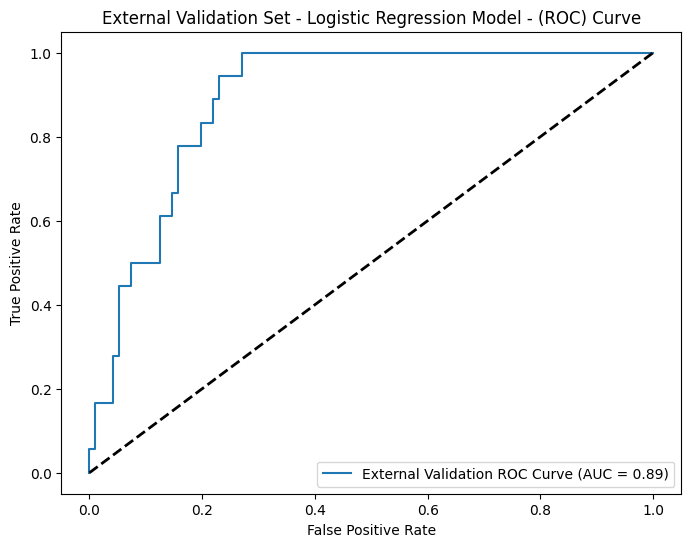

In [ ]:
# ROC of external set
roc_auc_ext_LR, fpr_ext_LR, tpr_ext_LR = draw_roc(LR_model, X_ext_scaled_LR, y_ext, 'External Validation', 'Logistic Regression Model')

In [ ]:
# Usefull function in Sensitivity Analysis

import copy
from pandas.core.frame import DataFrame
# for sensitivity analysis
def permute_column(matrix, column_index):
    matrix_copied = copy.deepcopy(matrix)
    if isinstance(matrix_copied, DataFrame):
        np.random.shuffle(matrix_copied[matrix_copied.columns[column_index]])
    else:
        np.random.shuffle(matrix_copied[:,column_index])
    return matrix_copied

def sensitivity_analysis(model, x_test, y_test, features):
    y_test_predicted = model.predict(x_test)
    sensitivity_result = {metric: {} for metric in ["accuracy", "precision", "recall", "f1"]}
    sensitivity_result["accuracy"]["base"] = accuracy_score(y_test, y_test_predicted),
    sensitivity_result["precision"]["base"] = precision_score(y_test, y_test_predicted),
    sensitivity_result["recall"]["base"] = recall_score(y_test, y_test_predicted),
    sensitivity_result["f1"]["base"] = f1_score(y_test, y_test_predicted)

    for column_index in range(x_test.shape[1]):
        x_test_permuted = permute_column(x_test, column_index)
        y_test_permutated_predict = model.predict(x_test_permuted)
        column = features[column_index]
        sensitivity_result["accuracy"][column] = [ #main_accuracy,
                                                        accuracy_score(y_test, y_test_permutated_predict)]
        sensitivity_result["precision"][column] = [ #main_accuracy,
                                                         precision_score(y_test, y_test_permutated_predict)]
        sensitivity_result["recall"][column] = [ #main_accuracy,
                                                      recall_score(y_test, y_test_permutated_predict)]
        sensitivity_result["f1"][column] = [ #main_accuracy,
                                                  f1_score(y_test, y_test_permutated_predict)]
    return sensitivity_result

# recall | f1score
# accuracy | precision
def draw_sensitivity_result(sensitivity_result):
    fig, axs = plt.subplots(2, 2, figsize=(20, 30))
    draw(sensitivity_result, "accuracy", axs[0,0])
    draw(sensitivity_result, "precision", axs[0,1])
    draw(sensitivity_result, "recall", axs[1,0])
    draw(sensitivity_result, "f1", axs[1,1])

def draw(sensitivity_result, metric, ax):
    plt.figure()
    baseline = sensitivity_result[metric]["base"]
    del sensitivity_result[metric]["base"]
    _data = pd.DataFrame.from_dict(sensitivity_result[metric])
    sns.barplot(data=_data, palette='deep', ax=ax)
    ax.axhline(baseline, color='grey', linestyle='--', linewidth=2)
    ax.set_ylim([0,1])
    ax.set_xlabel('Permutated Columns')
    ax.set_ylabel('Target Metric')
    ax.set_title(metric)
    ax.set_xticklabels(_data, rotation=45)
    ax.grid(axis='y', linewidth=.3)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()


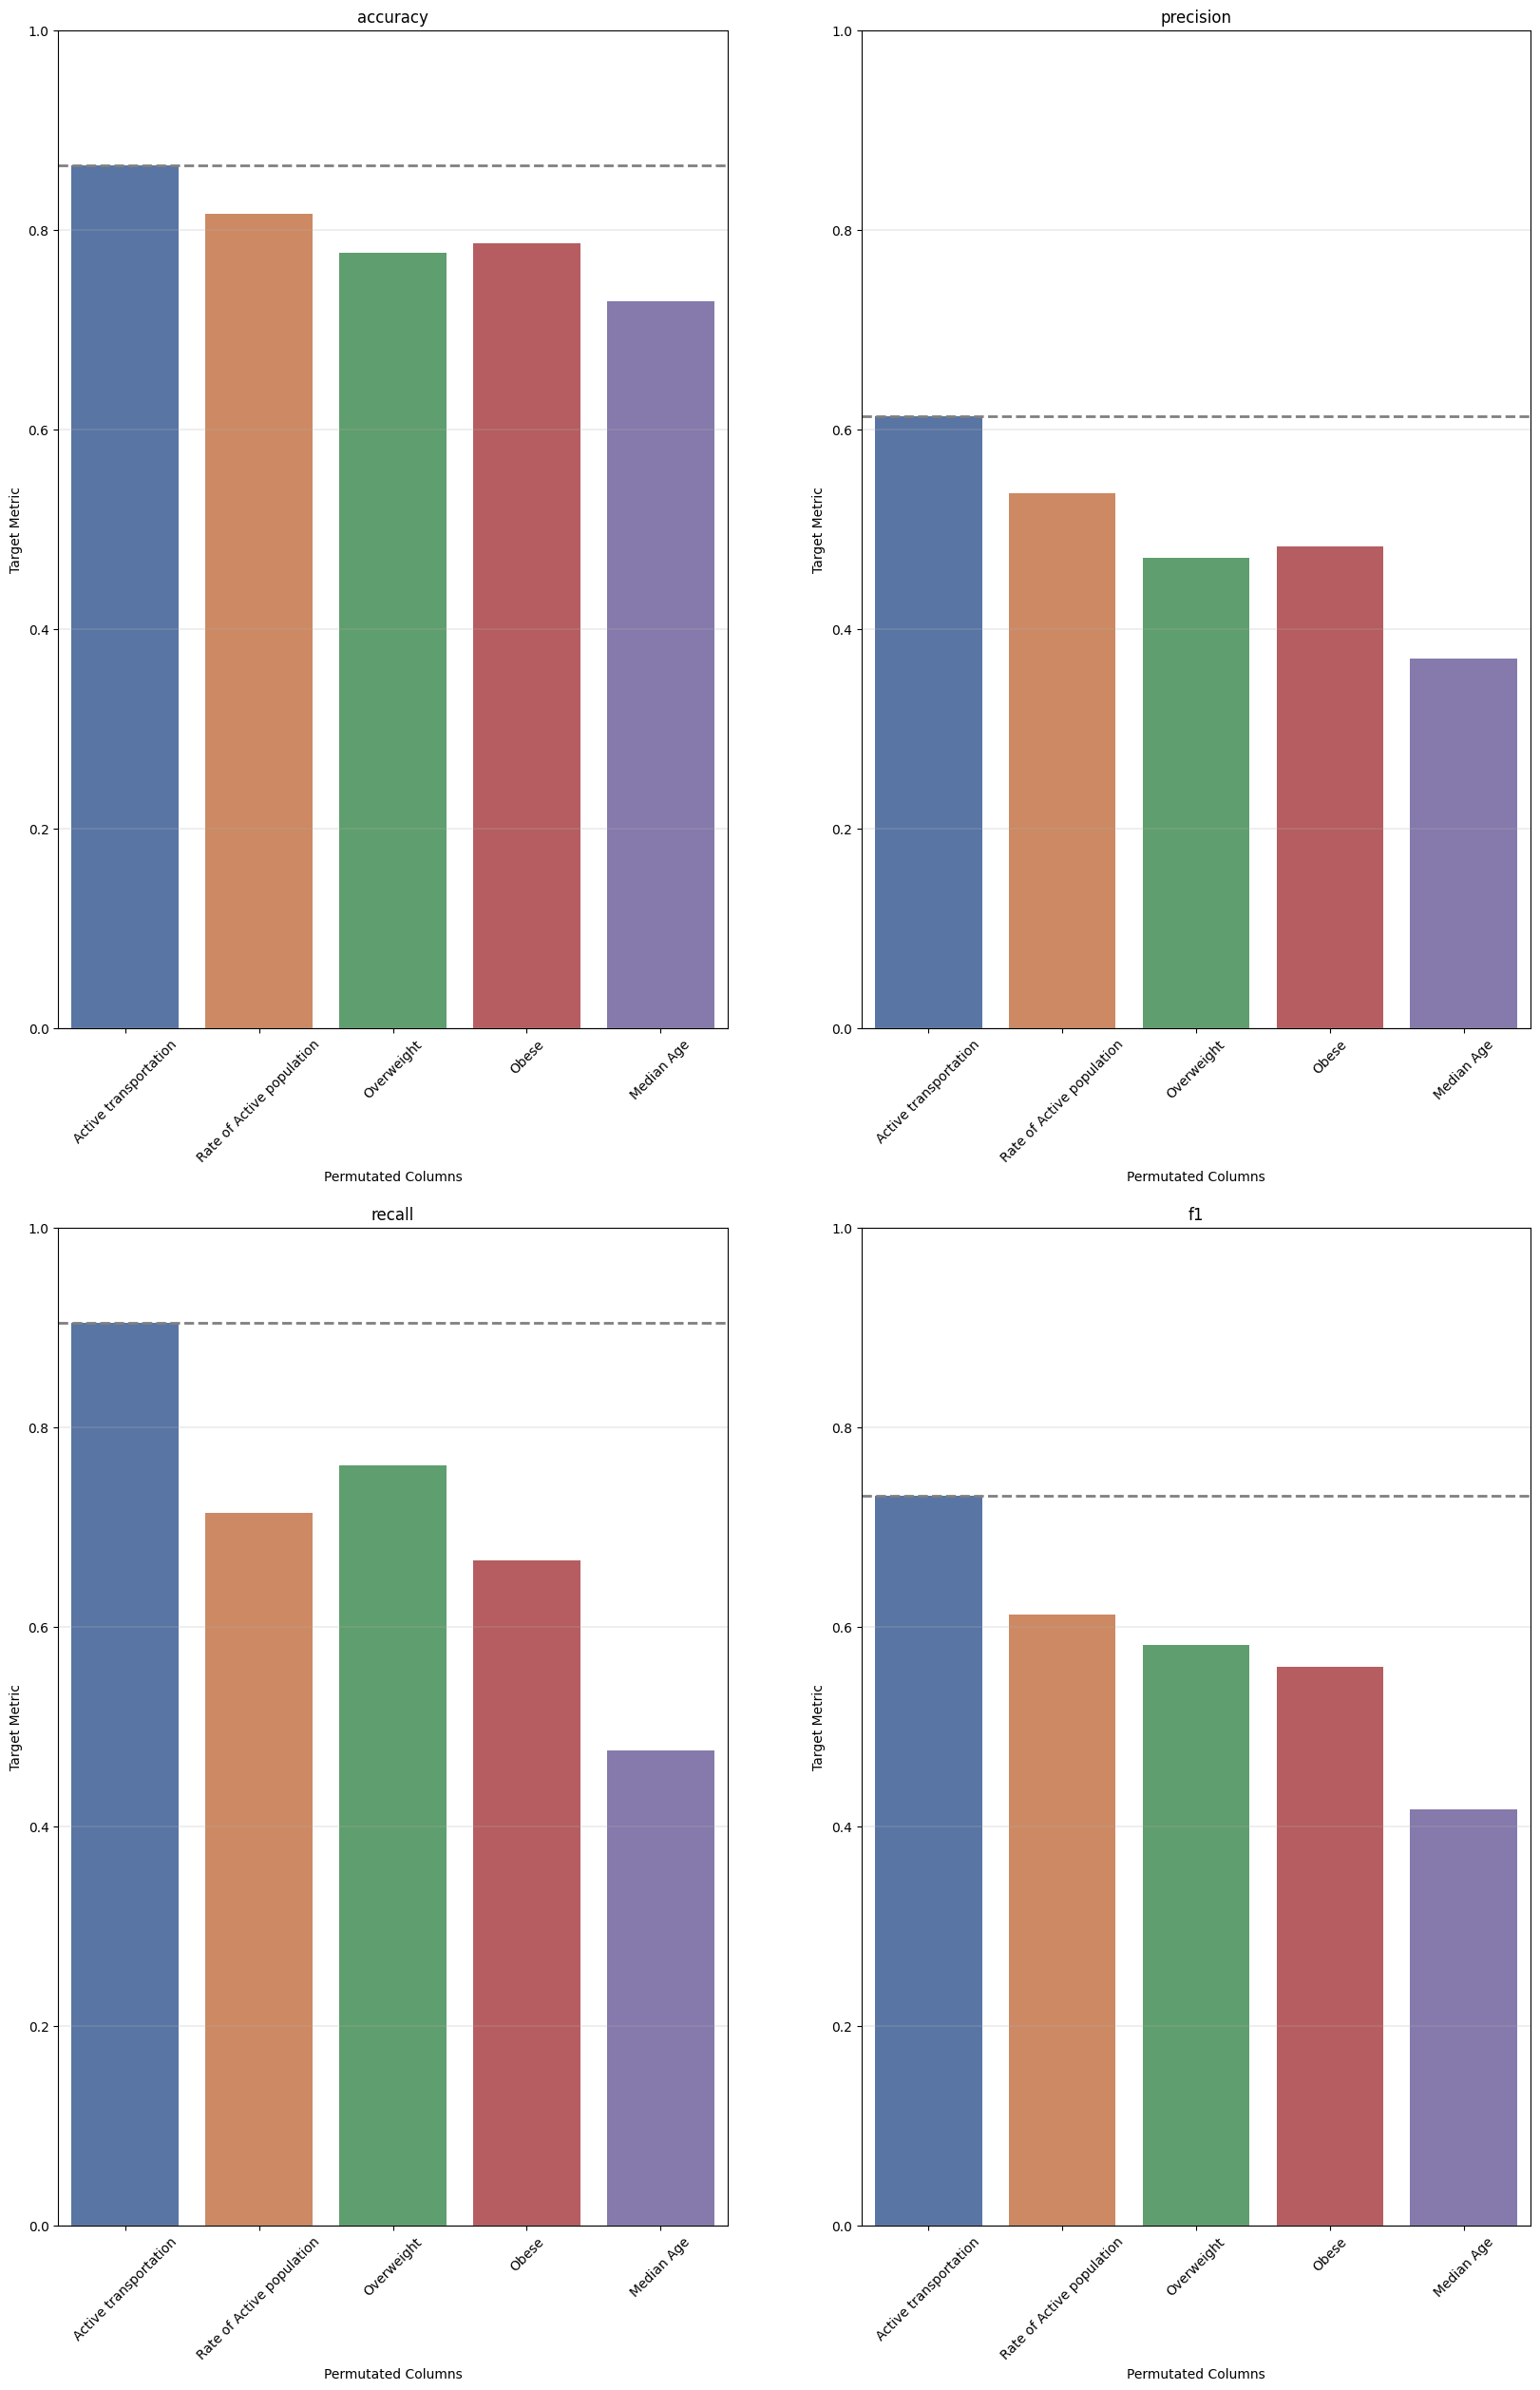

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sensitivity Analysis
LR_features_short = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age'
]
# selected_LR_features.tolist()
result = sensitivity_analysis(
    model_for_LogisticRegression,
    X_test_scaled_LR,
    y_test_S,
    LR_features_short)
draw_sensitivity_result(result)

In [ ]:
# record the best model
best_model_name = "toronto_cma_linear.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(LR_model, file)

**4.2 KNN model**

In [ ]:
# since it is not applicable to apply REFCV to KNNClassifier, we decided to continue with the s
# selected columns extracted in the Logistic Regression Step.

# Initialize the StandardScaler
scaler = StandardScaler()

# X_S = DataSimple.drop('Diabetes', axis=1)
# y_S = DataSimple['Diabetes']

# # Split the data into training and test sets
# X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# # Under samling the training data to address imbalance classification issue
# rus = RandomUnderSampler()
# X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)

# ct = ColumnTransformer(
#     transformers=[
#         ('one_hot_encoder', OneHotEncoder(), categorical_columns),
#     ],
#     remainder='passthrough'
# )

# # Applying the one-hot encoding transformation to X_resampled and X_test
# X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
# X_test_S = ct.transform(X_test_S)

# #converting numpyarray back to DataFrame
# X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
# X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())

#Fitting the data
X_train_scaled_KNN = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_KNN = scaler.transform(X_test_S[LR_features])
X_ext_scaled_KNN = scaler.transform(X_ext_S[LR_features])

In [ ]:
#Creating a list to store the cross-validation scores for different values of k
k_grid = list(range(1, 21))  # Try k values from 1 to 20, for example
cv_scores = []

In [ ]:
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X_train_scaled_KNN, y_resampled_S, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

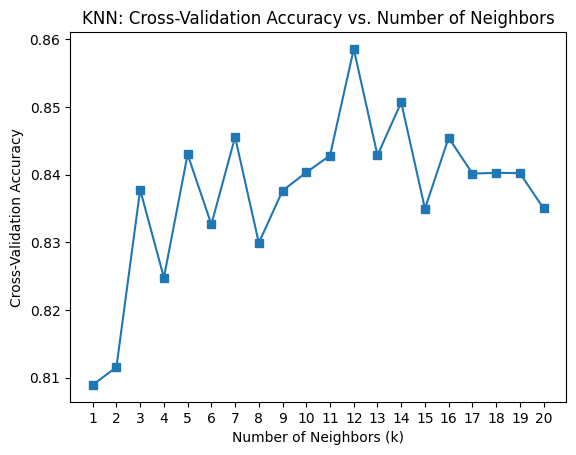

In [ ]:
#Plotting the cross-validation scores to identify the optimal K
plt.plot(k_grid, cv_scores, marker = "s")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(min(k_grid), max(k_grid) + 1, 1))
plt.show()


In [ ]:
# Print K and the corresponding cross-validation scores
for k, score in zip(k_grid, cv_scores):
    print(f"K = {k}, Cross-Validation Accuracy = {score:.3f}")

K = 1, Cross-Validation Accuracy = 0.809
K = 2, Cross-Validation Accuracy = 0.812
K = 3, Cross-Validation Accuracy = 0.838
K = 4, Cross-Validation Accuracy = 0.825
K = 5, Cross-Validation Accuracy = 0.843
K = 6, Cross-Validation Accuracy = 0.833
K = 7, Cross-Validation Accuracy = 0.846
K = 8, Cross-Validation Accuracy = 0.830
K = 9, Cross-Validation Accuracy = 0.838
K = 10, Cross-Validation Accuracy = 0.840
K = 11, Cross-Validation Accuracy = 0.843
K = 12, Cross-Validation Accuracy = 0.859
K = 13, Cross-Validation Accuracy = 0.843
K = 14, Cross-Validation Accuracy = 0.851
K = 15, Cross-Validation Accuracy = 0.835
K = 16, Cross-Validation Accuracy = 0.845
K = 17, Cross-Validation Accuracy = 0.840
K = 18, Cross-Validation Accuracy = 0.840
K = 19, Cross-Validation Accuracy = 0.840
K = 20, Cross-Validation Accuracy = 0.835


In [ ]:
# Grid search
# Initialize an LogisticRegression regressor
knn = KNeighborsClassifier(n_neighbors=6)

# Creating a pipeline that applies the LogisticRegression regressor
model_for_KNN = Pipeline([
    ('knn', knn)
])

# Fitting the model on the training data
model_for_KNN.fit(X_train_scaled_KNN, y_resampled_S)
# Define a dictionary of hyperparameter values to search over.
param_dist_KNN = {
    'knn__metric': ['cityblock', 'manhattan', 'cosine', 'euclidean', 'haversine', 'nan_euclidean', 'l1', 'l2'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance'],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_KNN = GridSearchCV(
    model_for_KNN, param_grid=param_dist_KNN, cv=skf)

# Train Grid Search on the training data
random_search_KNN.fit(X_train_scaled_KNN, y_resampled_S)

# Extract results into a DataFrame
results_KNN = pd.DataFrame(random_search_KNN.cv_results_)

# Display the set of parameters that achieved the best score
results_KNN[results_KNN['rank_test_score'] == 1]
random_search_KNN.best_params_


{'knn__algorithm': 'auto', 'knn__metric': 'cosine', 'knn__weights': 'uniform'}

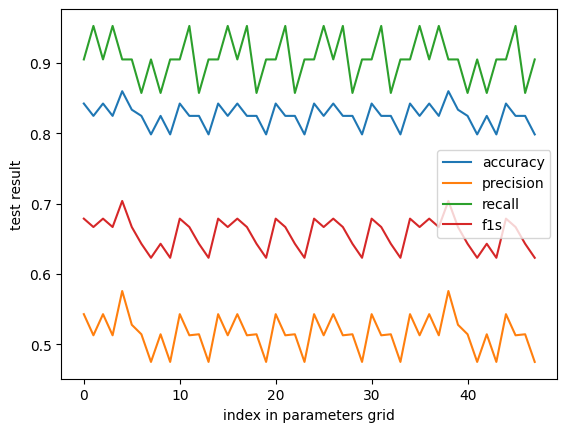

Best Configs: 
{'knn__algorithm': 'auto', 'knn__metric': 'cosine', 'knn__weights': 'uniform'}


{'knn__algorithm': 'brute', 'knn__metric': 'cosine', 'knn__weights': 'uniform'}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                knn__metric=param_config["knn__metric"],
                knn__algorithm=param_config["knn__algorithm"],
                knn__weights=param_config["knn__weights"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_KNN
model = model_for_KNN

x_train = X_train_scaled_KNN
y_train = y_resampled_S
x_test = X_test_scaled_KNN
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        knn__metric=param_config["knn__metric"],
        knn__algorithm=param_config["knn__algorithm"],
        knn__weights=param_config["knn__weights"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [ ]:
# select one of the best configs

best_config = the_bests[0]
model_for_KNN = model_for_KNN.set_params(
    knn__metric=best_config["knn__metric"],
    knn__algorithm=best_config["knn__algorithm"],
    knn__weights=best_config["knn__weights"],
)

# Refit the model using the training data
knn = model_for_KNN.fit(X_train_scaled_KNN, y_resampled_S)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_knn_model = cross_val_predict(knn, X_train_scaled_KNN, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_knn = confusion_matrix(y_resampled_S, predicted_labels_knn_model)

# Calculate the full classification report
class_report_knn = classification_report(y_resampled_S, predicted_labels_knn_model)

# Calculate accuracy
accuracy_knn = accuracy_score(y_resampled_S, predicted_labels_knn_model)

# Calculate precision
precision_knn = precision_score(y_resampled_S, predicted_labels_knn_model)

# Calculate recall
recall_knn = recall_score(y_resampled_S, predicted_labels_knn_model)

# Calculate F1 score
f1_knn = f1_score(y_resampled_S, predicted_labels_knn_model)


# Print the full confusion matrix and classification report
print("KNN Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_knn)
print("B. Classification Report:")
print(class_report_knn)
print("C. Accuracy: {:.2f}".format(accuracy_knn))
print("D. Precision: {:.2f}".format(precision_knn))
print("E. Recall (Sensitivity): {:.2f}".format(recall_knn))
print("F. F1 Score: {:.2f}".format(f1_knn))

KNN Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[158  33]
 [ 22 169]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       191
           1       0.84      0.88      0.86       191

    accuracy                           0.86       382
   macro avg       0.86      0.86      0.86       382
weighted avg       0.86      0.86      0.86       382

C. Accuracy: 0.86
D. Precision: 0.84
E. Recall (Sensitivity): 0.88
F. F1 Score: 0.86


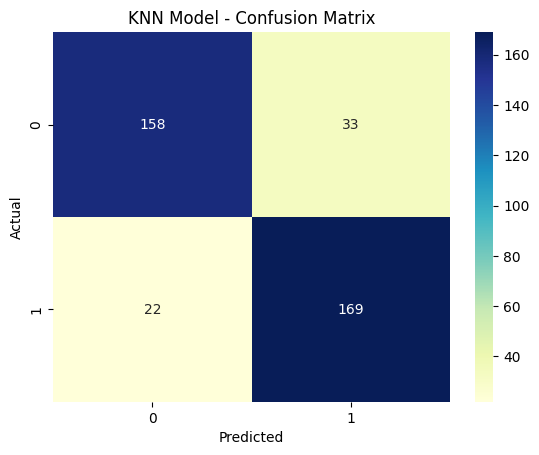

In [ ]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train ROC-AUC: 0.9644


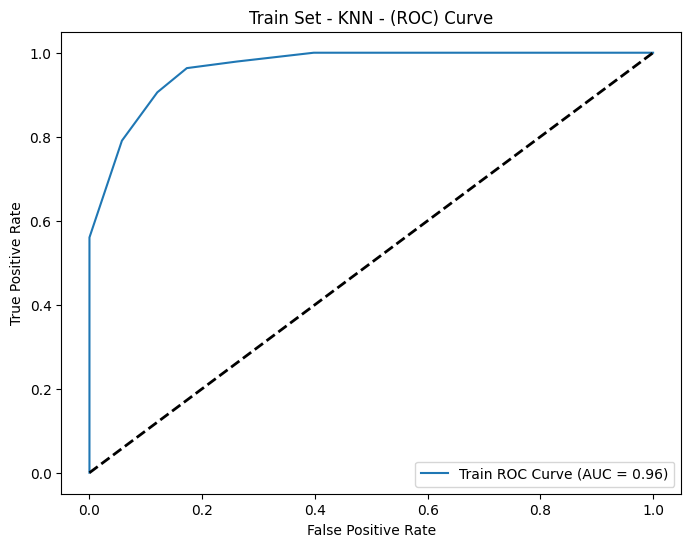

In [ ]:
roc_auc_knn, fpr_knn, tpr_knn = draw_roc(knn, X_train_scaled_KNN, y_resampled_S, 'Train', 'KNN')

In [ ]:
accuracy_test_knn, precision_test_knn, recall_test_knn, f1_test_knn = performance_metrics(knn, X_test_scaled_KNN, y_test_S, 'Test', 'KNN')

KNN Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.86
Precision: 0.58
Recall (Sensitivity): 0.90
F1 Score: 0.70
Confusion Matrix:
[[79 14]
 [ 2 19]]


Test ROC-AUC: 0.9347


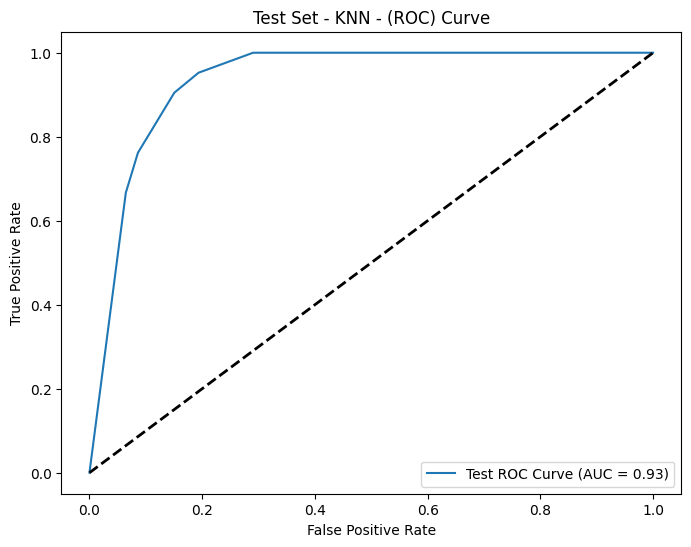

In [ ]:
roc_auc_test_knn, fpr_test_knn, tpr_test_knn = draw_roc(knn, X_test_scaled_KNN, y_test_S, 'Test', 'KNN')

In [ ]:
accuracy_ext_knn, precision_ext_knn, recall_ext_knn, f1_ext_knn = performance_metrics(knn, X_ext_scaled_KNN, y_ext, 'External Validation', 'KNN')

KNN Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.55
Recall (Sensitivity): 0.89
F1 Score: 0.68
Confusion Matrix:
[[83 13]
 [ 2 16]]


External Validation ROC-AUC: 0.9300


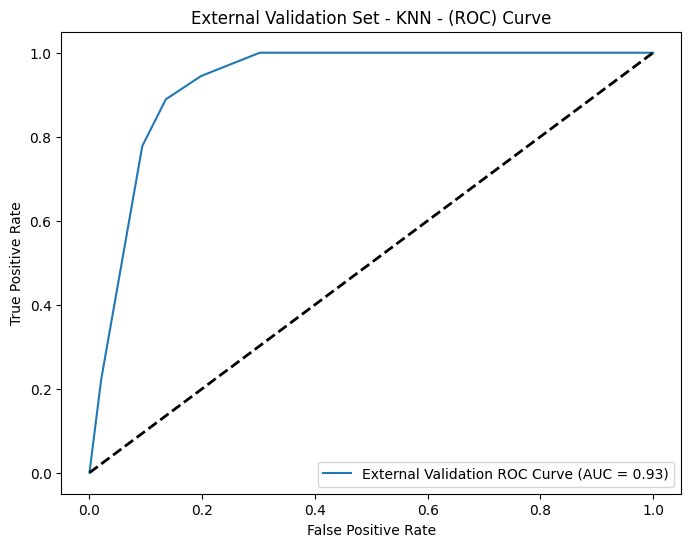

In [ ]:
roc_auc_ext_knn, fpr_ext_knn, tpr_ext_knn = draw_roc(knn, X_ext_scaled_KNN, y_ext, 'External Validation', 'KNN')

In [ ]:
# Sensitivity Analysis
KNN_features_short = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age'
]
result = sensitivity_analysis(
    model_for_KNN,
    X_test_scaled_KNN,
    y_test_S,
    KNN_features_short)
draw_sensitivity_result(result)

NameError: name 'sensitivity_analysis' is not defined

In [ ]:
# record the best model
best_model_name = "toronto_cma_knn.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(model_for_KNN, file)

**4.3 MLP(NN) model**

In [ ]:
# since it is not applicable to apply REFCV to MLPClassifier, we decided to continue with the s
# selected columns extracted in the Logistic Regression Step.

# Initialize the StandardScaler
scaler = StandardScaler()

# X_S = DataSimple.drop('Diabetes', axis=1)
# y_S = DataSimple['Diabetes']

# # Split the data into training and test sets
# X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# # Under samling the training data to address imbalance classification issue
# rus = RandomUnderSampler()
# X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


# ct = ColumnTransformer(
#     transformers=[
#         ('one_hot_encoder', OneHotEncoder(), categorical_columns),
#     ],
#     remainder='passthrough'
# )

# # Applying the one-hot encoding transformation to X_resampled and X_test
# X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
# X_test_S = ct.transform(X_test_S)

# #converting numpyarray back to DataFrame
# X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
# X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())


In [ ]:
MLP_features = [
    'remainder__Rate of Daily Smokers',
    'remainder__log_median_age',
    'remainder__Visible Minority Rate',
    'remainder__Active transportation',
    'remainder__Rate of Active population',
    'remainder__Overweight',
    'remainder__Obese',

    # newly added
    # 'remainder__Work Stress Score',
    #'remainder__Mental Health Score',
]

#Fitting the data
X_train_scaled_MLP = scaler.fit_transform(X_resampled_S[MLP_features])
X_test_scaled_MLP = scaler.transform(X_test_S[MLP_features])
X_ext_scaled_MLP = scaler.transform(X_ext_S[MLP_features])

In [ ]:
# SHAP analysis
import pickle
import shap

features = [
    'Rate of Daily Smokers',
    'Median Age',
    'Visible Minority Rate',
    'Active transportation',
    'Rate of Active population',
    'Overweight',
    'Obese',

    # newly added
    'Mental Health Score',
    'Work Stress Score'
]

loaded_model = pickle.load(open("2nd_mhs_wss_toronto_cma_mlp.pkl", 'rb'))

X_train = X_train_scaled_MLP
X_test = X_test_scaled_MLP

ModuleNotFoundError: No module named 'shap'

In [ ]:
explainer = shap.KernelExplainer(loaded_model.predict, X_train, feature_names=features)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
# Waterfall plot for the first observation
shap.initjs()

NameError: name 'shap' is not defined

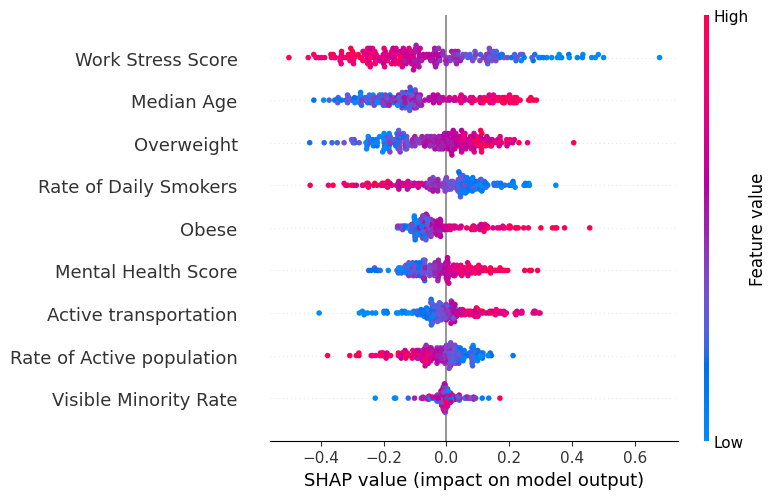

In [ ]:
# import random
# index = random.randint(0, len(shap_values) - 1)
# print(index)
# shap.waterfall_plot(
#     shap.Explanation(
#         values=shap_values[index],
#         base_values=explainer.expected_value,
#         data=X_test[index],
#         feature_names=features),
#     max_display=10)
# plt.show()

# Mean SHAP Plot:
shap.summary_plot(shap_values, X_test, feature_names=features)

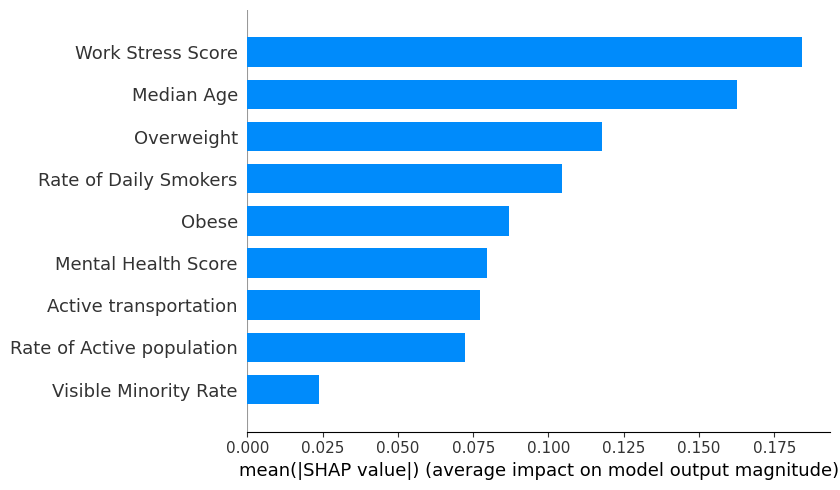

In [ ]:
# Beeswarm Plot:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features, plot_size=[8.5,5])


# from causal ... save figures
# shap_values = causal_forest.shap_values(X)
# # Suppose shap_values is the dictionary you provided
# diabetes_shap_values = shap_values[outcome][treatment].values
# base_values = shap_values[outcome][treatment].base_values
# data = shap_values[outcome][treatment].data
# shap_diagram_value = [np.mean(np.abs(diabetes_shap_values[:,i])) for i in range(len(covariates))]
# shap_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Average SHAP Value': shap_diagram_value
# })

# # Export the DataFrame to a CSV file
# shap_df.to_csv(f'{visual_namings[treatment]}_efs.csv', index=False)

In [ ]:
# Initialize an SVM classifier
MLP = MLPClassifier()


# Creating a pipeline that applies the Decision Tree classifier
model_for_MLP = Pipeline([
    ('mlp', MLP)
])

# Fitting the model on the training data
model_for_MLP.fit(X_train_scaled_MLP, y_resampled_S)

# Define a dictionary of hyperparameter values to search over.

param_dist_MLP = {
    'mlp__activation': ['tanh'], #['identity', 'logistic', 'tanh', 'relu'],
    'mlp__solver': ['lbfgs'], #['lbfgs', 'sgd', 'adam'],
    'mlp__hidden_layer_sizes': [(128, 64)] #list(product([16,32,64,128], [16,32,64,128]))
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_MLP = GridSearchCV(
    model_for_MLP, param_grid=param_dist_MLP, cv=skf)

# Train Grid Search on the training data
random_search_MLP.fit(X_train_scaled_MLP, y_resampled_S)

# Extract results into a DataFrame
results_MLP = pd.DataFrame(random_search_MLP.cv_results_)

# Display the set of parameters that achieved the best score
results_MLP[results_MLP['rank_test_score'] == 1]
random_search_MLP.best_params_

{'mlp__activation': 'tanh',
 'mlp__hidden_layer_sizes': (128, 64),
 'mlp__solver': 'lbfgs'}

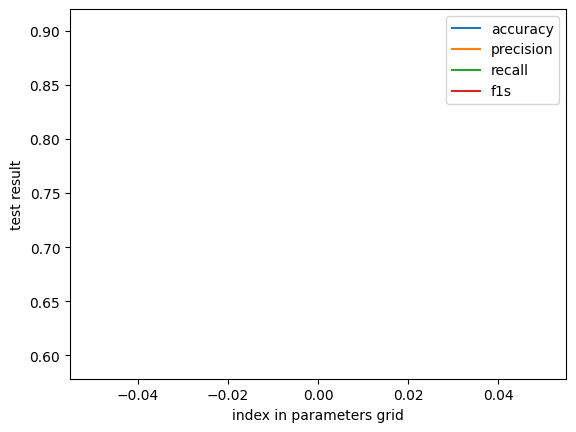

Best Configs: 
{'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (128, 64), 'mlp__solver': 'lbfgs'}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                mlp__activation=param_config["mlp__activation"],
                mlp__hidden_layer_sizes=param_config["mlp__hidden_layer_sizes"],
                mlp__solver=param_config["mlp__solver"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_MLP
model = model_for_MLP

x_train = X_train_scaled_MLP
y_train = y_resampled_S
x_test = X_test_scaled_MLP
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        mlp__activation=param_config["mlp__activation"],
        mlp__hidden_layer_sizes=param_config["mlp__hidden_layer_sizes"],
        mlp__solver=param_config["mlp__solver"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [ ]:
best_config = the_bests[0]

model_for_MLP = model_for_MLP.set_params(
    mlp__activation=best_config["mlp__activation"],
    mlp__hidden_layer_sizes=best_config["mlp__hidden_layer_sizes"],
    mlp__solver=best_config["mlp__solver"]
)

# Refit the model using the training data
model_for_MLP.fit(X_train_scaled_MLP, y_resampled_S)

Pipeline(steps=[('mlp',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(128, 64),
                               solver='lbfgs'))])

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_MLP_model = cross_val_predict(model_for_MLP, X_train_scaled_MLP, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_MLP = confusion_matrix(y_resampled_S, predicted_labels_MLP_model)

# Calculate the full classification report
class_report_MLP = classification_report(y_resampled_S, predicted_labels_MLP_model)

# Calculate accuracy
accuracy_MLP = accuracy_score(y_resampled_S, predicted_labels_MLP_model)

# Calculate precision
precision_MLP = precision_score(y_resampled_S, predicted_labels_MLP_model)

# Calculate recall
recall_MLP = recall_score(y_resampled_S, predicted_labels_MLP_model)

# Calculate F1 score
f1_MLP = f1_score(y_resampled_S, predicted_labels_MLP_model)


# Print the full confusion matrix and classification report
print("MLP Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_MLP)
print("B. Classification Report:")
print(class_report_MLP)
print("C. Accuracy: {:.2f}".format(accuracy_MLP))
print("D. Precision: {:.2f}".format(precision_MLP))
print("E. Recall (Sensitivity): {:.2f}".format(recall_MLP))
print("F. F1 Score: {:.2f}".format(f1_MLP))

MLP Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[162  29]
 [ 26 165]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       191
           1       0.85      0.86      0.86       191

    accuracy                           0.86       382
   macro avg       0.86      0.86      0.86       382
weighted avg       0.86      0.86      0.86       382

C. Accuracy: 0.86
D. Precision: 0.85
E. Recall (Sensitivity): 0.86
F. F1 Score: 0.86


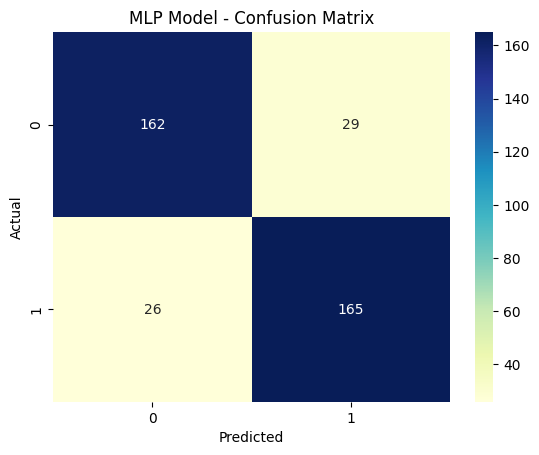

In [ ]:
sns.heatmap(conf_matrix_MLP, annot=True, fmt='d', cmap='YlGnBu')
plt.title('MLP Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train ROC-AUC: 1.0000


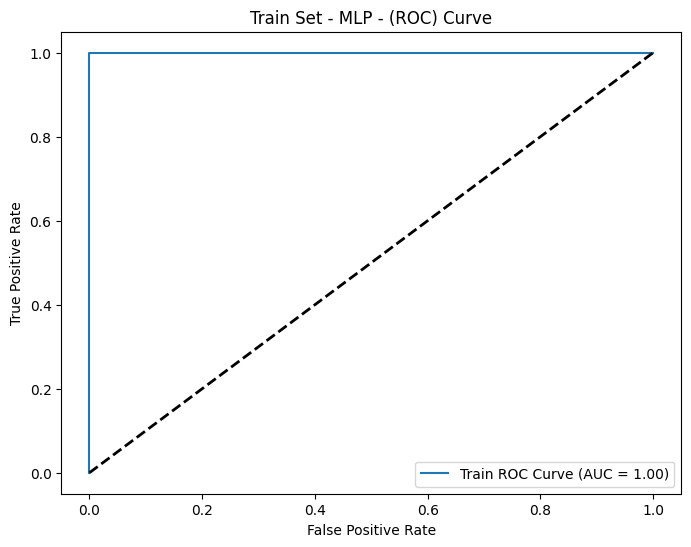

In [ ]:
roc_auc_train_MLP, fpr_MLP, tpr_MLP = draw_roc(model_for_MLP, X_train_scaled_MLP, y_resampled_S, 'Train', 'MLP')

In [ ]:
accuracy_test_MLP, precision_test_MLP, recall_test_MLP, f1_test_MLP = performance_metrics(model_for_MLP, X_test_scaled_MLP, y_test_S, 'Test', 'MLP')

MLP Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.59
Recall (Sensitivity): 0.95
F1 Score: 0.73
Confusion Matrix:
[[79 14]
 [ 1 20]]


Test ROC-AUC: 0.9401


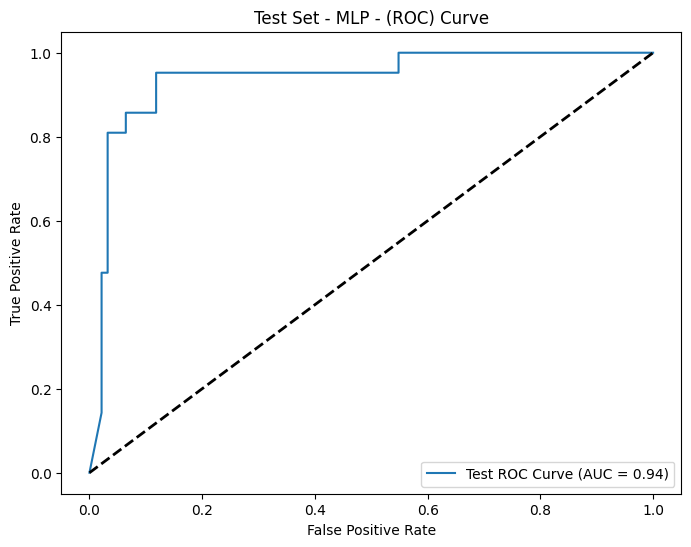

In [ ]:
roc_auc_test_MLP , fpr_test_MLP, tpr_test_MLP = draw_roc(model_for_MLP, X_test_scaled_MLP, y_test_S, 'Test', 'MLP')

In [ ]:
accuracy_ext_MLP, precision_ext_MLP, recall_ext_MLP, f1_ext_MLP = performance_metrics(model_for_MLP, X_ext_scaled_MLP, y_ext, 'External Validation', 'MLP')

MLP Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.89
Precision: 0.61
Recall (Sensitivity): 0.78
F1 Score: 0.68
Confusion Matrix:
[[87  9]
 [ 4 14]]


External Validation ROC-AUC: 0.8634


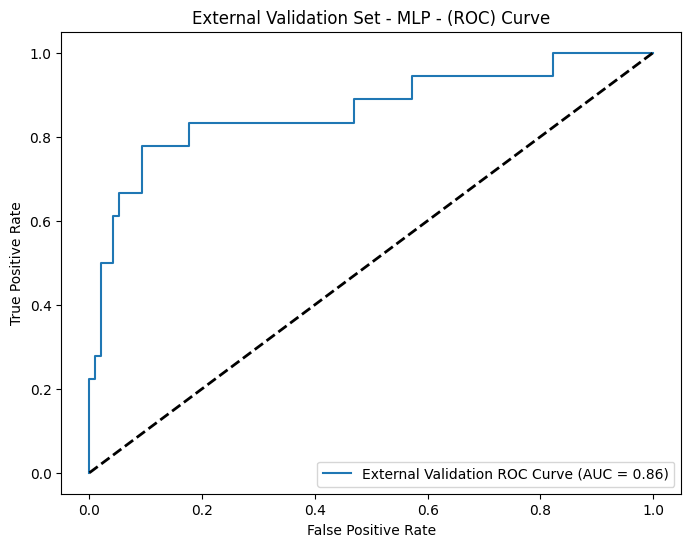

In [ ]:
roc_auc_ext_MLP , fpr_ext_MLP, tpr_ext_MLP = draw_roc(model_for_MLP, X_ext_scaled_MLP, y_ext, 'External Validation', 'MLP')

In [ ]:
# Usefull function in Sensitivity Analysis

import copy
from pandas.core.frame import DataFrame
# for sensitivity analysis
def permute_column(matrix, column_index):
    matrix_copied = copy.deepcopy(matrix)
    if isinstance(matrix_copied, DataFrame):
        np.random.shuffle(matrix_copied[matrix_copied.columns[column_index]])
    else:
        np.random.shuffle(matrix_copied[:,column_index])
    return matrix_copied

def sensitivity_analysis(model, x_test, y_test, features):
    y_test_predicted = model.predict(x_test)
    sensitivity_result = {metric: {} for metric in ["accuracy", "precision", "recall", "f1"]}
    sensitivity_result["accuracy"]["base"] = accuracy_score(y_test, y_test_predicted),
    sensitivity_result["precision"]["base"] = precision_score(y_test, y_test_predicted),
    sensitivity_result["recall"]["base"] = recall_score(y_test, y_test_predicted),
    sensitivity_result["f1"]["base"] = f1_score(y_test, y_test_predicted)

    print(f"baseline of recall: ", sensitivity_result["recall"]["base"])
    print(f"baseline of f1: ", sensitivity_result["f1"]["base"])
    print(f"baseline of precision: ", sensitivity_result["precision"]["base"])
    print(f"baseline of accuracy: ", sensitivity_result["accuracy"]["base"])


    for column_index in range(x_test.shape[1]):
        column = features[column_index]
        sensitivity_result["accuracy"][column] = []
        sensitivity_result["precision"][column] = []
        sensitivity_result["recall"][column] = []
        sensitivity_result["f1"][column] = []
        for _ in range(100):
            x_test_permuted = permute_column(x_test, column_index)
            y_test_permutated_predict = model.predict(x_test_permuted)
            acc = accuracy_score(y_test, y_test_permutated_predict)
            pre = precision_score(y_test, y_test_permutated_predict)
            rec = recall_score(y_test, y_test_permutated_predict)
            f1 = f1_score(y_test, y_test_permutated_predict)
            sensitivity_result["accuracy"][column].append(acc)
            sensitivity_result["precision"][column].append(pre)
            sensitivity_result["recall"][column].append(rec)
            sensitivity_result["f1"][column].append(f1)

        print(f"recall mean of {column}: ", np.mean(sensitivity_result["recall"][column]))
        print(f"f1 mean of {column}: ", np.mean(sensitivity_result["f1"][column]))

        print(f"recall var of {column}: ", np.var(sensitivity_result["recall"][column]))
        print(f"f1 var of {column}: ", np.var(sensitivity_result["f1"][column]))

        print(f"recall std of {column}: ", np.std(sensitivity_result["recall"][column]))
        print(f"f1 std of {column}: ", np.std(sensitivity_result["f1"][column]))

    return sensitivity_result

# recall | f1score
# accuracy | precision
def draw_sensitivity_result(sensitivity_result):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    draw(sensitivity_result, "recall", axs[0])
    draw(sensitivity_result, "f1", axs[1])
    fig.savefig('result.jpg', dpi=plt.gcf().dpi, bbox_inches = 'tight')

def draw(sensitivity_result, metric, ax):
    plt.figure()
    baseline = sensitivity_result[metric]["base"]
    del sensitivity_result[metric]["base"]
    _data = pd.DataFrame.from_dict(sensitivity_result[metric])
    # color = [
    #     (201/255, 203/255, 163/255),
    #     (255/255, 225/255, 168/255),
    #     (226/255, 109/255, 92/255),
    #     (114/255, 61/255, 70/255),
    #     (71/255, 45/255, 48/255),
    #     ]
    color = [
        (63/255, 13/255, 18/255),
        (167/255, 29/255, 49/255),
        (241/255, 240/255, 204/255),
        (213/255, 191/255, 134/255),
        (141/255, 119/255, 95/255),
    ]
    # color = [
    #     (66/255, 62/255, 55/255),
    #     (227/255, 178/255, 60/255),
    #     (237/255, 235/255, 215/255),
    #     (163/255, 149/255, 148/255),
    #     (110/255, 103/255, 95/255),
    # ]
    sns.barplot(data=_data, palette = color, ax=ax, width=0.5)
    ax.margins(x=0.1)
    ax.axhline(baseline, color='grey', linestyle='--', linewidth=2)
    ax.set_ylim([0,1])
    ax.set_xlabel('Permutated Columns')
    ylabel = metric[0].upper() + metric[1:]
    ax.set_ylabel(ylabel)
    ax.set_xticklabels([
        'Daily\nSmokers Rate',
        'Log\nMedian Age',
        'Visible\nMinority Rate',
        'Active\nTransportation',
        'Active\nPopulation Rate',
        'Overweight',
        'Obese',
        'Mental\nHealth Score',
        'Work\nStress Score'
      ], rotation=75
    )

    ax.grid(axis='y', linewidth=.3)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()


In [ ]:
# Sensitivity Analysis
MLP_features_short = [
    'Rate of Daily Smokers',
    'Median Age',
    'Visible Minority Rate',
    'Active transportation',
    'Rate of Active population',
    'Overweight',
    'Obese',

    # Newly Added
    'Mental Health Score',
    'Work Stress Score'
]

result = sensitivity_analysis(
    model_for_MLP,
    X_test_scaled_MLP,
    y_test_S,
    MLP_features_short)
draw_sensitivity_result(result)

In [ ]:
# record the best model
# todo in the other round 2nd_mhs_wss_toronto_cma_mlp
best_model_name = "toronto_cma_mlp.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(model_for_MLP, file)

**4.3 SVM Model**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# after many runs, we concluded the most important features are as below:

LR_features = [
    'remainder__Active transportation', # from toronto only
    'remainder__Rate of Active population', # in toronto CMA
    'remainder__Overweight',
    'remainder__Obese',
    'remainder__log_median_age',

    # newly added
    # seperate study ...
    'remainder__Work Stress Score',
    'remainder__Mental Health Score',
]
# selected_LR_features.tolist()

In [ ]:
# since it is not applicable to apply REFCV to SVC, we decided to continue with the s
# selected columns extracted in the Logistic Regression Step.

# Initialize the StandardScaler
scaler = StandardScaler()

# X_S = DataSimple.drop('Diabetes', axis=1)
# y_S = DataSimple['Diabetes']

# # Split the data into training and test sets
# X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# # Under samling the training data to address imbalance classification issue
# rus = RandomUnderSampler()
# X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


# ct = ColumnTransformer(
#     transformers=[
#         ('one_hot_encoder', OneHotEncoder(), categorical_columns),
#     ],
#     remainder='passthrough'
# )

# # Applying the one-hot encoding transformation to X_resampled and X_test
# X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
# X_test_S = ct.transform(X_test_S)

# #converting numpyarray back to DataFrame
# X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
# X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())
#Fitting the data
scaler = StandardScaler()
X_train_scaled_SVM = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_SVM = scaler.transform(X_test_S[LR_features])
X_ext_scaled_SVM = scaler.transform(X_ext_S[LR_features])

In [ ]:
# !pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
# SHAP analysis
import pickle
import shap

features = [
    'Active Transportation', # from toronto only
    'Active Population Rate', # in toronto CMA
    'Overweight',
    'Obese',
    'Log Median Age',
    'Work Stress Score',
    'Mental Health Score',
]

LR_features = [
    'remainder__Active transportation', # from toronto only
    'remainder__Rate of Active population', # in toronto CMA
    'remainder__Overweight',
    'remainder__Obese',
    'remainder__log_median_age',

    # newly added
    # seperate study ...
    'remainder__Work Stress Score',
    'remainder__Mental Health Score',
]

path = os.path.join(os.getcwd(), "2nd_mhs_wss_toronto_cma_svm.pkl")
# load the model
loaded_model = pickle.load(open(path, 'rb'))

X_resampled_S = pd.read_csv("x_train.csv")
X_test_S = pd.read_csv("x_test.csv")
X_ext_S = pd.read_csv("x_ext.csv")

y_resampled_S = pd.read_csv("y_train.csv")
y_test_S = pd.read_csv("y_test.csv")
y_ext_S = pd.read_csv("y_ext.csv")

#Fitting the data
scaler = StandardScaler()
X_train_scaled_SVM = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_SVM = scaler.transform(X_test_S[LR_features])
X_ext_scaled_SVM = scaler.transform(X_ext_S[LR_features])

X_train = X_train_scaled_SVM
X_test = X_test_scaled_SVM
X_ext = X_ext_scaled_SVM

In [ ]:
explainer = shap.KernelExplainer(loaded_model.predict, X_train)
explainer.feature_names = features
shap_values = explainer.shap_values(X_ext)
shap.initjs()

  0%|          | 0/114 [00:00<?, ?it/s]

In [ ]:
import random
index = random.randint(0, len(shap_values) - 1)

# shap.waterfall_plot(
#     shap.Explanation(
#         values=shap_values[index],
#         base_values=explainer.expected_value,
#         data=X_test[index],
#         feature_names=features),
#     max_display=10)
# plt.show()

# Beeswarm Plot:
shap.summary_plot(shap_values, X_ext, feature_names=features, show=False)
plt.savefig('svm_extended_external_train_beeswarm.png', dpi=1200)
plt.close()

plt.figure()
# Mean SHAP Plot:
shap.summary_plot(shap_values, X_ext, plot_type="bar", feature_names=features, show=False)
plt.savefig('svm_extended_external_train_mean_shap.png', dpi=1200)
plt.close()

-6
-5
-4
-3
-2
-1
0
1


[None, None, None, None, None, None, None, None]

In [ ]:
# Initialize an SVM classifier
SVM = SVC(class_weight=None, probability=True)


# Creating a pipeline that applies the Decision Tree classifier
model_for_SVM = Pipeline([
    ('svm', SVM)
])

# Fitting the model on the training data
model_for_SVM.fit(X_train_scaled_SVM, y_resampled_S)

# Define a dictionary of hyperparameter values to search over.
param_dist_SVM = {
    'svm__C': [10**(i) for i in range(-3,4)],
    'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'svm__gamma': [10**(i) for i in range(-6,2)],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_SVM = GridSearchCV(
    model_for_SVM, param_grid=param_dist_SVM, cv=skf)

# Train Grid Search on the training data
random_search_SVM.fit(X_train_scaled_SVM, y_resampled_S)

# Extract results into a DataFrame
results_SVM = pd.DataFrame(random_search_SVM.cv_results_)

# Display the set of parameters that achieved the best score
results_SVM[results_SVM['rank_test_score'] == 1]
random_search_SVM.best_params_

{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}

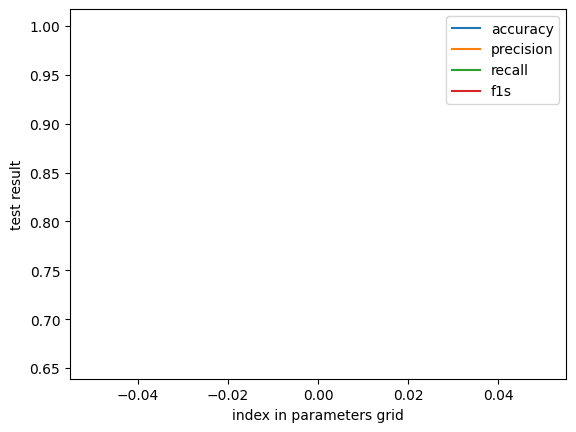

Best Configs: 
{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                svm__C=param_config["svm__C"],
                svm__gamma=param_config["svm__gamma"],
                svm__kernel=param_config["svm__kernel"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_SVM
model = model_for_SVM

x_train = X_train_scaled_SVM
y_train = y_resampled_S
x_test = X_test_scaled_SVM
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        svm__C=param_config["svm__C"],
        svm__gamma=param_config["svm__gamma"],
        svm__kernel=param_config["svm__kernel"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

**4.3.1 Hyperparametre tunning for SVM**

In [ ]:
best_config = the_bests[0]

model_for_SVM = model_for_SVM.set_params(
    svm__C=best_config["svm__C"],
    svm__gamma=best_config["svm__gamma"],
    svm__kernel=best_config["svm__kernel"],
)
# Refit the model using the training data
model_for_SVM.fit(X_train_scaled_SVM, y_resampled_S)

# import pickle
# import os

# path = os.path.join(os.getcwd(), "toronto_cma_svm.pkl")
# # load the model
# model_for_SVM = pickle.load(open(path, 'rb'))

Pipeline(steps=[('svm', SVC(C=10, gamma=0.1, probability=True))])

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_SVM_model = cross_val_predict(model_for_SVM, X_train_scaled_SVM, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_SVM = confusion_matrix(y_resampled_S, predicted_labels_SVM_model)

# Calculate the full classification report
class_report_SVM = classification_report(y_resampled_S, predicted_labels_SVM_model)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate precision
precision_SVM = precision_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate recall
recall_SVM = recall_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate F1 score
f1_SVM = f1_score(y_resampled_S, predicted_labels_SVM_model)


# Print the full confusion matrix and classification report
print("SVM Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_SVM)
print("B. Classification Report:")
print(class_report_SVM)
print("C. Accuracy: {:.2f}".format(accuracy_SVM))
print("D. Precision: {:.2f}".format(precision_SVM))
print("E. Recall (Sensitivity): {:.2f}".format(recall_SVM))
print("F. F1 Score: {:.2f}".format(f1_SVM))


SVM Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[157  34]
 [ 24 167]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       191
           1       0.83      0.87      0.85       191

    accuracy                           0.85       382
   macro avg       0.85      0.85      0.85       382
weighted avg       0.85      0.85      0.85       382

C. Accuracy: 0.85
D. Precision: 0.83
E. Recall (Sensitivity): 0.87
F. F1 Score: 0.85


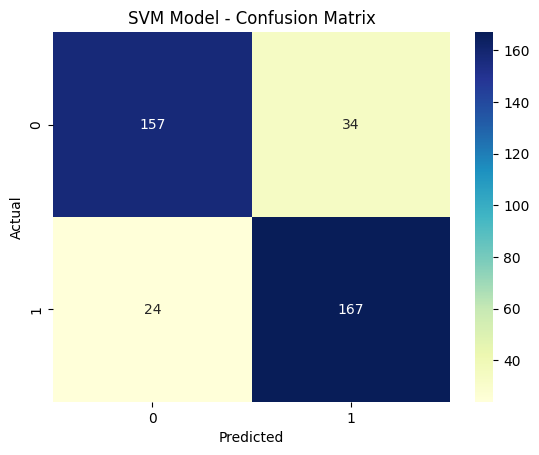

In [ ]:
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='YlGnBu')
plt.title('SVM Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Train ROC-AUC: 0.9883


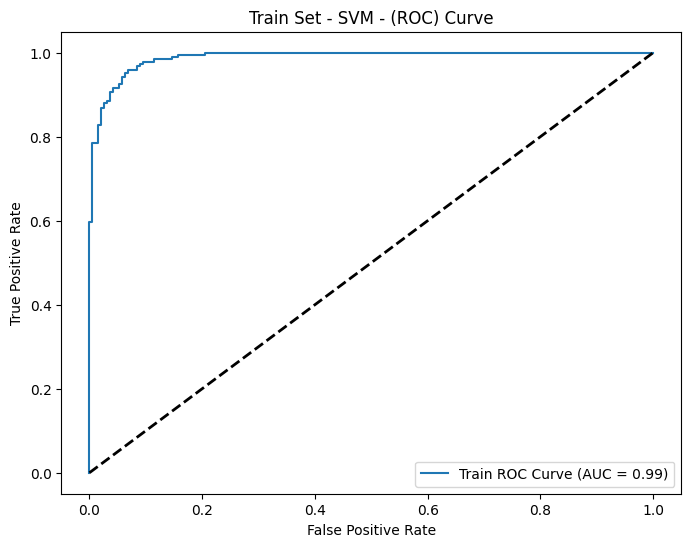

In [ ]:
roc_auc_train_SVM, fpr_SVM, tpr_SVM = draw_roc(model_for_SVM, X_train_scaled_SVM, y_resampled_S, 'Train', 'SVM')

In [ ]:
accuracy_test_SVM, precision_test_SVM, recall_test_SVM, f1_test_SVM = performance_metrics(model_for_SVM, X_test_scaled_SVM, y_test_S, 'Test', 'SVM')

SVM Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.90
Precision: 0.66
Recall (Sensitivity): 1.00
F1 Score: 0.79
Confusion Matrix:
[[82 11]
 [ 0 21]]


Test ROC-AUC: 0.9693


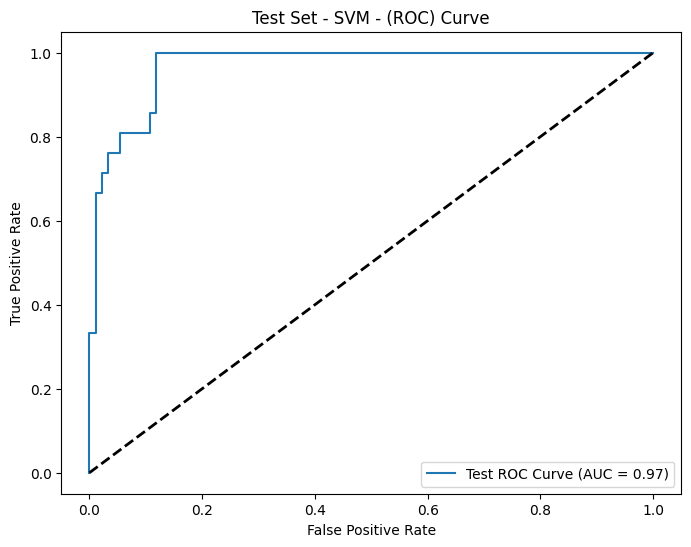

In [ ]:
roc_auc_test_SVM, fpr_test_SVM, tpr_test_SVM = draw_roc(model_for_SVM, X_test_scaled_SVM, y_test_S, 'Test', 'SVM')

In [ ]:
accuracy_ext_SVM, precision_ext_SVM, recall_ext_SVM, f1_ext_SVM = performance_metrics(model_for_SVM, X_ext_scaled_SVM, y_ext, 'External Validation', 'SVM')

SVM Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.82
Precision: 0.47
Recall (Sensitivity): 0.89
F1 Score: 0.62
Confusion Matrix:
[[78 18]
 [ 2 16]]


External Validation ROC-AUC: 0.9589


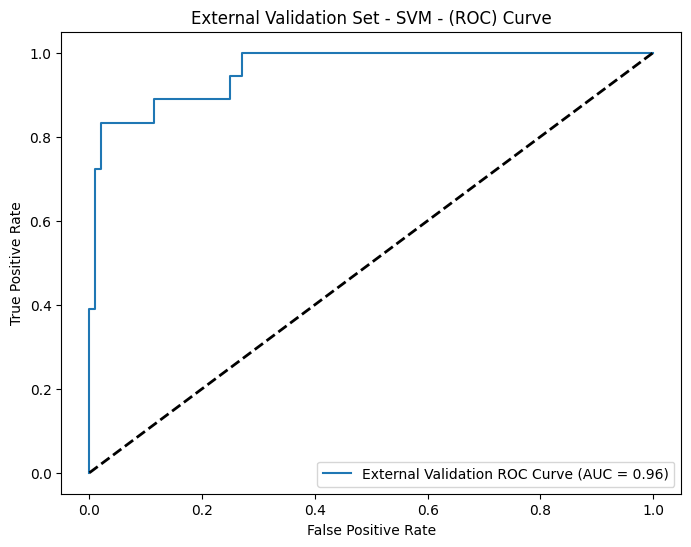

In [ ]:
roc_auc_ext_SVM, fpr_ext_SVM, tpr_ext_SVM = draw_roc(model_for_SVM, X_ext_scaled_SVM, y_ext, 'External Validation', 'SVM')

In [ ]:
# load the exported SVM model
import pandas as pd
import pickle
import os

LR_features = [
    'remainder__Active transportation', # from toronto only
    'remainder__Rate of Active population', # in toronto CMA
    'remainder__Overweight',
    'remainder__Obese',
    'remainder__log_median_age',

    # newly added
    # seperate study ...
    'remainder__Work Stress Score',
    'remainder__Mental Health Score',
]

path = os.path.join(os.getcwd(), "2nd_mhs_wss_toronto_cma_svm.pkl")
# load the model
model_for_SVM = pickle.load(open(path, 'rb'))

X_resampled_S = pd.read_csv("x_train.csv")
X_test_S = pd.read_csv("x_test.csv")
X_ext_S = pd.read_csv("x_ext.csv")

y_resampled_S = pd.read_csv("y_train.csv")
y_test_S = pd.read_csv("y_test.csv")
y_ext_S = pd.read_csv("y_ext.csv")

#Fitting the data
scaler = StandardScaler()
X_train_scaled_SVM = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_SVM = scaler.transform(X_test_S[LR_features])
X_ext_scaled_SVM = scaler.transform(X_ext_S[LR_features])

Unnamed: 0  Diabetes
0         333         1
1         510         0
2         695         1
3         164         0
4         596         0

In [ ]:
# Usefull function in Sensitivity Analysis

import copy
from pandas.core.frame import DataFrame
# for sensitivity analysis
def permute_column(matrix, column_index):
    matrix_copied = copy.deepcopy(matrix)
    if isinstance(matrix_copied, DataFrame):
        np.random.shuffle(matrix_copied[matrix_copied.columns[column_index]])
    else:
        np.random.shuffle(matrix_copied[:,column_index])
    return matrix_copied

def sensitivity_analysis(model, x_test, y_test, features):
    y_test_predicted = model.predict(x_test)
    sensitivity_result = {metric: {} for metric in ["accuracy", "precision", "recall", "f1"]}
    sensitivity_result["accuracy"]["base"] = accuracy_score(y_test, y_test_predicted),
    sensitivity_result["precision"]["base"] = precision_score(y_test, y_test_predicted),
    sensitivity_result["recall"]["base"] = recall_score(y_test, y_test_predicted),
    sensitivity_result["f1"]["base"] = f1_score(y_test, y_test_predicted)

    # print(f"baseline of recall: ", sensitivity_result["recall"]["base"])
    # print(f"baseline of f1: ", sensitivity_result["f1"]["base"])

    for column_index in range(x_test.shape[1]):
        column = features[column_index]
        sensitivity_result["accuracy"][column] = []
        sensitivity_result["precision"][column] = []
        sensitivity_result["recall"][column] = []
        sensitivity_result["f1"][column] = []
        for _ in range(100):
            x_test_permuted = permute_column(x_test, column_index)
            y_test_permutated_predict = model.predict(x_test_permuted)
            acc = accuracy_score(y_test, y_test_permutated_predict)
            pre = precision_score(y_test, y_test_permutated_predict)
            rec = recall_score(y_test, y_test_permutated_predict)
            f1 = f1_score(y_test, y_test_permutated_predict)
            sensitivity_result["accuracy"][column].append(acc)
            sensitivity_result["precision"][column].append(pre)
            sensitivity_result["recall"][column].append(rec)
            sensitivity_result["f1"][column].append(f1)

        # print(f"recall mean of {column}: ", np.mean(sensitivity_result["recall"][column]))
        # print(f"f1 mean of {column}: ", np.mean(sensitivity_result["f1"][column]))

        # print(f"recall var of {column}: ", np.var(sensitivity_result["recall"][column]))
        # print(f"f1 var of {column}: ", np.var(sensitivity_result["f1"][column]))

        # print(f"recall std of {column}: ", np.std(sensitivity_result["recall"][column]))
        # print(f"f1 std of {column}: ", np.std(sensitivity_result["f1"][column]))

    return sensitivity_result

# recall | f1score
# accuracy | precision
def draw_sensitivity_result(sensitivity_result, dataset_name):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    draw(sensitivity_result, "recall", axs[0])
    draw(sensitivity_result, "f1", axs[1])
    fig.savefig(f'svm_extended_sensitivity_{dataset_name}.jpg', dpi=1200, bbox_inches = 'tight')

def draw(sensitivity_result, metric, ax):
    plt.figure()
    baseline = sensitivity_result[metric]["base"]
    del sensitivity_result[metric]["base"]
    _data = pd.DataFrame.from_dict(sensitivity_result[metric])
    color = [
        (63/255, 13/255, 18/255),
        (167/255, 29/255, 49/255),
        (241/255, 240/255, 204/255),
        (213/255, 191/255, 134/255),
        (141/255, 119/255, 95/255),
        (132/255, 87/255, 124/255),
        (255/255, 220/255, 160/255),
    ]
    sns.barplot(data=_data, palette = color, ax=ax) #, width=0.5)
    ax.margins(x=0.1)
    ax.axhline(baseline, color='grey', linestyle='--', linewidth=2)
    ax.set_ylim([0,1])
    ax.set_xlabel('Permutated Columns')
    ylabel = metric[0].upper() + metric[1:]
    ax.set_ylabel(ylabel)
    ax.set_xticklabels([
        'Active\nTransportation', # from toronto only
        'Active\nPopulation Rate', # in toronto CMA
        'Overweight',
        'Obese',
        'Log\nMedian Age',
        'Work Stress Score',
        'Mental Health Score',
        ], rotation=45
        )
    ax.grid(axis='y', linewidth=.3)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()

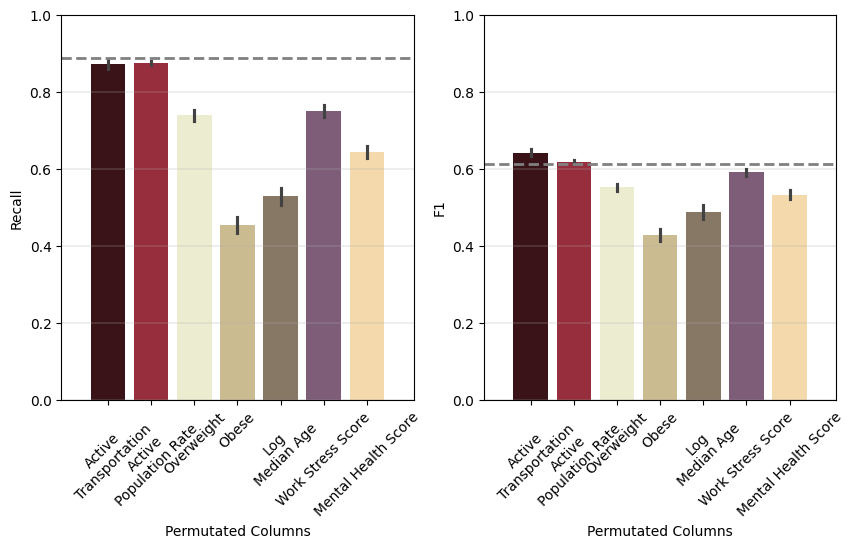

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sensitivity Analysis
SVM_features_short = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age',
    'Work Stress Score',
    'Mental Health Score',
]
result = sensitivity_analysis(
    model_for_SVM,
    X_ext_scaled_SVM,
    y_ext_S['Diabetes'],
    SVM_features_short)
draw_sensitivity_result(result,'external')

In [ ]:
# record the best model
# in the other round: "2nd_mhs_wss_toronto_cma_svm.pkl"
best_model_name = "2nd_mhs_wss_toronto_cma_svm.pkl" #"toronto_cma_svm.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(model_for_SVM, file)

**Section 5: Data Preperation for Ensemble models**

In [ ]:
# Specify binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Mental Health Binary']
data[binary_columns] = data[binary_columns].astype(int)

Label_column = ['Diabetes']
data[Label_column] = data[Label_column].astype(int)

# Specify categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
data[categorical_columns] = data[categorical_columns].astype('category')

# Specify the rest as floats
float_columns = [col for col in data.columns if col not in binary_columns + categorical_columns + Label_column]
data[float_columns] = data[float_columns].astype(float)


#### External Set Extraction
X_ext = data.loc[ext_cma_indexes]
y_ext = X_ext['Diabetes']
X_ext = X_ext.drop('Diabetes', axis=1)

# exclude external validation set from the whole
data = data.loc[~data.index.isin(ext_cma_indexes)]
_test_size = len(ext_cma_indexes)/len(data)
print("Test dataset percentage: ", _test_size * 100)
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=_test_size, random_state=42)

# Under samling the training data to address imbalance classification issue
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled = ct.fit_transform(X_resampled, y_resampled)
X_test = ct.transform(X_test)
X_ext = ct.transform(X_ext)

#converting numpyarray back to DataFrame
X_resampled= pd.DataFrame(X_resampled, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ct.get_feature_names_out())
X_ext = pd.DataFrame(X_ext, columns=ct.get_feature_names_out())

Test dataset percentage:  11.014492753623188


**Section 6. Creating ensemble models**



**6.1 Decision Tress**

In [ ]:
#setting custom scorer
accuracy_scoring = make_scorer(accuracy_score)

DT_model = DecisionTreeClassifier()

cv_DT = StratifiedKFold(5)
rfecv_DT = RFECV(
    estimator=DT_model,
    step=1,
    cv=cv_DT,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_DT.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -DT: {rfecv_DT.n_features_}")

Optimal number of features -DT: 4


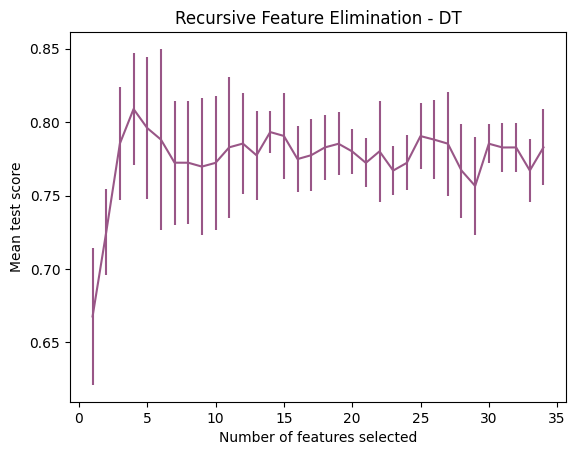

In [ ]:
# Calculate the number of different feature selections tested
n_scores_DT = len(rfecv_DT.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_DT + 1),
    rfecv_DT.cv_results_["mean_test_score"],
    yerr=rfecv_DT.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - DT")

# Show the plot
plt.show()


In [ ]:
selected_DT_features = X_resampled.columns[rfecv_DT.support_]

print("Selected Features for DT:")
print(selected_DT_features)

Selected Features for DT:
Index(['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Visible Minority Rate', 'remainder__Obese'],
      dtype='object')


In [ ]:
# Accessing the mean test scores
mean_test_scores_DT = rfecv_DT.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_DT in enumerate(mean_test_scores_DT):
    DT_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {DT_selected_features}, Mean Test Score: {score_DT}")


Number of Selected Features: 1, Mean Test Score: 0.6677033492822966
Number of Selected Features: 2, Mean Test Score: 0.725187969924812
Number of Selected Features: 3, Mean Test Score: 0.785475051264525
Number of Selected Features: 4, Mean Test Score: 0.8089542036910459
Number of Selected Features: 5, Mean Test Score: 0.7960013670539987
Number of Selected Features: 6, Mean Test Score: 0.788174982911825
Number of Selected Features: 7, Mean Test Score: 0.7724196855775805
Number of Selected Features: 8, Mean Test Score: 0.7723855092276144
Number of Selected Features: 9, Mean Test Score: 0.7697539302802461
Number of Selected Features: 10, Mean Test Score: 0.7723171565276828
Number of Selected Features: 11, Mean Test Score: 0.7828776486671224
Number of Selected Features: 12, Mean Test Score: 0.7854408749145592
Number of Selected Features: 13, Mean Test Score: 0.7774436090225565
Number of Selected Features: 14, Mean Test Score: 0.7932672590567329
Number of Selected Features: 15, Mean Test Sco

In [ ]:
#setting parametres
rfe_DT = RFE(DT_model, n_features_to_select=4)
rfe_DT.fit(X_resampled, y_resampled)

#extracting features
most_important_features_DT = X_resampled.columns[rfe_DT.support_]

In [ ]:
most_important_features_DT

Index(['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Work Stress Score', 'remainder__Obese'],
      dtype='object')

In [ ]:
DT_features = [
    'remainder__Median Age',
    'remainder__Visible Minority Rate',
    'remainder__Overweight',
    'remainder__Obese'
]

In [ ]:
#fitting data
X_DT_train = X_resampled[DT_features]
X_DT_test = X_test[DT_features]
X_DT_ext = X_ext[DT_features]

In [ ]:
# Initializing a Decision Tree classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
dt = DecisionTreeClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Decision Tree classifier
model_for_dt = Pipeline([
    ('DT', dt)
])

# Fitting the model on the training data
model_for_dt.fit(X_DT_train, y_resampled)

Pipeline(steps=[('DT', DecisionTreeClassifier(criterion='entropy'))])

**6.1.1 Hyperparametre tunning for Decision Trees**

In [ ]:
# Define the hyperparameter values that should be tested
param_dist_DT = {
    "DT__max_depth" : [3, 5, 7, 10, 15, 20],
    "DT__min_samples_leaf" : [3, 5, 7, 10, 15, 20],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_DT = GridSearchCV(
    model_for_dt, param_grid=param_dist_DT, cv=skf)

# Train Grid Search on the training data
random_search_DT.fit(X_DT_train, y_resampled)

# Extract results into a DataFrame
results_DT = pd.DataFrame(random_search_DT.cv_results_)

# Display the set of parameters that achieved the best score
results_DT[results_DT['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search
random_search_DT.best_params_

{'DT__max_depth': 15,
 'DT__max_features': 'log2',
 'DT__min_samples_leaf': 15,
 'DT__splitter': 'best'}

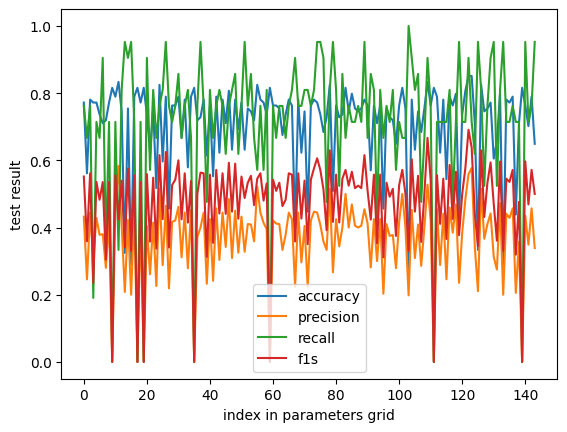

Best Configs: 
{'DT__max_depth': 20, 'DT__max_features': 'sqrt', 'DT__min_samples_leaf': 5, 'DT__splitter': 'best'}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                DT__max_depth=param_config["DT__max_depth"],
                DT__max_features=param_config["DT__max_features"],
                DT__min_samples_leaf=param_config["DT__min_samples_leaf"],
                DT__splitter=param_config["DT__splitter"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_DT
model = model_for_dt

x_train = X_DT_train
y_train = y_resampled
x_test = X_DT_test
y_test = y_test

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        DT__max_depth=param_config["DT__max_depth"],
        DT__max_features=param_config["DT__max_features"],
        DT__min_samples_leaf=param_config["DT__min_samples_leaf"],
        DT__splitter=param_config["DT__splitter"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
best_config = the_bests[0]
model_for_dt = model_for_dt.set_params(
    DT__max_depth=best_config["DT__max_depth"],
    DT__max_features=best_config["DT__max_features"],
    DT__min_samples_leaf=best_config["DT__min_samples_leaf"],
    DT__splitter=best_config["DT__splitter"],
)
# Refit the model using the training data
model_for_dt = model_for_dt.fit(X_DT_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_DT_model = cross_val_predict(model_for_dt, X_DT_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_DT = confusion_matrix(y_resampled, predicted_labels_DT_model)

# Calculate the full classification report
class_report_DT = classification_report(y_resampled, predicted_labels_DT_model)

# Calculate accuracy
accuracy_DT = accuracy_score(y_resampled, predicted_labels_DT_model)

# Calculate precision
precision_DT = precision_score(y_resampled, predicted_labels_DT_model)

# Calculate recall
recall_DT = recall_score(y_resampled, predicted_labels_DT_model)

# Calculate F1 score
f1_DT = f1_score(y_resampled, predicted_labels_DT_model)


# Print the full confusion matrix and classification report
print("DT Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_DT)
print("B. Classification Report:")
print(class_report_DT)
print("C. Accuracy: {:.2f}".format(accuracy_DT))
print("D. Precision: {:.2f}".format(precision_DT))
print("E. Recall (Sensitivity): {:.2f}".format(recall_DT))
print("F. F1 Score: {:.2f}".format(f1_DT))



DT Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[155  36]
 [ 50 141]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       191
           1       0.80      0.74      0.77       191

    accuracy                           0.77       382
   macro avg       0.78      0.77      0.77       382
weighted avg       0.78      0.77      0.77       382

C. Accuracy: 0.77
D. Precision: 0.80
E. Recall (Sensitivity): 0.74
F. F1 Score: 0.77


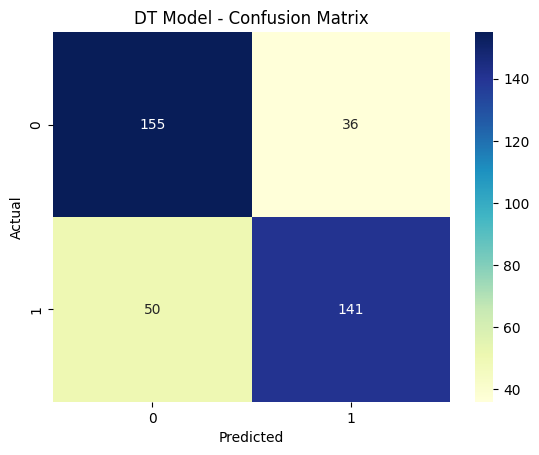

In [ ]:
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='YlGnBu')
plt.title('DT Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train ROC-AUC: 0.9716


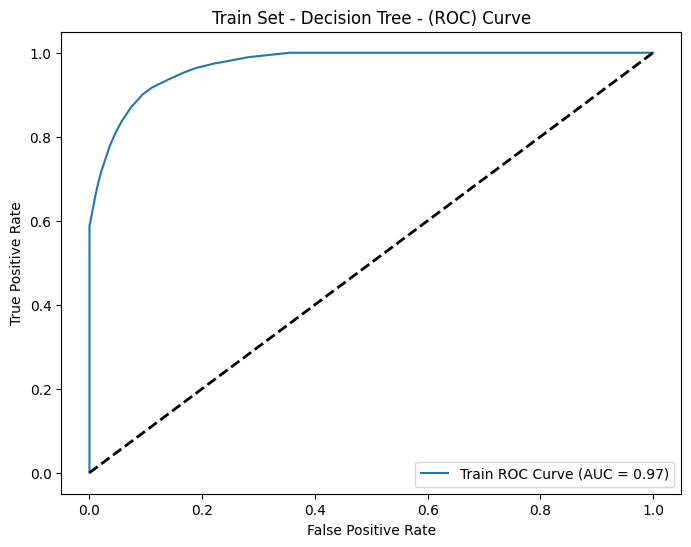

In [ ]:
roc_auc_train_DT, fpr_DT, tpr_DT = draw_roc(model_for_dt, X_DT_train, y_resampled, 'Train', 'Decision Tree')

In [ ]:
accuracy_test_DT, precision_test_DT, recall_test_DT, f1_test_DT = performance_metrics(model_for_dt, X_DT_test, y_test, 'Test', 'Decision Tree')

Decision Tree Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.79
Precision: 0.45
Recall (Sensitivity): 0.62
F1 Score: 0.52
Confusion Matrix:
[[77 16]
 [ 8 13]]


Test ROC-AUC: 0.8433


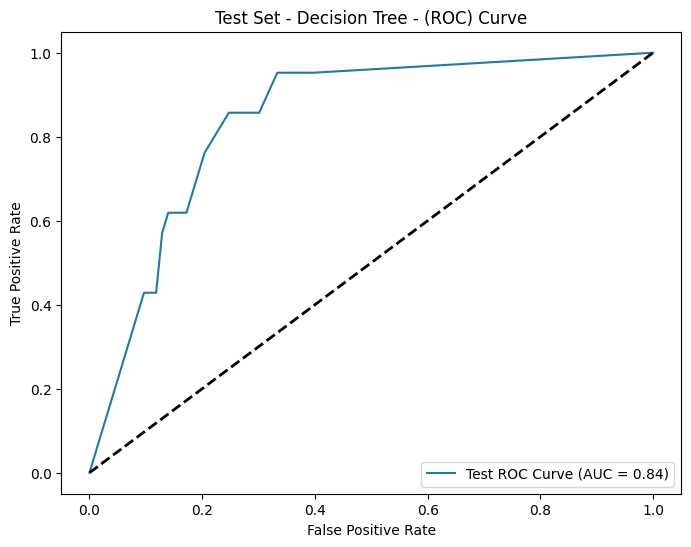

In [ ]:
roc_auc_test_DT, fpr_test_DT, tpr_test_DT = draw_roc(model_for_dt, X_DT_test, y_test, 'Test', 'Decision Tree')

In [ ]:
accuracy_ext_DT, precision_ext_DT, recall_ext_DT, f1_ext_DT = performance_metrics(model_for_dt, X_DT_ext, y_ext, 'External Validation', 'Decision Tree')

Decision Tree Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.83
Precision: 0.48
Recall (Sensitivity): 0.83
F1 Score: 0.61
Confusion Matrix:
[[80 16]
 [ 3 15]]


External Validation ROC-AUC: 0.8597


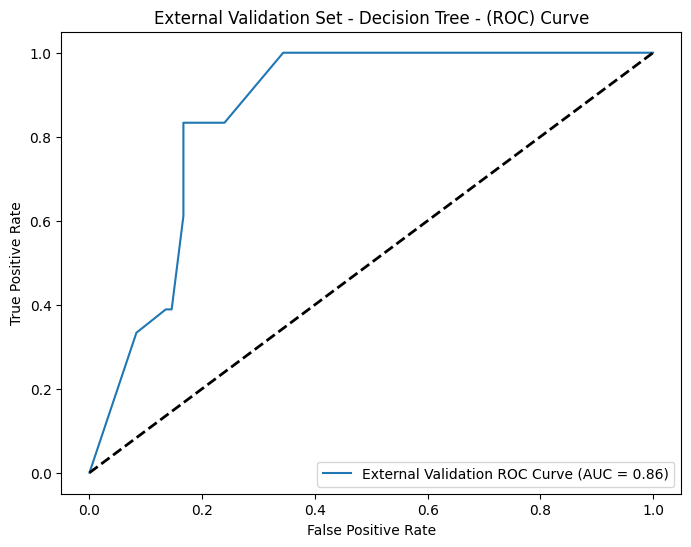

In [ ]:
roc_auc_ext_DT, fpr_ext_DT, tpr_ext_DT = draw_roc(model_for_dt, X_DT_ext, y_ext, 'External Validation', 'Decision Tree')

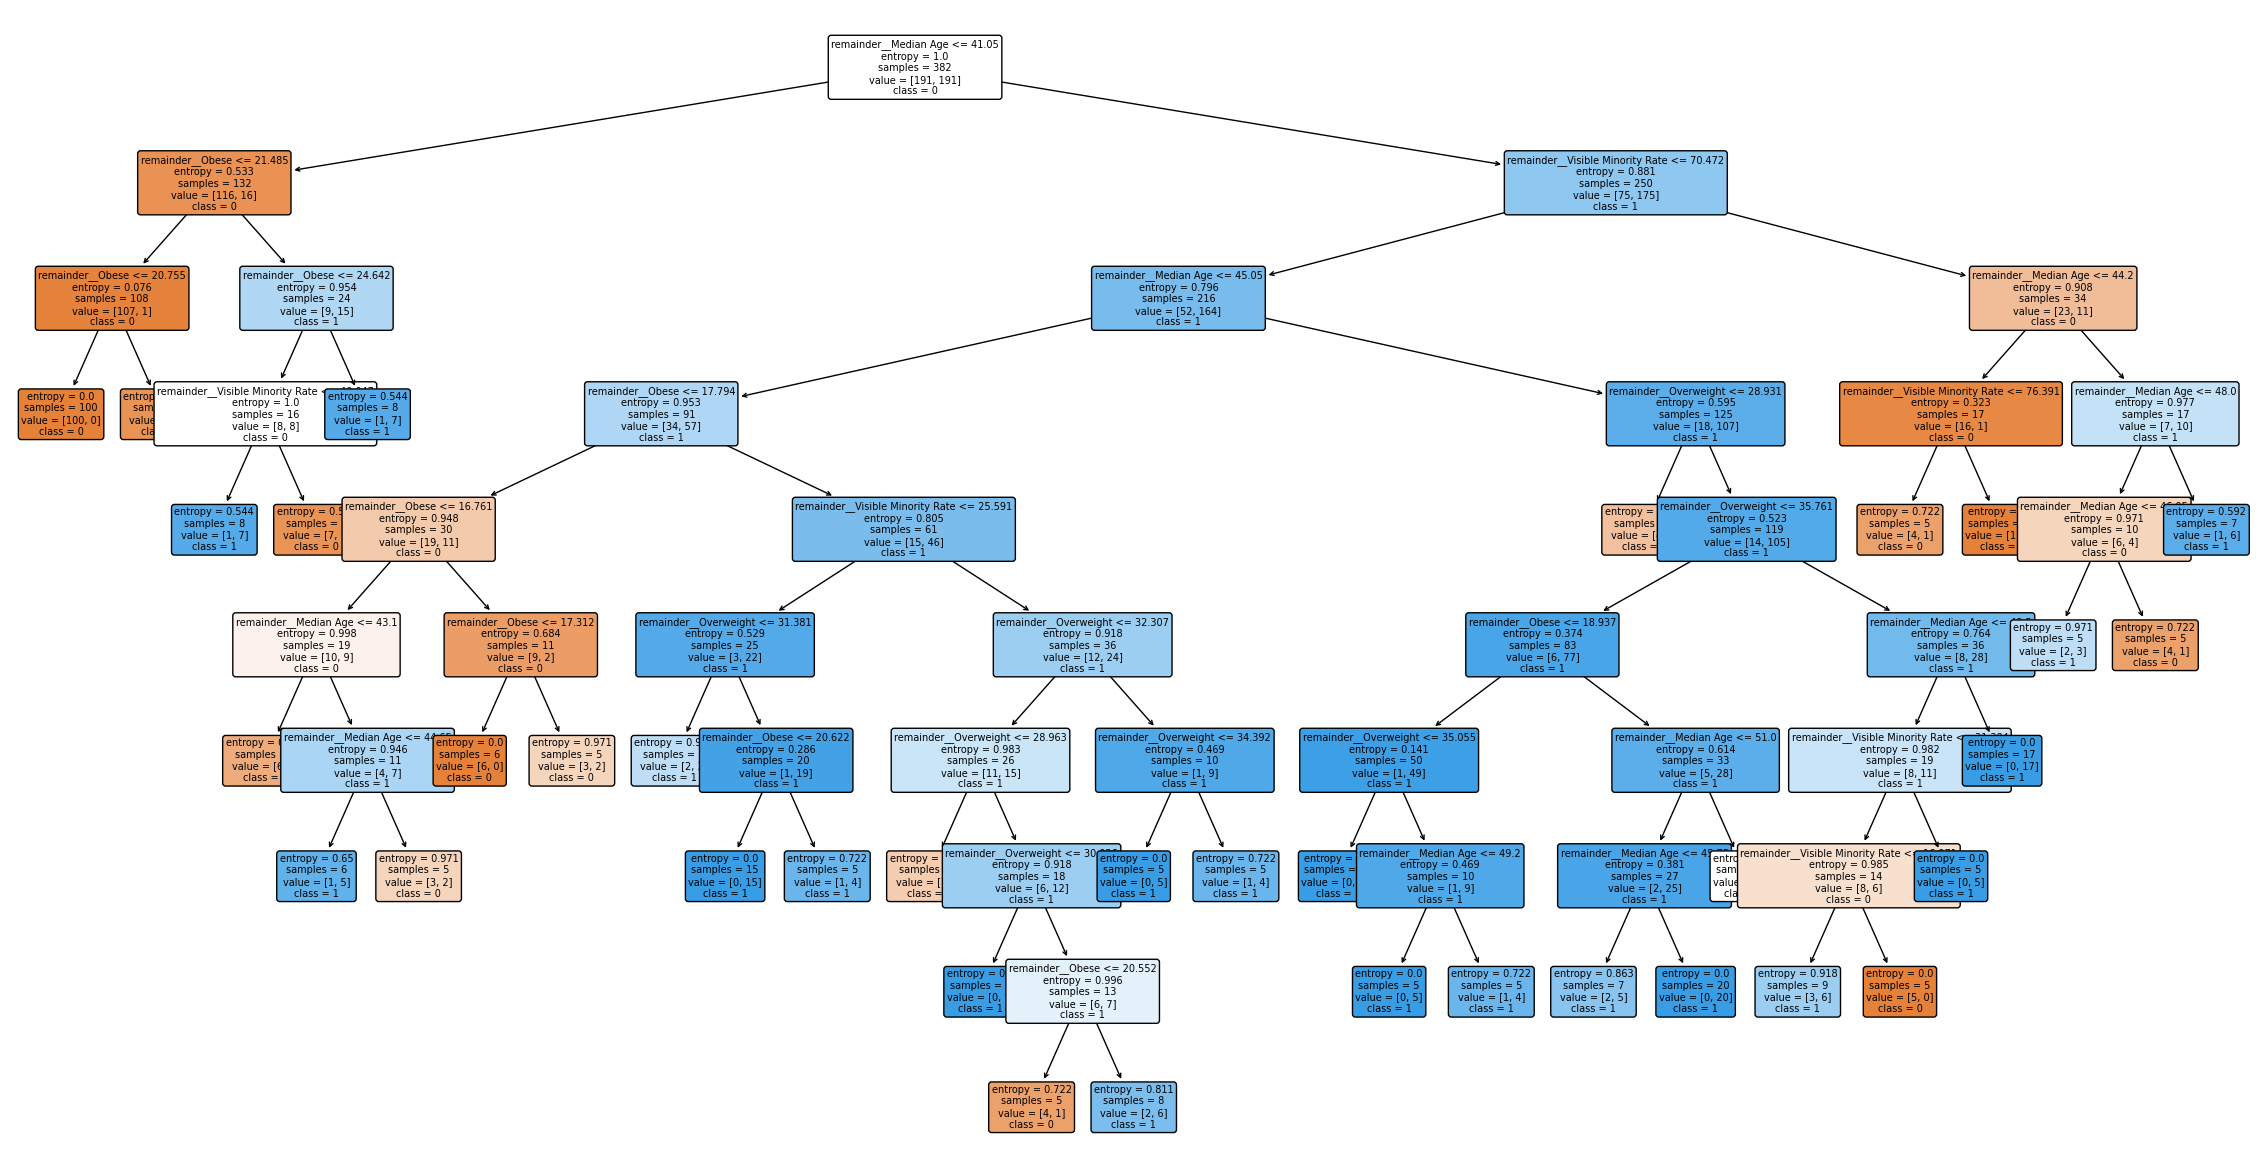

In [ ]:
plt.figure(figsize=(29, 15))
plot_tree(model_for_dt.named_steps['DT'], feature_names=X_DT_train.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=7)
plt.show()

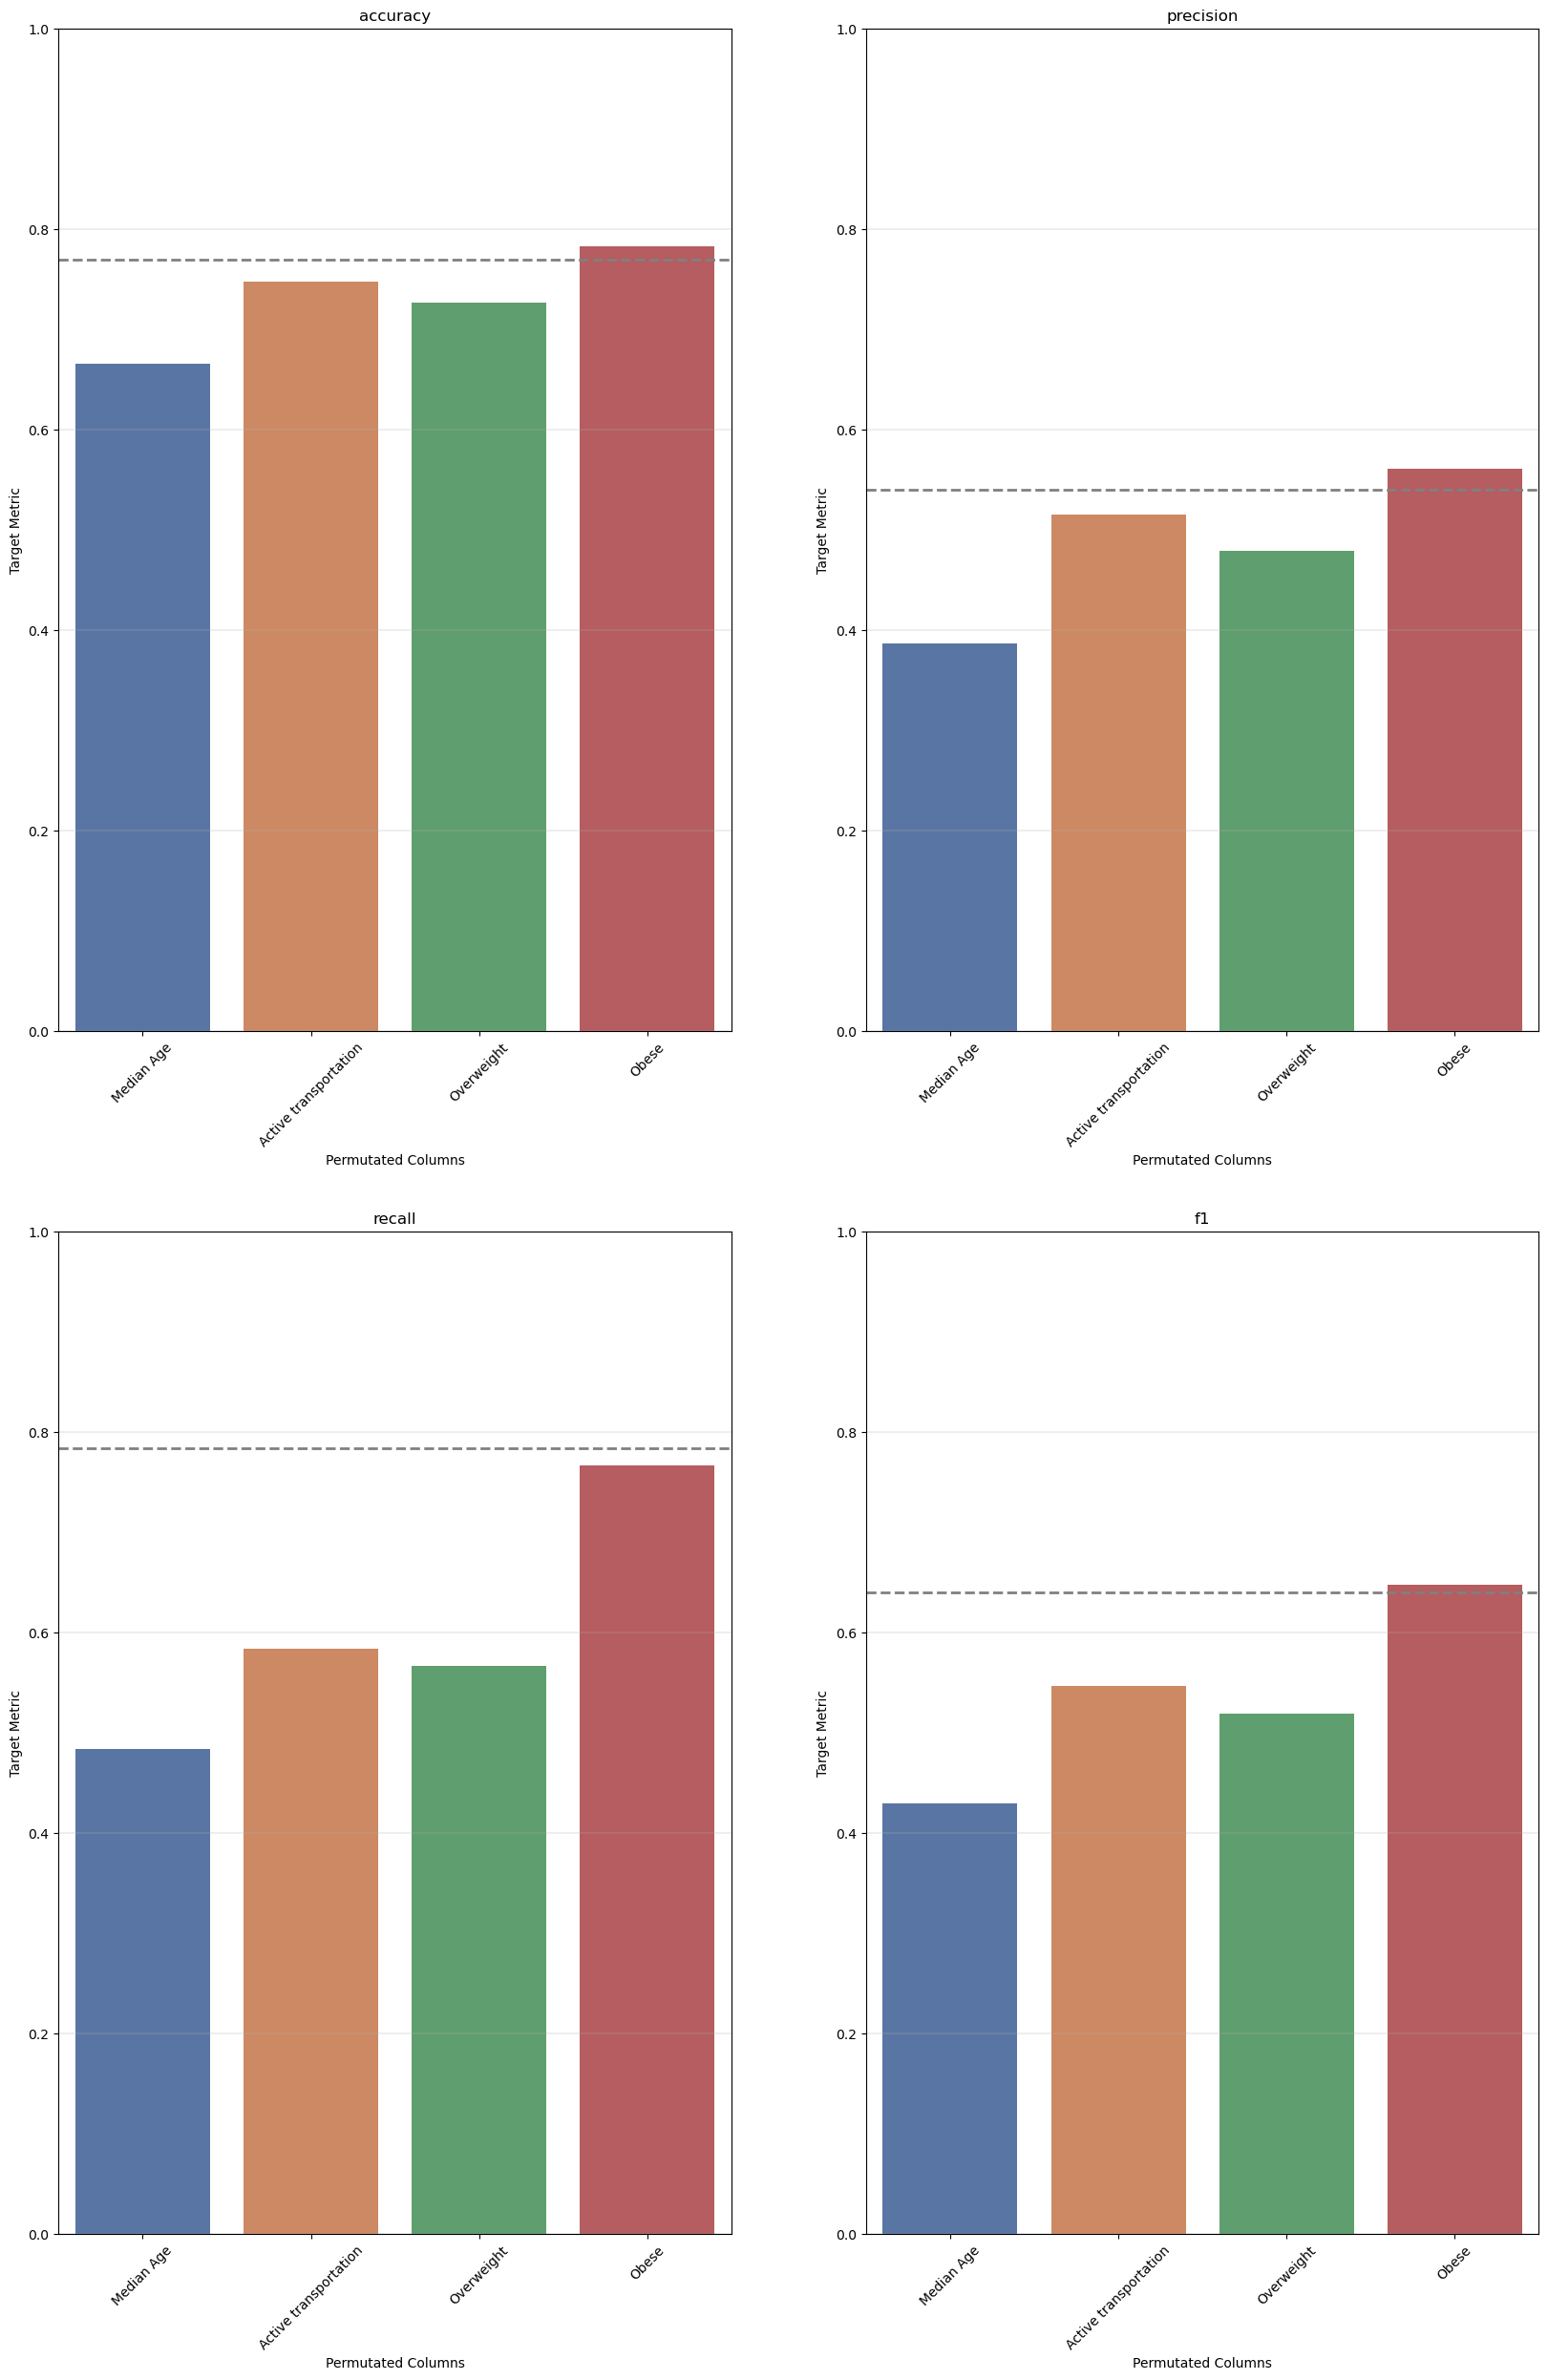

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sensitivity Analysis
DT_features_short = [
    'Median Age',
    'Active transportation',
    'Overweight',
    'Obese'
]
result = sensitivity_analysis(
    model_for_dt,
    X_DT_test,
    y_test,
    DT_features_short)
draw_sensitivity_result(result)

In [ ]:
# record the best model
best_model_name = "toronto_cma_decision_tree.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(model_for_dt, file)

**6.2 Random Forests**

In [ ]:
RF_model = RandomForestClassifier()

cv_RF = StratifiedKFold(5)
rfecv_RF = RFECV(
    estimator=RF_model,
    step=1,
    cv=cv_RF,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_RF.fit(X_resampled, y_resampled)

# Print the optimal number of selected features_
print(f"Optimal number of features -RF: {rfecv_RF.n_features_}")

Optimal number of features -RF: 15


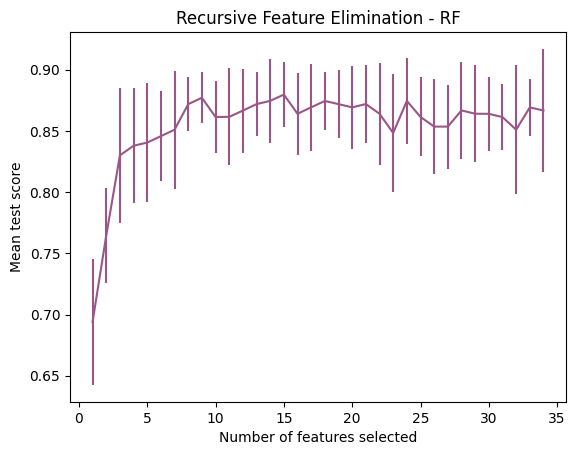

In [ ]:
# Calculate the number of different feature selections tested
n_scores_RF = len(rfecv_RF.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_RF + 1),
    rfecv_RF.cv_results_["mean_test_score"],
    yerr=rfecv_RF.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - RF")

# Show the plot
plt.show()

In [ ]:
selected_RF_features = X_resampled.columns[rfecv_RF.support_]

print("Selected Features for RF:")
print(selected_RF_features)

Selected Features for RF:
Index(['one_hot_encoder__Ethnic Concentration quintiles_5',
       'remainder__Mental Health Score', 'remainder__Mental Health Binary',
       'remainder__High Education Rate', 'remainder__Average Income',
       'remainder__Median Age', 'remainder__Recent Immigrant Rate',
       'remainder__Rented Rate', 'remainder__Visible Minority Rate',
       'remainder__Work Stress Score', 'remainder__Active transportation',
       'remainder__Rate of Active population',
       'remainder__Rate of Daily Smokers', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')


In [ ]:
# Accessing the mean test scores
mean_test_scores_RF = rfecv_RF.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for r, score_RF in enumerate(mean_test_scores_RF):
    RF_selected_features = r + 1  #start with one feature
    print(f"Number of Selected Features: {RF_selected_features}, Mean Test Score: {score_RF}")

Number of Selected Features: 1, Mean Test Score: 0.6940191387559808
Number of Selected Features: 2, Mean Test Score: 0.7645591250854409
Number of Selected Features: 3, Mean Test Score: 0.8300068352699931
Number of Selected Features: 4, Mean Test Score: 0.8378332194121667
Number of Selected Features: 5, Mean Test Score: 0.8404647983595354
Number of Selected Features: 6, Mean Test Score: 0.8456596035543404
Number of Selected Features: 7, Mean Test Score: 0.8509569377990431
Number of Selected Features: 8, Mean Test Score: 0.8718386876281613
Number of Selected Features: 9, Mean Test Score: 0.8770334928229664
Number of Selected Features: 10, Mean Test Score: 0.8613465481886535
Number of Selected Features: 11, Mean Test Score: 0.8614490772385508
Number of Selected Features: 12, Mean Test Score: 0.8665755297334246
Number of Selected Features: 13, Mean Test Score: 0.8718386876281613
Number of Selected Features: 14, Mean Test Score: 0.8745044429254956
Number of Selected Features: 15, Mean Test 

In [ ]:
rfe_RF = RFE(RF_model, n_features_to_select=6)
rfe_RF.fit(X_resampled, y_resampled)

#extracting features
most_important_features_RF = X_resampled.columns[rfe_RF.support_]

In [ ]:
most_important_features_RF

Index(['remainder__Mental Health Score', 'remainder__Median Age',
       'remainder__Visible Minority Rate', 'remainder__Active transportation',
       'remainder__Rate of Active population', 'remainder__Overweight'],
      dtype='object')

In [ ]:
# after many runs, we concluded the most important features are as below:

RF_features = [
    'remainder__Rate of Daily Smokers',
    'remainder__Median Age',
    'remainder__Visible Minority Rate',
    'remainder__Active transportation',
    'remainder__Rate of Active population',
    'remainder__Overweight',
    'remainder__Obese'
]

In [ ]:
#fitting data
X_RF_train = X_resampled[RF_features]
X_RF_test = X_test[RF_features]
X_RF_ext = X_ext[RF_features]

In [ ]:
# Initializing a Random Forest classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
rf = RandomForestClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Random Forest
model_for_rf = Pipeline([
    ('random_forest', rf)
])

# Fitting the model on the training data
model_for_rf.fit(X_RF_train, y_resampled)

Pipeline(steps=[('random_forest', RandomForestClassifier(criterion='entropy'))])

**6.2.1 Hyperparametre tunning for Random Forests**

In [ ]:
# Define the hyperparameter values that should be tested

param_dist_RF = {
    "random_forest__n_estimators" : [150], # [100, 150, 200],
    "random_forest__max_depth" : [10], #[3, 5, 7, 10],
    "random_forest__min_samples_leaf" : [3], #[3, 5, 7, 10],
    "random_forest__max_features" : ['log2'] #['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_RF = GridSearchCV(
    model_for_rf, param_grid=param_dist_RF, cv=skf)

# Train Grid Search on the training data
random_search_RF.fit(X_RF_train, y_resampled)

# Extract results into a DataFrame
results_RF = pd.DataFrame(random_search_RF.cv_results_)

# Display the set of parameters that achieved the best score
results_RF[results_RF['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search for RF
random_search_RF.best_params_

{'random_forest__max_depth': 10,
 'random_forest__max_features': 'log2',
 'random_forest__min_samples_leaf': 3,
 'random_forest__n_estimators': 150}

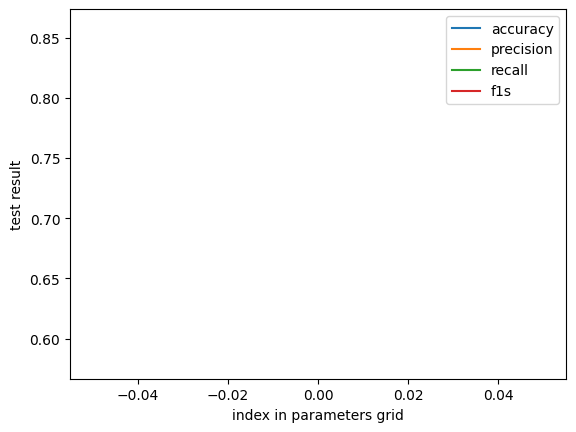

Best Configs: 
{'random_forest__max_depth': 10, 'random_forest__max_features': 'log2', 'random_forest__min_samples_leaf': 3, 'random_forest__n_estimators': 150}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                random_forest__max_depth=param_config["random_forest__max_depth"],
                random_forest__max_features=param_config["random_forest__max_features"],
                random_forest__min_samples_leaf=param_config["random_forest__min_samples_leaf"],
                random_forest__n_estimators=param_config["random_forest__n_estimators"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_RF
model = model_for_rf

x_train = X_RF_train
y_train = y_resampled
x_test = X_RF_test
y_test = y_test

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        random_forest__max_depth=param_config["random_forest__max_depth"],
        random_forest__max_features=param_config["random_forest__max_features"],
        random_forest__min_samples_leaf=param_config["random_forest__min_samples_leaf"],
        random_forest__n_estimators=param_config["random_forest__n_estimators"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)

test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
best_config = the_bests[0]
model_for_rf = model_for_rf.set_params(
    random_forest__max_depth=best_config["random_forest__max_depth"],
    random_forest__max_features=best_config["random_forest__max_features"],
    random_forest__min_samples_leaf=best_config["random_forest__min_samples_leaf"],
    random_forest__n_estimators=best_config["random_forest__n_estimators"],
)

# Refit the model using the training data
model_for_rf = model_for_rf.fit(X_RF_train, y_resampled)

In [ ]:
# Making predictions on the test set of the RF model
y_pred_test_RF = model_for_rf.predict(X_RF_test)

# Calculating metrics
accuracy_test_RF = accuracy_score(y_test, y_pred_test_RF)
precision_test_RF = precision_score(y_test, y_pred_test_RF)
recall_test_RF = recall_score(y_test, y_pred_test_RF)
f1_test_RF = f1_score(y_test, y_pred_test_RF)
conf_matrix_test_RF = confusion_matrix(y_test, y_pred_test_RF)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_RF))
print("Precision: {:.2f}".format(precision_test_RF))
print("Recall (Sensitivity): {:.2f}".format(recall_test_RF))
print("F1 Score: {:.2f}".format(f1_test_RF))
print("Confusion Matrix:")
print(conf_matrix_test_RF)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.86
Precision: 0.58
Recall (Sensitivity): 0.86
F1 Score: 0.69
Confusion Matrix:
[[80 13]
 [ 3 18]]


In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_RF_model = cross_val_predict(model_for_rf, X_RF_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_RF = confusion_matrix(y_resampled, predicted_labels_RF_model)

# Calculate the full classification report
class_report_RF = classification_report(y_resampled, predicted_labels_RF_model)

# Calculate accuracy
accuracy_RF = accuracy_score(y_resampled, predicted_labels_RF_model)

# Calculate precision
precision_RF = precision_score(y_resampled, predicted_labels_RF_model)

# Calculate recall
recall_RF = recall_score(y_resampled, predicted_labels_RF_model)

# Calculate F1 score
f1_RF = f1_score(y_resampled, predicted_labels_RF_model)


# Print the full confusion matrix and classification report
print("RF Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_RF)
print("B. Classification Report:")
print(class_report_RF)
print("C. Accuracy: {:.2f}".format(accuracy_RF))
print("D. Precision: {:.2f}".format(precision_RF))
print("E. Recall (Sensitivity): {:.2f}".format(recall_RF))
print("F. F1 Score: {:.2f}".format(f1_RF))

RF Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[150  41]
 [ 21 170]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       191
           1       0.81      0.89      0.85       191

    accuracy                           0.84       382
   macro avg       0.84      0.84      0.84       382
weighted avg       0.84      0.84      0.84       382

C. Accuracy: 0.84
D. Precision: 0.81
E. Recall (Sensitivity): 0.89
F. F1 Score: 0.85


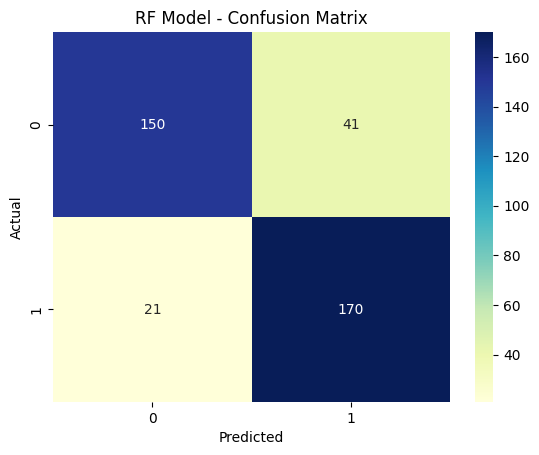

In [ ]:
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='YlGnBu')
plt.title('RF Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train ROC-AUC: 0.9985


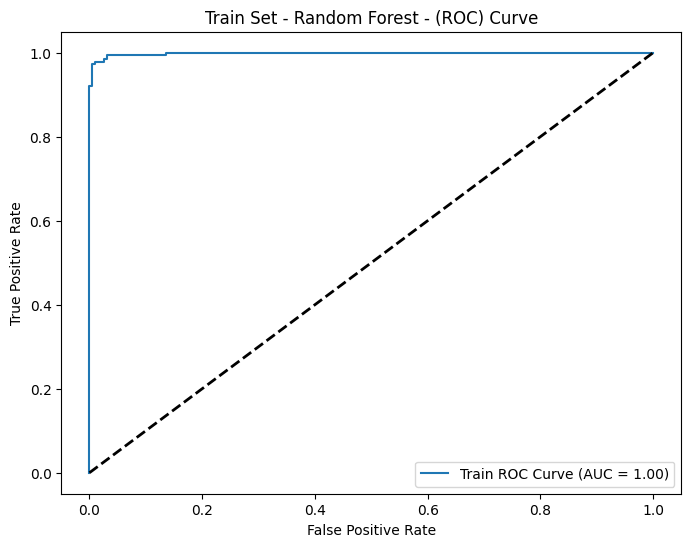

In [ ]:
roc_auc_train_RF, fpr_RF, tpr_RF = draw_roc(model_for_rf, X_RF_train, y_resampled, 'Train', 'Random Forest')

In [ ]:
accuracy_test_RF, precision_test_RF, recall_test_RF, f1_test_RF = performance_metrics(model_for_rf, X_RF_test, y_test, 'Test', 'Random Forest')

Random Forest Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.86
Precision: 0.58
Recall (Sensitivity): 0.86
F1 Score: 0.69
Confusion Matrix:
[[80 13]
 [ 3 18]]


Test ROC-AUC: 0.9247


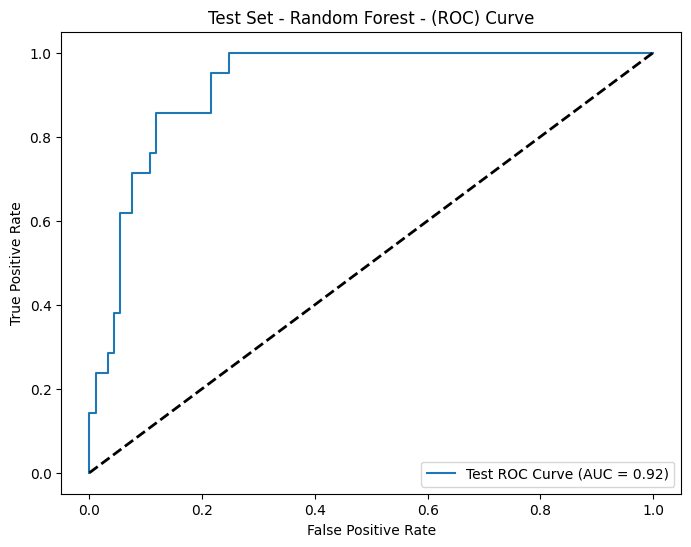

In [ ]:
roc_auc_test_RF, fpr_test_RF, tpr_test_RF = draw_roc(model_for_rf, X_RF_test, y_test, 'Test', 'Random Forest')

In [ ]:
accuracy_ext_RF, precision_ext_RF, recall_ext_RF, f1_ext_RF = performance_metrics(model_for_rf, X_RF_ext, y_ext, 'External Validation', 'Random Forest')

Random Forest Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.82
Precision: 0.47
Recall (Sensitivity): 0.89
F1 Score: 0.62
Confusion Matrix:
[[78 18]
 [ 2 16]]


External Validation ROC-AUC: 0.9340


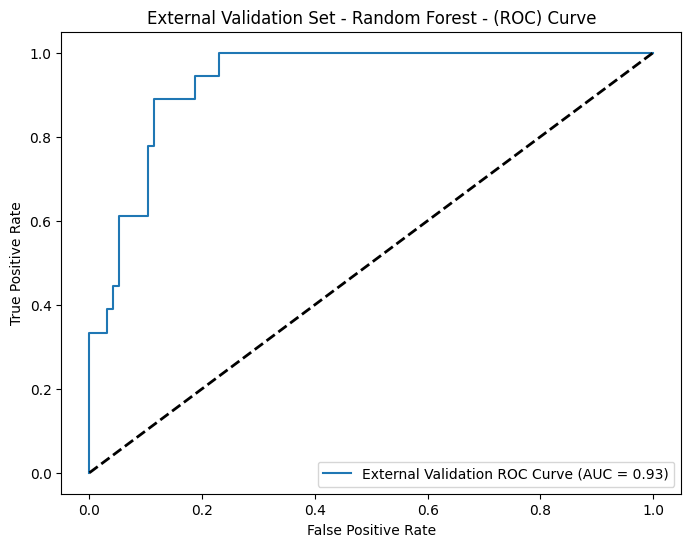

In [ ]:
roc_auc_ext_RF, fpr_ext_RF, tpr_ext_RF = draw_roc(model_for_rf, X_RF_ext, y_ext, 'External Validation', 'Random Forest')

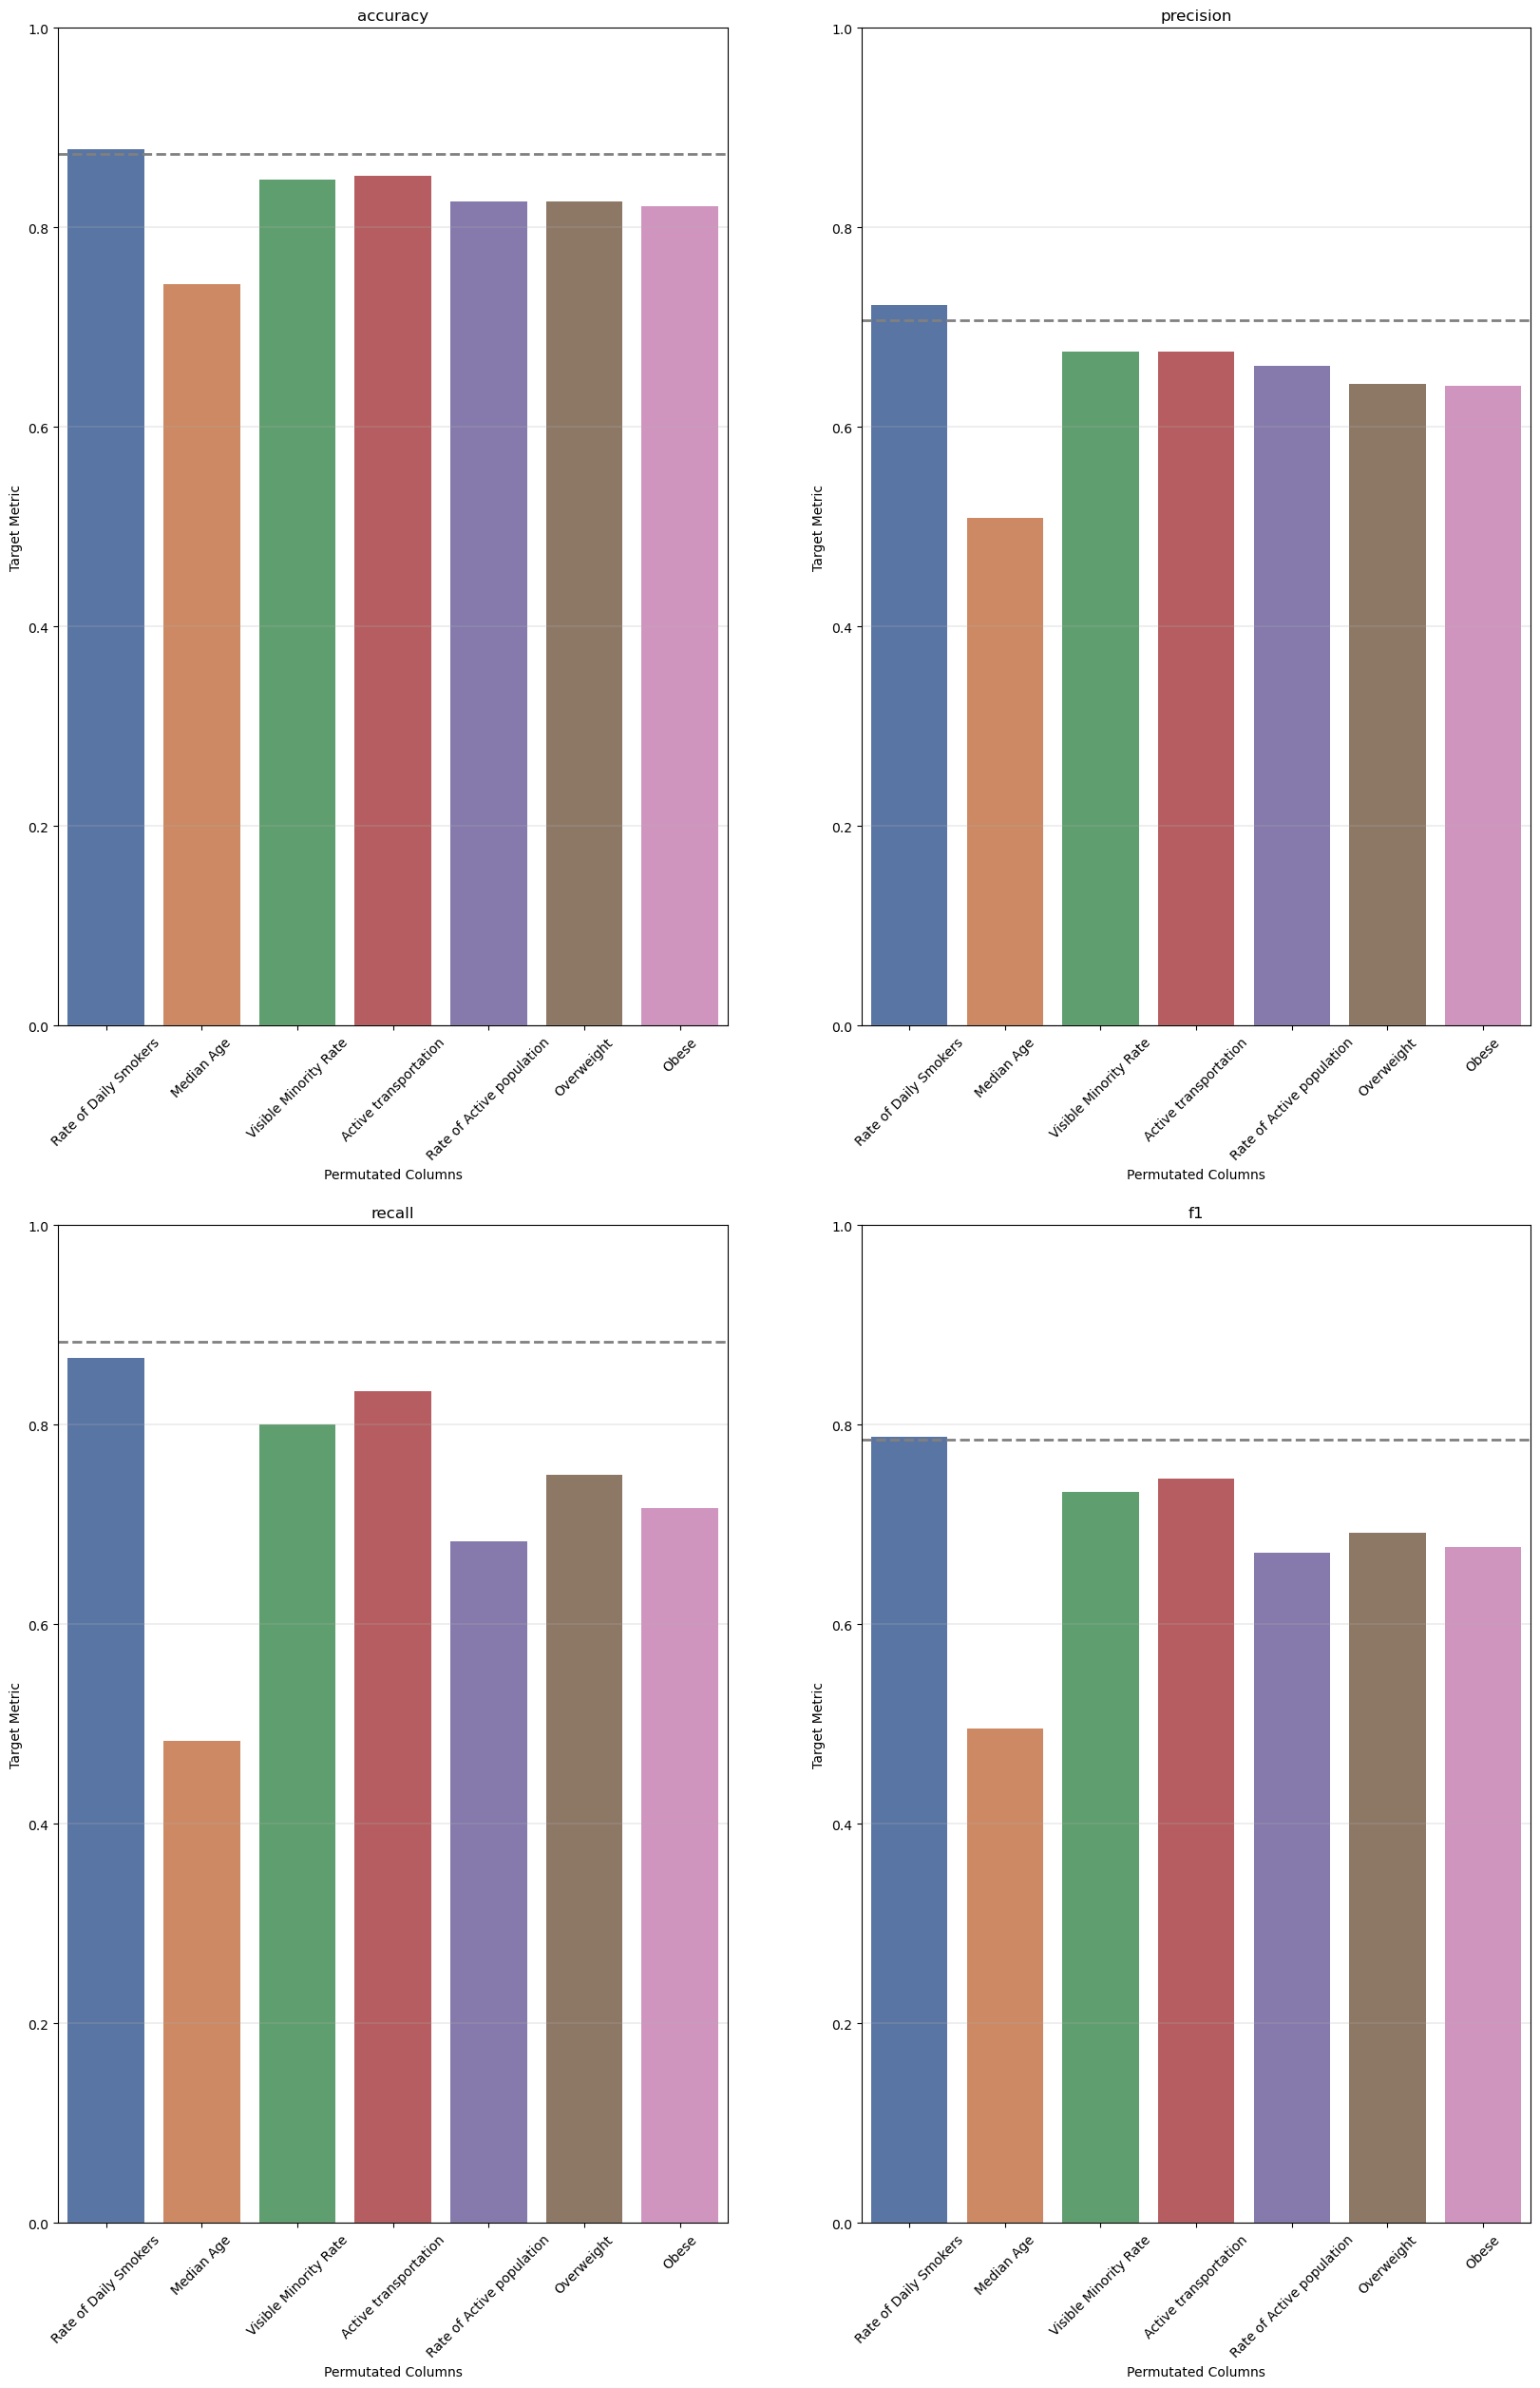

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sensitivity Analysis
RF_features_short = [
    'Rate of Daily Smokers',
    'Median Age',
    'Visible Minority Rate',
    'Active transportation',
    'Rate of Active population',
    'Overweight',
    'Obese'
]

result = sensitivity_analysis(
    model_for_rf,
    X_RF_test,
    y_test,
    RF_features_short)
draw_sensitivity_result(result)

In [ ]:
# record the best model
best_model_name = "toronto_cma_random_forest.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(model_for_rf, file)

**6.3 XGBOOST**

In [ ]:
xgb_model = GradientBoostingClassifier()

cv_xgb = StratifiedKFold(5)

rfecv_xgb = RFECV(
    estimator=xgb_model,
    step=1,
    cv=cv_xgb,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_xgb.fit(X_resampled, y_resampled)

print(f"Optimal number of features (XGB): {rfecv_xgb.n_features_}")
# Print the optimal number of selected features

Optimal number of features (XGB): 14


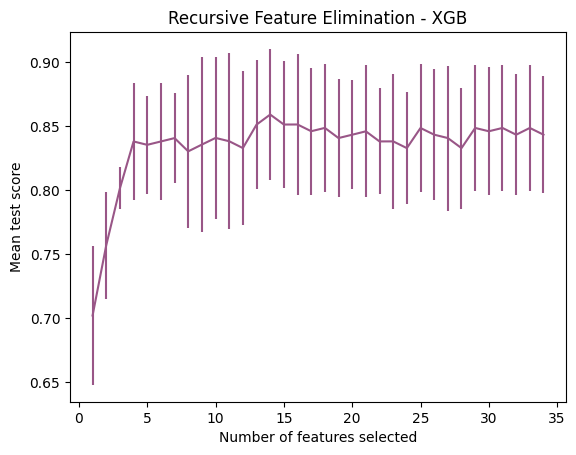

In [ ]:
# Calculate the number of different feature selections tested
n_scores_XGB = len(rfecv_xgb.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_XGB + 1),
    rfecv_xgb.cv_results_["mean_test_score"],
    yerr=rfecv_xgb.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - XGB")

# Show the plot
plt.show()

In [ ]:
selected_xgb_features = [i for i in X_resampled.columns[rfecv_xgb.support_]]

print("Selected Features for XGB:")
print(selected_xgb_features)

Selected Features for XGB:
['one_hot_encoder__Ethnic Concentration quintiles_5', 'remainder__Mental Health Score', 'remainder__High Education Rate', 'remainder__Average Income', 'remainder__Median Age', 'remainder__Recent Immigrant Rate', 'remainder__Rented Rate', 'remainder__Visible Minority Rate', 'remainder__Work Stress Score', 'remainder__Active transportation', 'remainder__Rate of Active population', 'remainder__Rate of Daily Smokers', 'remainder__Overweight', 'remainder__Obese']


In [ ]:
# Accessing the mean test scores
mean_test_scores_xgb = rfecv_xgb.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_xgb in enumerate(mean_test_scores_xgb):
    xgb_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {xgb_selected_features}, Mean Test Score: {score_xgb}")

Number of Selected Features: 1, Mean Test Score: 0.7018455228981544
Number of Selected Features: 2, Mean Test Score: 0.7566985645933014
Number of Selected Features: 3, Mean Test Score: 0.8011278195488722
Number of Selected Features: 4, Mean Test Score: 0.837799043062201
Number of Selected Features: 5, Mean Test Score: 0.8351674641148324
Number of Selected Features: 6, Mean Test Score: 0.837799043062201
Number of Selected Features: 7, Mean Test Score: 0.8404306220095694
Number of Selected Features: 8, Mean Test Score: 0.8300751879699249
Number of Selected Features: 9, Mean Test Score: 0.8353725222146275
Number of Selected Features: 10, Mean Test Score: 0.8405673274094326
Number of Selected Features: 11, Mean Test Score: 0.83796992481203
Number of Selected Features: 12, Mean Test Score: 0.8326384142173616
Number of Selected Features: 13, Mean Test Score: 0.8509569377990431
Number of Selected Features: 14, Mean Test Score: 0.8588174982911825
Number of Selected Features: 15, Mean Test Scor

In [ ]:
#setting parametres
rfe_xgb = RFE(xgb_model, n_features_to_select=8)
rfe_xgb.fit(X_resampled, y_resampled)

#extracting features
most_important_features_XGB = X_resampled.columns[rfe_xgb.support_]

In [ ]:
most_important_features_XGB

Index(['remainder__Mental Health Score', 'remainder__Average Income',
       'remainder__Median Age', 'remainder__Visible Minority Rate',
       'remainder__Active transportation',
       'remainder__Rate of Active population', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')



6.2 Hyperparametre tunning for XGBoost


In [ ]:
# after many runs, we concluded the most important features are as below:

xgb_features = [
    'remainder__Rate of Daily Smokers',
    'remainder__Recent Immigrant Rate',
    'remainder__Visible Minority Rate',
    'remainder__Rate of Active population',
    'remainder__Overweight',
    'remainder__Obese',
]

In [ ]:
X_XGB_train = X_resampled[xgb_features]
X_XGB_test = X_test[xgb_features]
X_XGB_ext = X_ext[xgb_features]

In [ ]:
# Initializing the Gradient Boosting model with initial parameters
xgb = GradientBoostingClassifier()

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model_for_xgb = Pipeline([
    ('xg_boost', xgb)
])

# Fitting the model on the training data
model_for_xgb.fit(X_XGB_train, y_resampled)

Pipeline(steps=[('xg_boost', GradientBoostingClassifier())])

**6.3.1 Hyperparametre tunning for XGB**

In [ ]:
### Hyperparameter tuning using GridSearchCV

{'xg_boost__learning_rate': 0.1, 'xg_boost__max_depth': 5, 'xg_boost__min_samples_leaf': 10, 'xg_boost__n_estimators': 150}

param_dist_xgb = {
    "xg_boost__n_estimators" : [150], #[50, 100, 150, 200],
    "xg_boost__max_depth" : [5], #[3, 5, 7, 9],
    "xg_boost__min_samples_leaf" : [10], #[3, 5, 7, 10],
    "xg_boost__learning_rate" : [0.1], #[i/10 for i in range(1,11)]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search_xgb = GridSearchCV(
    model_for_xgb, param_grid=param_dist_xgb, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search_xgb.fit(X_XGB_train, y_resampled)

# Extract results into a DataFrame
results_xgb = pd.DataFrame(random_search_xgb.cv_results_)

# Display the set of parameters that achieved the best score
results_xgb[results_xgb['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search for RF
random_search_xgb.best_params_

{'xg_boost__learning_rate': 0.1,
 'xg_boost__max_depth': 5,
 'xg_boost__min_samples_leaf': 10,
 'xg_boost__n_estimators': 150}

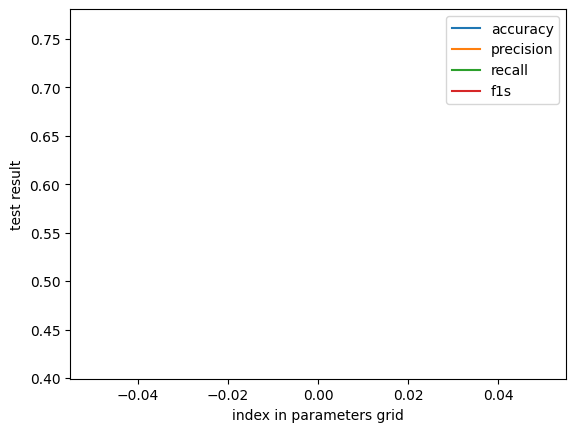

Best Configs: 
{'xg_boost__learning_rate': 0.1, 'xg_boost__max_depth': 5, 'xg_boost__min_samples_leaf': 10, 'xg_boost__n_estimators': 150}




In [ ]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                xg_boost__n_estimators=param_config["xg_boost__n_estimators"],
                xg_boost__max_depth=param_config["xg_boost__max_depth"],
                xg_boost__min_samples_leaf=param_config["xg_boost__min_samples_leaf"],
                xg_boost__learning_rate=param_config["xg_boost__learning_rate"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)

        except:
            pass

    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_xgb
model = model_for_xgb

x_train = X_XGB_train
y_train = y_resampled
x_test = X_XGB_test
y_test = y_test

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]

    model = model.set_params(
        xg_boost__n_estimators=param_config["xg_boost__n_estimators"],
        xg_boost__max_depth=param_config["xg_boost__max_depth"],
        xg_boost__min_samples_leaf=param_config["xg_boost__min_samples_leaf"],
        xg_boost__learning_rate=param_config["xg_boost__learning_rate"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1)

test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [ ]:
# Update the model's hyperparameters to the best found during Grid Search
best_config = the_bests[0]
model_for_xgb = model_for_xgb.set_params(
    xg_boost__n_estimators=best_config["xg_boost__n_estimators"],
    xg_boost__max_depth=best_config["xg_boost__max_depth"],
    xg_boost__min_samples_leaf=best_config["xg_boost__min_samples_leaf"],
    xg_boost__learning_rate=best_config["xg_boost__learning_rate"],
)

# Refit the model using the training data
model_for_xgb = model_for_xgb.fit(X_XGB_train, y_resampled)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_xgb_model = cross_val_predict(model_for_xgb, X_XGB_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_xgb = confusion_matrix(y_resampled, predicted_labels_xgb_model)

# Calculate the full classification report
class_report_xgb = classification_report(y_resampled, predicted_labels_xgb_model)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_resampled, predicted_labels_xgb_model)

# Calculate precision
precision_xgb = precision_score(y_resampled, predicted_labels_xgb_model)

# Calculate recall
recall_xgb = recall_score(y_resampled, predicted_labels_xgb_model)

# Calculate F1 score
f1_xgb = f1_score(y_resampled, predicted_labels_xgb_model)


# Print the full confusion matrix and classification report
print("XGB Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_xgb)
print("B. Classification Report:")
print(class_report_xgb)
print("C. Accuracy: {:.2f}".format(accuracy_xgb))
print("D. Precision: {:.2f}".format(precision_xgb))
print("E. Recall (Sensitivity): {:.2f}".format(recall_xgb))
print("F. F1 Score: {:.2f}".format(f1_xgb))

XGB Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[151  40]
 [ 33 158]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       191
           1       0.80      0.83      0.81       191

    accuracy                           0.81       382
   macro avg       0.81      0.81      0.81       382
weighted avg       0.81      0.81      0.81       382

C. Accuracy: 0.81
D. Precision: 0.80
E. Recall (Sensitivity): 0.83
F. F1 Score: 0.81


Train ROC-AUC: 1.0000


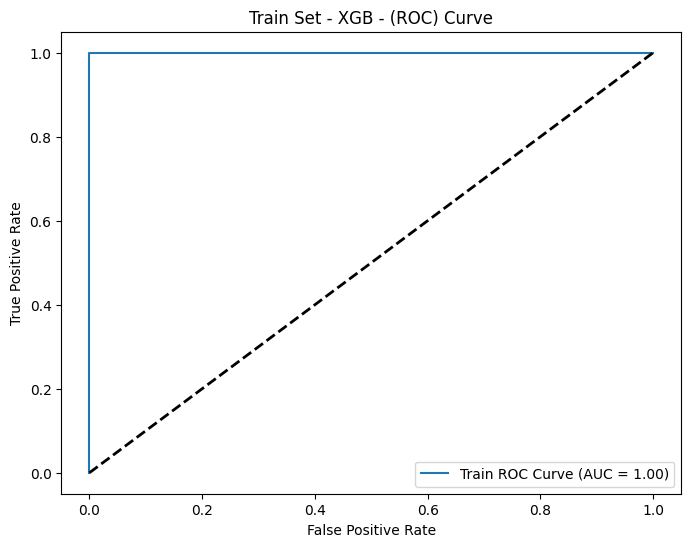

In [ ]:
roc_auc_xgb, fpr_xgb, tpr_xgb = draw_roc(model_for_xgb, X_XGB_train, y_resampled, 'Train', 'XGB')

In [ ]:
accuracy_test_xgb, precision_test_xgb, recall_test_xgb, f1_test_xgb = performance_metrics(model_for_xgb, X_XGB_test, y_test, 'Test', 'XGB')

XGB Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.75
Precision: 0.41
Recall (Sensitivity): 0.71
F1 Score: 0.52
Confusion Matrix:
[[71 22]
 [ 6 15]]


Test ROC-AUC: 0.8699


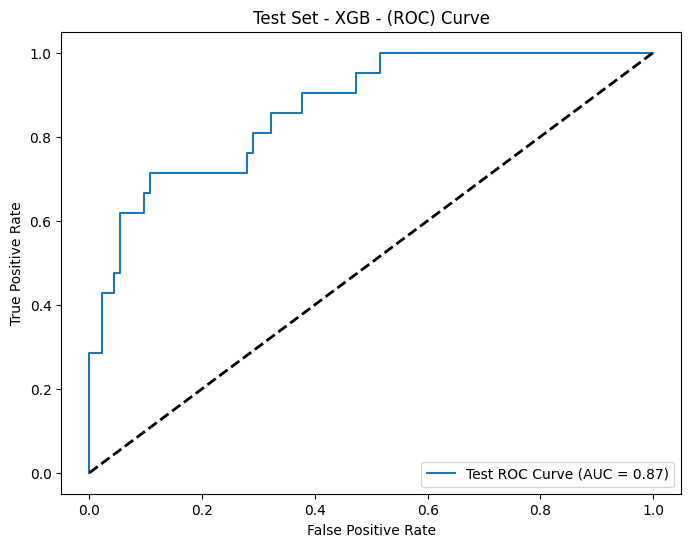

In [ ]:
roc_auc_test_xgb, fpr_test_xgb, tpr_test_xgb = draw_roc(model_for_xgb, X_XGB_test, y_test, 'Test', 'XGB')

In [ ]:
accuracy_ext_xgb, precision_ext_xgb, recall_ext_xgb, f1_ext_xgb = performance_metrics(model_for_xgb, X_XGB_ext, y_ext, 'External Validation', 'XGB')

XGB Model - External Validation Set- Confusion Matrix/Classification Report
Accuracy: 0.75
Precision: 0.38
Recall (Sensitivity): 0.83
F1 Score: 0.52
Confusion Matrix:
[[71 25]
 [ 3 15]]


External Validation ROC-AUC: 0.8519


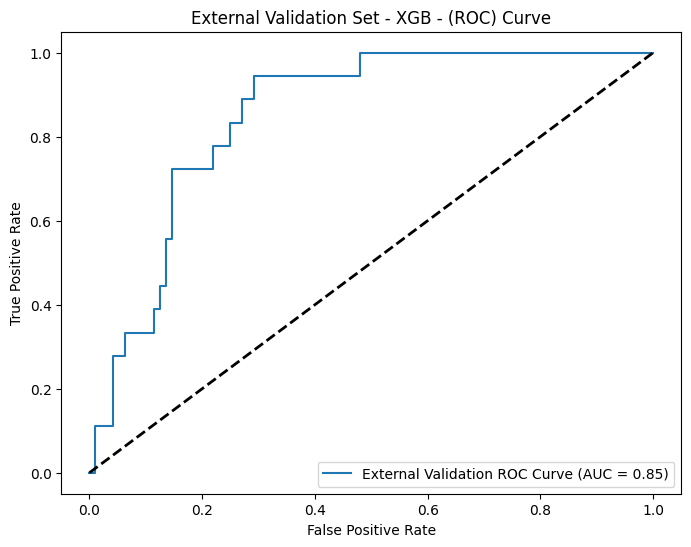

In [ ]:
roc_auc_ext_xgb, fpr_ext_xgb, tpr_ext_xgb = draw_roc(model_for_xgb, X_XGB_ext, y_ext, 'External Validation', 'XGB')

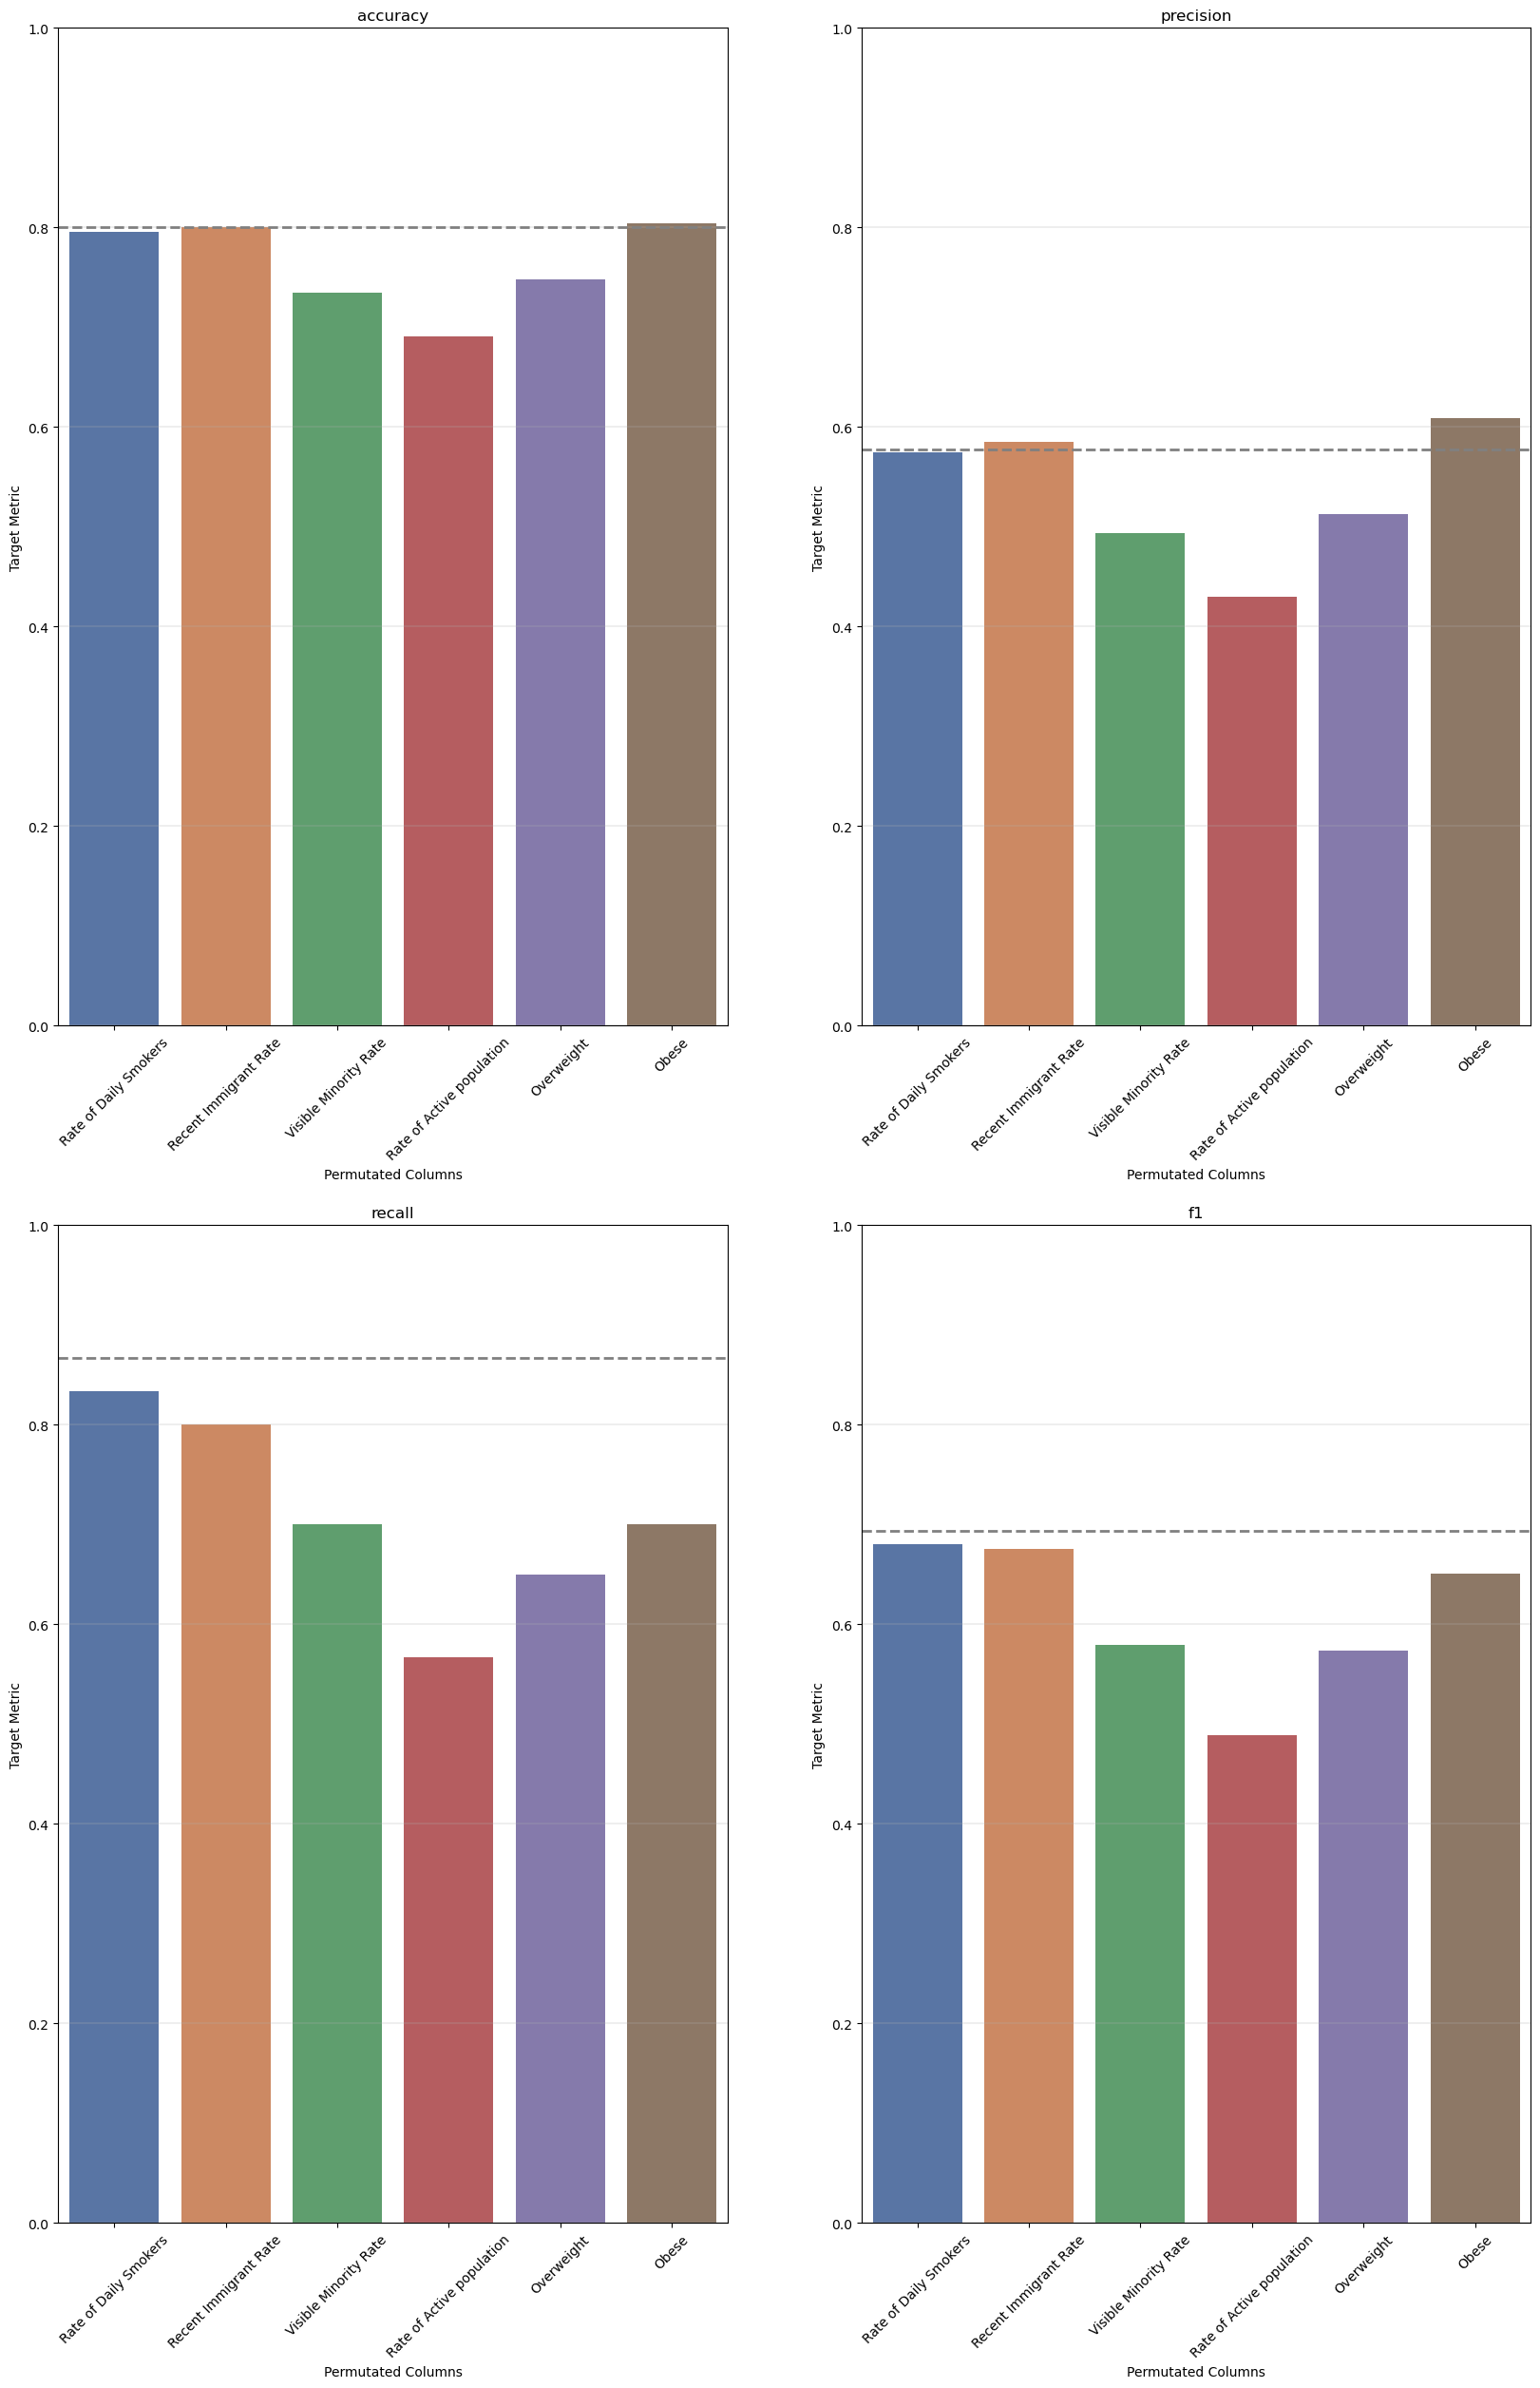

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sensitivity Analysis

xgb_features_short = [
    'Rate of Daily Smokers',
    'Recent Immigrant Rate',
    'Visible Minority Rate',
    'Rate of Active population',
    'Overweight',
    'Obese',
]

result = sensitivity_analysis(
    model_for_xgb,
    X_XGB_test,
    y_test,
    xgb_features_short)
draw_sensitivity_result(result)

In [ ]:
# record the best model
best_model_name = "toronto_cma_xgb.pkl"
path = os.path.join(os.getcwd(), best_model_name)
with open(path, 'wb') as file:
    pickle.dump(model_for_xgb, file)

**Section 7: Summary of models**

**7.1 Evaluations**

In [ ]:
# setting evaluations
# TODO add external validation

evaluations = {
    'Model': [
        'LR Training',
        'LR Test',
        'LR External Validation',
        'KNN Training',
        'KNN Test',
        'KNN External Validation',
        'MLP Training',
        'MLP Test',
        'MLP External Validation',
        'SVM Training',
        'SVM Test',
        'SVM External Validation',
        'DT Training',
        'DT Test',
        'DT External Validation',
        'RF Training',
        'RF Test',
        'RF External Validation',
        'XGB train',
        'XGB test',
        'XGB External Validation',
    ],
    'Accuracy': [
        accuracy_LR,
        accuracy_test_LR,
        accuracy_ext_LR,
        accuracy_knn,
        accuracy_test_knn,
        accuracy_ext_knn,
        accuracy_MLP,
        accuracy_test_MLP,
        accuracy_ext_MLP,
        accuracy_SVM,
        accuracy_test_SVM,
        accuracy_ext_SVM,
        accuracy_DT,
        accuracy_test_DT,
        accuracy_ext_DT,
        accuracy_RF,
        accuracy_test_RF,
        accuracy_ext_RF,
        accuracy_xgb,
        accuracy_test_xgb,
        accuracy_ext_xgb,
    ],
    'Precision': [
        precision_LR,
        precision_test_LR,
        precision_ext_LR,
        precision_knn,
        precision_test_knn,
        precision_ext_knn,
        precision_MLP,
        precision_test_MLP,
        precision_ext_MLP,
        precision_SVM,
        precision_test_SVM,
        precision_ext_SVM,
        precision_DT,
        precision_test_DT,
        precision_ext_DT,
        precision_RF,
        precision_test_RF,
        precision_ext_RF,
        precision_xgb,
        precision_test_xgb,
        precision_ext_xgb,
    ],
    'Recall (Sensitivity)': [
        recall_LR,
        recall_test_LR,
        recall_ext_LR,
        recall_knn,
        recall_test_knn,
        recall_ext_knn,
        recall_MLP,
        recall_test_MLP,
        recall_ext_MLP,
        recall_SVM,
        recall_test_SVM,
        recall_ext_SVM,
        recall_DT,
        recall_test_DT,
        recall_ext_DT,
        recall_RF,
        recall_test_RF,
        recall_ext_RF,
        recall_xgb,
        recall_test_xgb,
        recall_ext_xgb,
    ],
    'F1 Score': [
        f1_LR,
        f1_test_LR,
        f1_ext_LR,
        f1_knn,
        f1_test_knn,
        f1_ext_knn,
        f1_MLP,
        f1_test_MLP,
        f1_ext_MLP,
        f1_SVM,
        f1_test_SVM,
        f1_ext_SVM,
        f1_DT,
        f1_test_DT,
        f1_ext_DT,
        f1_RF,
        f1_test_RF,
        f1_ext_RF,
        f1_xgb,
        f1_test_xgb,
        f1_ext_xgb,
    ]
}

# Creating a DataFrame
results_summary = pd.DataFrame(evaluations)

# Displaying the combined evaluation results
print(results_summary)

                      Model  Accuracy  Precision  Recall (Sensitivity)  \
0               LR Training  0.816754   0.784038              0.874346   
1                   LR Test  0.824561   0.513514              0.904762   
2    LR External Validation  0.815789   0.444444              0.666667   
3              KNN Training  0.856021   0.836634              0.884817   
4                  KNN Test  0.859649   0.575758              0.904762   
5   KNN External Validation  0.868421   0.551724              0.888889   
6              MLP Training  0.856021   0.850515              0.863874   
7                  MLP Test  0.868421   0.588235              0.952381   
8   MLP External Validation  0.885965   0.608696              0.777778   
9              SVM Training  0.856021   0.814815              0.921466   
10                 SVM Test  0.859649   0.567568              1.000000   
11  SVM External Validation  0.789474   0.428571              1.000000   
12              DT Training  0.774869 

In [ ]:
results_summary.to_csv('result.csv')

**7.2 ROC curves**

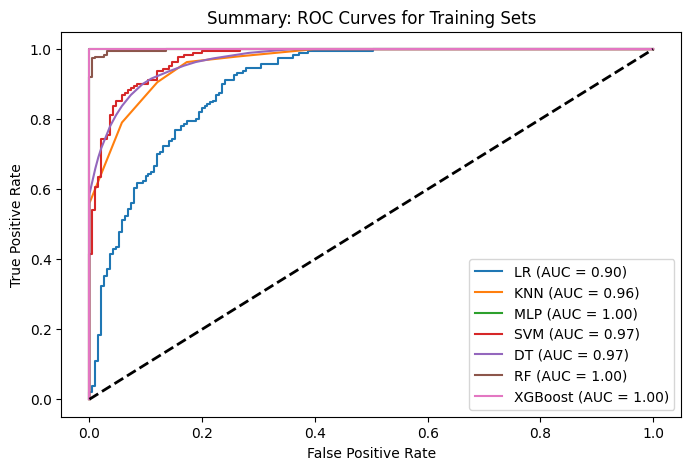

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Training Sets')
plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_MLP, tpr_MLP, label=f'MLP (AUC = {roc_auc_train_MLP:.2f})')
plt.plot(fpr_SVM, tpr_SVM, label=f'SVM (AUC = {roc_auc_train_SVM:.2f})')
plt.plot(fpr_DT, tpr_DT, label=f'DT (AUC = {roc_auc_train_DT:.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'RF (AUC = {roc_auc_train_RF:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()


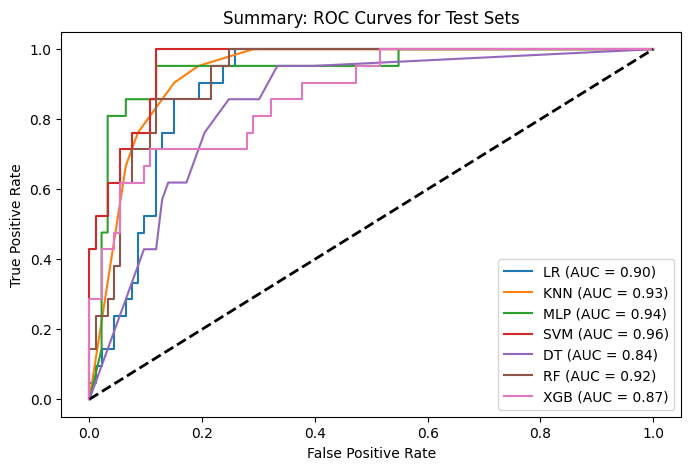

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Test Sets')
plt.plot(fpr_test_LR, tpr_test_LR, label=f'LR (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'KNN (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_test_MLP, tpr_test_MLP, label=f'MLP (AUC = {roc_auc_test_MLP:.2f})')
plt.plot(fpr_test_SVM, tpr_test_SVM, label=f'SVM (AUC = {roc_auc_test_SVM:.2f})')
plt.plot(fpr_test_DT, tpr_test_DT, label=f'DT (AUC = {roc_auc_test_DT:.2f})')
plt.plot(fpr_test_RF, tpr_test_RF, label=f'RF (AUC = {roc_auc_test_RF:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGB (AUC = {roc_auc_test_xgb:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()

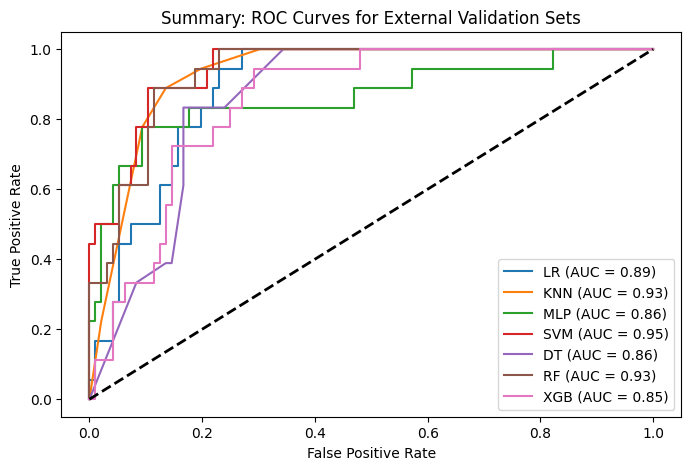

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for External Validation Sets')
plt.plot(fpr_ext_LR, tpr_ext_LR, label=f'LR (AUC = {roc_auc_ext_LR:.2f})')
plt.plot(fpr_ext_knn, tpr_ext_knn, label=f'KNN (AUC = {roc_auc_ext_knn:.2f})')
plt.plot(fpr_ext_MLP, tpr_ext_MLP, label=f'MLP (AUC = {roc_auc_ext_MLP:.2f})')
plt.plot(fpr_ext_SVM, tpr_ext_SVM, label=f'SVM (AUC = {roc_auc_ext_SVM:.2f})')
plt.plot(fpr_ext_DT, tpr_ext_DT, label=f'DT (AUC = {roc_auc_ext_DT:.2f})')
plt.plot(fpr_ext_RF, tpr_ext_RF, label=f'RF (AUC = {roc_auc_ext_RF:.2f})')
plt.plot(fpr_ext_xgb, tpr_ext_xgb, label=f'XGB (AUC = {roc_auc_ext_xgb:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()

In [ ]:
print("Number of Selected Features by Model")
features_table_summary = pd.DataFrame(columns=["Model", "Number of Features"])
features_table_summary.loc[len(features_table_summary)] = "LR", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "KNN", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "MLP", len(MLP_features)
features_table_summary.loc[len(features_table_summary)] = "SVM", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "DT", len(DT_features)
features_table_summary.loc[len(features_table_summary)] = "RF", len(RF_features)
features_table_summary.loc[len(features_table_summary)] = "XGB", len(xgb_features)
print(features_table_summary)

Number of Selected Features by Model
  Model  Number of Features
0    LR                   5
1   KNN                   5
2   MLP                   7
3   SVM                   5
4    DT                   4
5    RF                   7
6   XGB                   6


In [ ]:
counted = dict(Counter(LR_features+MLP_features+DT_features+RF_features+xgb_features))
overall_features = [i for i in counted.keys()]
overall_counts = [i for i in counted.values()]

print(f"The following variables were used most frequently, in {max(overall_counts):.0f} models:")
for i in range(len(overall_counts)):
    if overall_counts[i] == max(overall_counts):
        print(overall_features[i])

The following variables were used most frequently, in 5 models:
remainder__Overweight
remainder__Obese
